<a href="https://colab.research.google.com/github/preetsanjam/Customer-Churn-Analysis/blob/main/Final_Report_code_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Project Notes -- 1

In [ ]:
df=pd.read_excel('Customer Churn Data.xlsx', 'Data for DSBA')

In [ ]:
df.shape

(11260, 19)

In [ ]:
df.head()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      20000      1      4        3.0              6.0   Debit Card  Female   
1      20001      1      0        1.0              8.0          UPI    Male   
2      20002      1      0        1.0             30.0   Debit Card    Male   
3      20003      1      0        3.0             15.0   Debit Card    Male   
4      20004      1      0        1.0             12.0  Credit Card    Male   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   
2            2.0                  4    Regular Plus             3.0   
3            2.0                  4           Super             5.0   
4            2.0                  3    Regular Plus             5.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   
2         Single             6          1.0             14   
3         Single             8          0.0             23   
4         Single             3          0.0             11   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5   159.93       Mobile  
1                       0                    0    120.9       Mobile  
2                       0                    3      NaN       Mobile  
3                       0                    3   134.07       Mobile  
4                       1                    3    129.6       Mobile

In [ ]:
df.tail()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  \
11255      31255      0     10        1.0             34.0  Credit Card   
11256      31256      0     13        1.0             19.0  Credit Card   
11257      31257      0      1        1.0             14.0   Debit Card   
11258      31258      0     23        3.0             11.0  Credit Card   
11259      31259      0      8        1.0             22.0  Credit Card   

      Gender  Service_Score Account_user_count account_segment  \
11255   Male            3.0                  2           Super   
11256   Male            3.0                  5             HNI   
11257   Male            3.0                  2           Super   
11258   Male            4.0                  5           Super   
11259   Male            3.0                  2           Super   

       CC_Agent_Score Marital_Status rev_per_month  Complain_ly  \
11255             1.0        Married             9          0.0   
11256             5.0        Married             7          0.0   
11257             4.0        Married             7          1.0   
11258             4.0        Married             7          0.0   
11259             3.0        Married             5          0.0   

      rev_growth_yoy coupon_used_for_payment Day_Since_CC_connect cashback  \
11255             19                       1                    4   153.71   
11256             16                       1                    8   226.91   
11257             22                       1                    4   191.42   
11258             16                       2                    9    179.9   
11259             13                       2                    3   175.04   

      Login_device  
11255     Computer  
11256       Mobile  
11257       Mobile  
11258     Computer  
11259       Mobile

In [ ]:
#Checking null values
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [ ]:
df.isnull().sum().sum()

2676

In [ ]:
df.size

213940

In [ ]:
2676/213940

0.012508179863513134

In [ ]:
df.isnull().mean()*100

AccountID                  0.000000
Churn                      0.000000
Tenure                     0.905861
City_Tier                  0.994671
CC_Contacted_LY            0.905861
Payment                    0.968028
Gender                     0.959147
Service_Score              0.870337
Account_user_count         0.994671
account_segment            0.861456
CC_Agent_Score             1.030195
Marital_Status             1.882771
rev_per_month              0.905861
Complain_ly                3.170515
rev_growth_yoy             0.000000
coupon_used_for_payment    0.000000
Day_Since_CC_connect       3.170515
cashback                   4.182948
Login_device               1.962700
dtype: float64

In [ ]:
#Checking duplicate values
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [ ]:
df.columns

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')

In [ ]:
#Cleaning columns names
df.rename(columns = {'Account_user_count' : 'Account_User_Count',
                   'account_segment': 'Account_Segment',
                   'rev_per_month' : 'Rev_Per_Month',
                   'Complain_ly' : 'Complain_LY',
                   'rev_growth_yoy' : 'Rev_Growth_YoY',
                   'coupon_used_for_payment' : 'Coupon_Used_For_Payment',
                   'cashback' : 'Cashback',
                    'Day_Since_CC_connect' : 'Day_Since_CC_Connect',
                   'Login_device' : 'Login_Device'}, inplace = True)

In [ ]:
df.columns

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_User_Count',
       'Account_Segment', 'CC_Agent_Score', 'Marital_Status', 'Rev_Per_Month',
       'Complain_LY', 'Rev_Growth_YoY', 'Coupon_Used_For_Payment',
       'Day_Since_CC_Connect', 'Cashback', 'Login_Device'],
      dtype='object')

In [ ]:
cat = ['City_Tier', 'Service_Score', 'CC_Agent_Score', 'Payment', 'Gender', 'Account_Segment', 'Marital_Status', 'Login_Device']

In [ ]:
for i in df[cat].columns:
    print('\nFEATURE:', i)
    print(df[i].value_counts())


FEATURE: City_Tier
1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64

FEATURE: Service_Score
3.0    5490
2.0    3251
4.0    2331
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64

FEATURE: CC_Agent_Score
3.0    3360
1.0    2302
5.0    2191
4.0    2127
2.0    1164
Name: CC_Agent_Score, dtype: int64

FEATURE: Payment
Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

FEATURE: Gender
Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64

FEATURE: Account_Segment
Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: Account_Segment, dtype: int64

FEATURE: Marital_Status
Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

FEATURE: Login_Device
Mobile      7482
Computer    3018
&&&&        

In [ ]:
#Checking class imbalance in target variable
df['Churn'].value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

In [ ]:
df['Churn'].value_counts(1)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

In [ ]:
var = ['Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_User_Count',
       'Account_Segment', 'CC_Agent_Score', 'Marital_Status', 'Rev_Per_Month',
       'Complain_LY', 'Rev_Growth_YoY', 'Coupon_Used_For_Payment',
       'Day_Since_CC_Connect', 'Cashback', 'Login_Device']

In [ ]:
#Checking unique values in each column
for i in df[var].columns:
    print('\nFEATURE:', i)
    print(df[i].unique())


FEATURE: Tenure
[4 0 2 13 11 '#' 9 99 19 20 14 8 26 18 5 30 7 1 23 3 29 6 28 24 25 16 10
 15 22 nan 27 12 21 17 50 60 31 51 61]

FEATURE: City_Tier
[ 3.  1. nan  2.]

FEATURE: CC_Contacted_LY
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  25.  27.  17.  23.  33.  19.  35.  24.  16.  32.  21.
  nan  34.   5.   4. 126.   7.  36. 127.  42.  38.  37.  39.  40.  41.
 132.  43. 129.]

FEATURE: Payment
['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet' nan]

FEATURE: Gender
['Female' 'Male' 'F' nan 'M']

FEATURE: Service_Score
[ 3.  2.  1. nan  0.  4.  5.]

FEATURE: Account_User_Count
[3 4 nan 5 2 '@' 1 6]

FEATURE: Account_Segment
['Super' 'Regular Plus' 'Regular' 'HNI' 'Regular +' nan 'Super Plus'
 'Super +']

FEATURE: CC_Agent_Score
[ 2.  3.  5.  4. nan  1.]

FEATURE: Marital_Status
['Single' 'Divorced' 'Married' nan]

FEATURE: Rev_Per_Month
[9 7 6 8 3 2 4 10 1 5 '+' 130 nan 19 139 102 120 138 127 123 124 116 21
 126 134 113 114 108 14

In [ ]:
df[df['Cashback'] == '$']

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment Gender  \
440       20440      0      0        1.0             16.0  Credit Card   Male   
1257      21257      0      4        1.0              9.0  Credit Card   Male   

      Service_Score Account_User_Count Account_Segment  CC_Agent_Score  \
440             3.0                  2    Regular Plus             3.0   
1257            2.0                  3       Regular +             5.0   

     Marital_Status Rev_Per_Month  Complain_LY Rev_Growth_YoY  \
440          Single             2          0.0             18   
1257        Married             +          NaN             13   

     Coupon_Used_For_Payment Day_Since_CC_Connect Cashback Login_Device  
440                        1                    2        $       Mobile  
1257                       0                    3        $     Computer

In [ ]:
df['Gender'].replace(to_replace = 'M', value = 'Male', inplace = True)
df['Gender'].replace(to_replace = 'F', value = 'Female', inplace = True)

In [ ]:
df.Gender.unique()

array(['Female', 'Male', nan], dtype=object)

In [ ]:
df['Account_Segment'].replace(to_replace = 'Super +', value = 'Super Plus', inplace = True)
df['Account_Segment'].replace(to_replace = 'Regular +', value = 'Regular Plus', inplace = True)

In [ ]:
df['Account_Segment'].unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', nan, 'Super Plus'],
      dtype=object)

# Changing special charactes as null values

In [ ]:
#Tenure
df['Tenure'].replace(to_replace = '#', value = np.nan, inplace = True)
df['Tenure'] = df['Tenure'].astype('float')

In [ ]:
df['Tenure'].unique()

array([ 4.,  0.,  2., 13., 11., nan,  9., 99., 19., 20., 14.,  8., 26.,
       18.,  5., 30.,  7.,  1., 23.,  3., 29.,  6., 28., 24., 25., 16.,
       10., 15., 22., 27., 12., 21., 17., 50., 60., 31., 51., 61.])

In [ ]:
#Account_User_Count
df['Account_User_Count'].replace(to_replace = '@', value = np.nan, inplace = True)
df['Account_User_Count'] = df['Account_User_Count'].astype('float')

In [ ]:
df['Account_User_Count'].unique()

array([ 3.,  4., nan,  5.,  2.,  1.,  6.])

In [ ]:
#Rev_Per_Month
df['Rev_Per_Month'].replace(to_replace = '+', value = np.nan, inplace = True)
df['Rev_Per_Month'] = df['Rev_Per_Month'].astype('float')

In [ ]:
df['Rev_Per_Month'].unique()

array([  9.,   7.,   6.,   8.,   3.,   2.,   4.,  10.,   1.,   5.,  nan,
       130.,  19., 139., 102., 120., 138., 127., 123., 124., 116.,  21.,
       126., 134., 113., 114., 108., 140., 133., 129., 107., 118.,  11.,
       105.,  20., 119., 121., 137., 110.,  22., 101., 136., 125.,  14.,
        13.,  12., 115.,  23., 122., 117., 131., 104.,  15.,  25., 135.,
       111., 109., 100., 103.])

In [ ]:
#Rev_Growth_YoY
df['Rev_Growth_YoY'].replace(to_replace = '$', value = np.nan, inplace = True)
df['Rev_Growth_YoY'] = df['Rev_Growth_YoY'].astype('float')

In [ ]:
df['Rev_Growth_YoY'].unique()

array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26., nan,  4., 27., 28.])

In [ ]:
#Coupon_Used_For_Payment
df['Coupon_Used_For_Payment'].value_counts()

1     4373
2     2656
0     2150
3      698
4      424
5      284
6      234
7      184
8       88
10      34
9       34
11      30
12      26
13      22
14      12
15       4
16       4
#        1
$        1
*        1
Name: Coupon_Used_For_Payment, dtype: int64

In [ ]:
df['Coupon_Used_For_Payment'].replace(to_replace = '#', value = np.nan, inplace = True)
df['Coupon_Used_For_Payment'].replace(to_replace = '$', value = np.nan, inplace = True)
df['Coupon_Used_For_Payment'].replace(to_replace = '*', value = np.nan, inplace = True)

df['Coupon_Used_For_Payment'] = df['Coupon_Used_For_Payment'].astype('float')

In [ ]:
df['Coupon_Used_For_Payment'].unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., nan, 14., 16.])

In [ ]:
#Day_Since_CC_connect
df['Day_Since_CC_Connect'].replace(to_replace = '$', value = np.nan, inplace = True)
df['Day_Since_CC_Connect'] = df['Day_Since_CC_Connect'].astype('float')

In [ ]:
df['Day_Since_CC_Connect'].unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., nan, 11., 10.,
        9., 13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

In [ ]:
#Cashback
df['Cashback'].replace(to_replace = '$', value = np.nan, inplace = True)
df['Cashback'] = df['Cashback'].astype('float')

In [ ]:
#Login_Device
df['Login_Device'].replace(to_replace = '&&&&', inplace = True)

In [ ]:
df['Login_Device'].unique()

array(['Mobile', 'Computer', nan], dtype=object)

In [ ]:
#Checking null values again
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_User_Count         444
Account_Segment             97
CC_Agent_Score             116
Marital_Status             212
Rev_Per_Month              791
Complain_LY                357
Rev_Growth_YoY               3
Coupon_Used_For_Payment      3
Day_Since_CC_Connect       358
Cashback                   473
Login_Device               232
dtype: int64

In [ ]:
df.isnull().sum().sum()

3833

In [ ]:
df.size

213940

In [ ]:
3833 / 213940

0.017916238197625504

In [ ]:
df.isnull().mean()*100

AccountID                  0.000000
Churn                      0.000000
Tenure                     1.936057
City_Tier                  0.994671
CC_Contacted_LY            0.905861
Payment                    0.968028
Gender                     0.959147
Service_Score              0.870337
Account_User_Count         3.943162
Account_Segment            0.861456
CC_Agent_Score             1.030195
Marital_Status             1.882771
Rev_Per_Month              7.024867
Complain_LY                3.170515
Rev_Growth_YoY             0.026643
Coupon_Used_For_Payment    0.026643
Day_Since_CC_Connect       3.179396
Cashback                   4.200710
Login_Device               2.060391
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_User_Count       10816 non-null  float64
 9   Account_Segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  Rev_Per_Month            10469 non-null  float64
 13  Complain_LY              10903 non-null  float64
 14  Rev_Growth_YoY        

In [ ]:
df_1 = df.drop('AccountID', axis = 1)

In [ ]:
df_1.describe(include = 'all').T

count unique           top  freq       mean  \
Churn                    11260.0    NaN           NaN   NaN   0.168384   
Tenure                   11042.0    NaN           NaN   NaN  11.025086   
City_Tier                11148.0    NaN           NaN   NaN   1.653929   
CC_Contacted_LY          11158.0    NaN           NaN   NaN  17.867091   
Payment                    11151      5    Debit Card  4587        NaN   
Gender                     11152      2          Male  6704        NaN   
Service_Score            11162.0    NaN           NaN   NaN   2.902526   
Account_User_Count       10816.0    NaN           NaN   NaN   3.692862   
Account_Segment            11163      5  Regular Plus  4124        NaN   
CC_Agent_Score           11144.0    NaN           NaN   NaN   3.066493   
Marital_Status             11048      3       Married  5860        NaN   
Rev_Per_Month            10469.0    NaN           NaN   NaN   6.362594   
Complain_LY              10903.0    NaN           NaN   NaN   0.285334   
Rev_Growth_YoY           11257.0    NaN           NaN   NaN  16.193391   
Coupon_Used_For_Payment  11257.0    NaN           NaN   NaN   1.790619   
Day_Since_CC_Connect     10902.0    NaN           NaN   NaN   4.633187   
Cashback                 10787.0    NaN           NaN   NaN  196.23637   
Login_Device               11028      2        Mobile  7850        NaN   

                                std  min     25%     50%     75%     max  
Churn                      0.374223  0.0     0.0     0.0     0.0     1.0  
Tenure                    12.879782  0.0     2.0     9.0    16.0    99.0  
City_Tier                  0.915015  1.0     1.0     1.0     3.0     3.0  
CC_Contacted_LY            8.853269  4.0    11.0    16.0    23.0   132.0  
Payment                         NaN  NaN     NaN     NaN     NaN     NaN  
Gender                          NaN  NaN     NaN     NaN     NaN     NaN  
Service_Score              0.725584  0.0     2.0     3.0     3.0     5.0  
Account_User_Count         1.022976  1.0     3.0     4.0     4.0     6.0  
Account_Segment                 NaN  NaN     NaN     NaN     NaN     NaN  
CC_Agent_Score             1.379772  1.0     2.0     3.0     4.0     5.0  
Marital_Status                  NaN  NaN     NaN     NaN     NaN     NaN  
Rev_Per_Month             11.909686  1.0     3.0     5.0     7.0   140.0  
Complain_LY                0.451594  0.0     0.0     0.0     1.0     1.0  
Rev_Growth_YoY             3.757721  4.0    13.0    15.0    19.0    28.0  
Coupon_Used_For_Payment    1.969551  0.0     1.0     1.0     2.0    16.0  
Day_Since_CC_Connect       3.697637  0.0     2.0     3.0     8.0    47.0  
Cashback                 178.660514  0.0  147.21  165.25  200.01  1997.0  
Login_Device                    NaN  NaN     NaN     NaN     NaN     NaN

# Imputing null values in numerical variables

In [ ]:
#Tenure
mean_tenure = df_1['Tenure'].mean()
median_tenure = df_1['Tenure'].median()

In [ ]:
df_1['Tenure_Mean'] = df_1['Tenure'].fillna(mean_tenure)
df_1['Tenure_Median'] = df_1['Tenure'].fillna(median_tenure)

In [ ]:
print('Original Tenure variable variance', df_1['Tenure'].var())
print('Tenure variance after mean imputation', df_1['Tenure_Mean'].var())
print('Tenure variance after median imputation', df_1['Tenure_Median'].var())

Original Tenure variable variance 165.88878282474244
Tenure variance after mean imputation 162.6767964444428
Tenure variance after median imputation 162.75466336226316


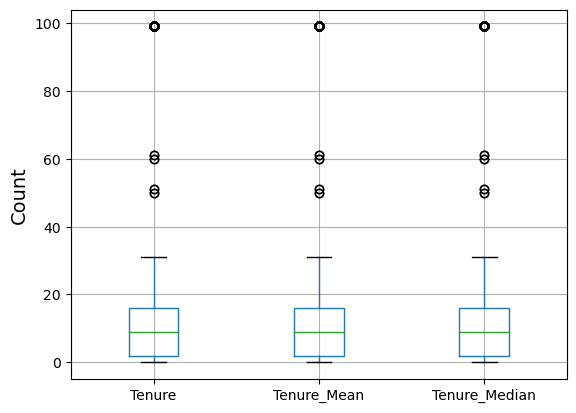

In [ ]:
df_1[['Tenure', 'Tenure_Mean', 'Tenure_Median']].boxplot()
plt.ylabel('Count', fontsize = 14)
plt.show();

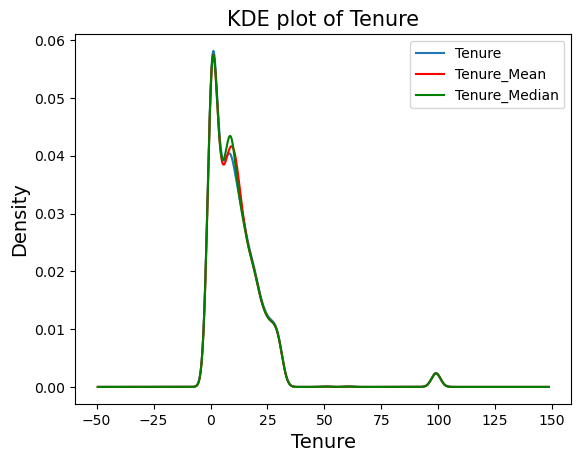

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_1['Tenure'].plot(kind='kde', ax=ax)
df_1['Tenure_Mean'].plot(kind='kde', color='red', ax=ax)
df_1['Tenure_Median'].plot(kind='kde', color='green',ax=ax)

plt.xlabel('Tenure', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('KDE plot of Tenure', fontsize = 15)

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show();

In [ ]:
#CC_Contacted_LY
mean_CC_Contacted_LY = df_1['CC_Contacted_LY'].mean()
median_CC_Contacted_LY = df_1['CC_Contacted_LY'].median()

In [ ]:
df_1['CC_Contacted_LY_Mean'] = df_1['CC_Contacted_LY'].fillna(mean_CC_Contacted_LY)
df_1['CC_Contacted_LY_Median'] = df_1['CC_Contacted_LY'].fillna(median_CC_Contacted_LY)

In [ ]:
print('Original CC_Contacted_LY variable variance is', df_1['CC_Contacted_LY'].var())
print('CC_Contacted_LY variance after mean imputation is', df_1['CC_Contacted_LY_Mean'].var())
print('CC_Contacted_LY variance after median imputation is', df_1['CC_Contacted_LY_Median'].var())

Original CC_Contacted_LY variable variance is 78.3803796513272
CC_Contacted_LY variance after mean imputation is 77.67029894039064
CC_Contacted_LY variance after median imputation is 77.70159424857735


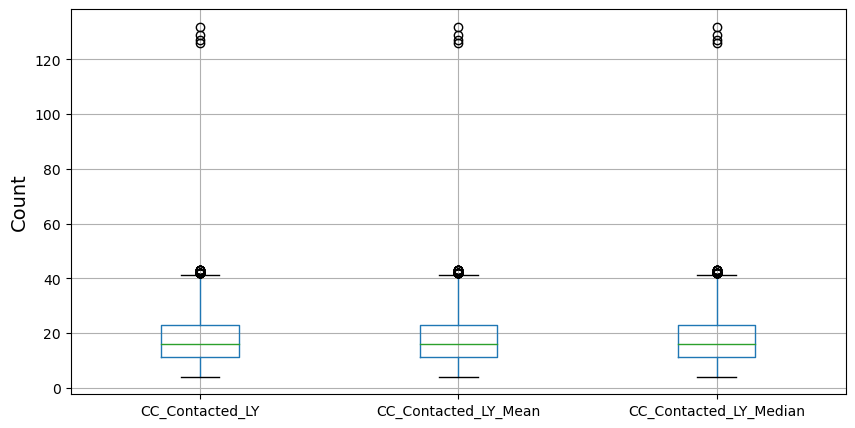

In [ ]:
plt.figure(figsize=(10,5))
df_1[['CC_Contacted_LY', 'CC_Contacted_LY_Mean', 'CC_Contacted_LY_Median']].boxplot()
plt.ylabel('Count', fontsize = 14)
plt.show();

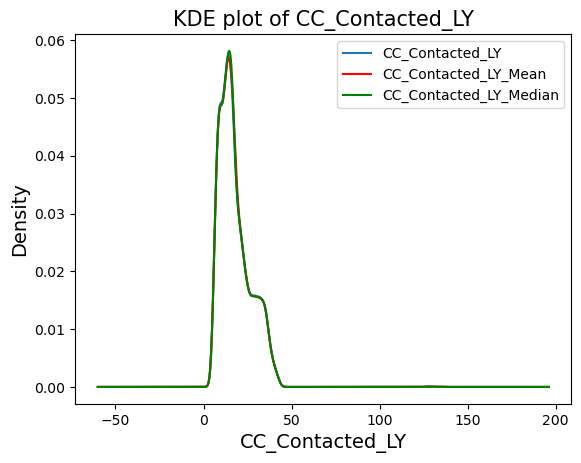

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_1['CC_Contacted_LY'].plot(kind = 'kde', ax = ax)
df_1['CC_Contacted_LY_Mean'].plot(kind = 'kde', ax = ax, color = 'red')
df_1['CC_Contacted_LY_Median'].plot(kind = 'kde', ax = ax, color = 'green')

plt.xlabel('CC_Contacted_LY', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('KDE plot of CC_Contacted_LY', fontsize = 15)

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show();

In [ ]:
#Account_User_Count
mean_Account_User_Count = df_1['Account_User_Count'].mean()
median_Account_User_Count = df_1['Account_User_Count'].median()

In [ ]:
df_1['Account_User_Count_Mean'] = df_1['Account_User_Count'].fillna(mean_Account_User_Count)
df_1['Account_User_Count_Median'] = df_1['Account_User_Count'].fillna(median_Account_User_Count)

In [ ]:
print('Account_User_Count variable variance is', df_1['Account_User_Count'].var())
print('Account_User_Count variance after mean imputation is', df_1['Account_User_Count_Mean'].var())
print('Account_User_Count variance after median imputation is', df_1['Account_User_Count_Median'].var())

Account_User_Count variable variance is 1.0464807193054673
Account_User_Count variance after mean imputation is 1.005212628056542
Account_User_Count variance after median imputation is 1.0087859927175482


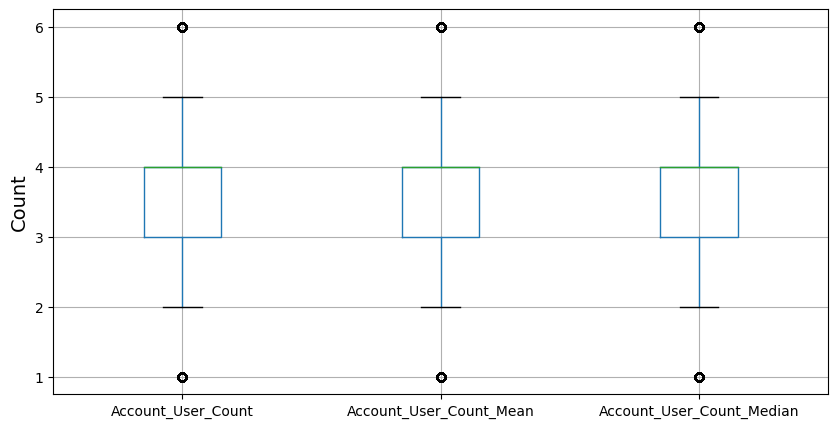

In [ ]:
plt.figure(figsize=(10,5))
df_1[['Account_User_Count', 'Account_User_Count_Mean', 'Account_User_Count_Median']].boxplot()
plt.ylabel('Count', fontsize = 14)
plt.show();

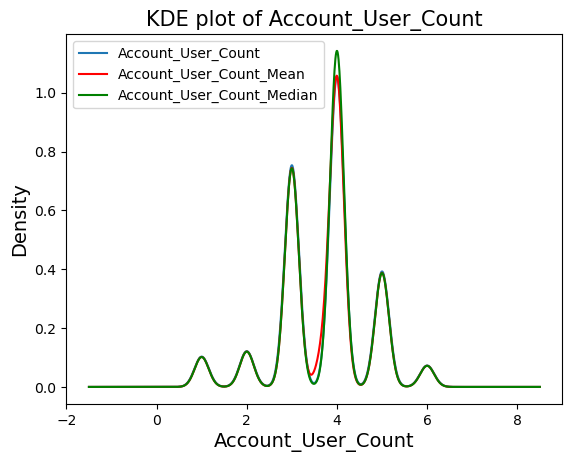

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_1['Account_User_Count'].plot(kind = 'kde', ax = ax)
df_1['Account_User_Count_Mean'].plot(kind  = 'kde', ax = ax, color = 'red')
df_1['Account_User_Count_Median'].plot(kind = 'kde', ax = ax, color = 'green')

plt.xlabel('Account_User_Count',fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('KDE plot of Account_User_Count', fontsize = 15)

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show();

In [ ]:
#Rev_Per_Month
mean_Rev_Per_Month = df_1['Rev_Per_Month'].mean()
median_Rev_Per_Month = df_1['Rev_Per_Month'].median()

In [ ]:
df_1['Rev_Per_Month_Mean'] = df_1['Rev_Per_Month'].fillna(mean_Rev_Per_Month)
df_1['Rev_Per_Month_Median'] = df_1['Rev_Per_Month'].fillna(median_Rev_Per_Month)

In [ ]:
print('Orginal Rev_Per_Month varibale variance is', df_1['Rev_Per_Month'].var())
print('Rev_Per_Month variance after mean imputation is', df_1['Rev_Per_Month_Mean'].var())
print('Rev_Per_Month variance after median imputation is', df_1['Rev_Per_Month_Median'].var())

Orginal Rev_Per_Month varibale variance is 141.8406182592828
Rev_Per_Month variance after mean imputation is 131.8756187883624
Rev_Per_Month variance after median imputation is 131.99689528030177


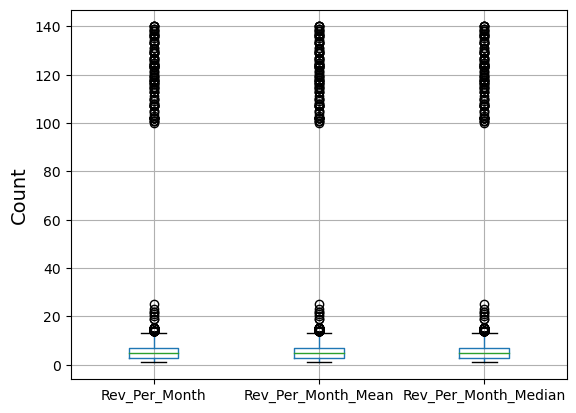

In [ ]:
df_1[['Rev_Per_Month', 'Rev_Per_Month_Mean', 'Rev_Per_Month_Median']].boxplot()
plt.ylabel('Count', fontsize = 14)
plt.show();

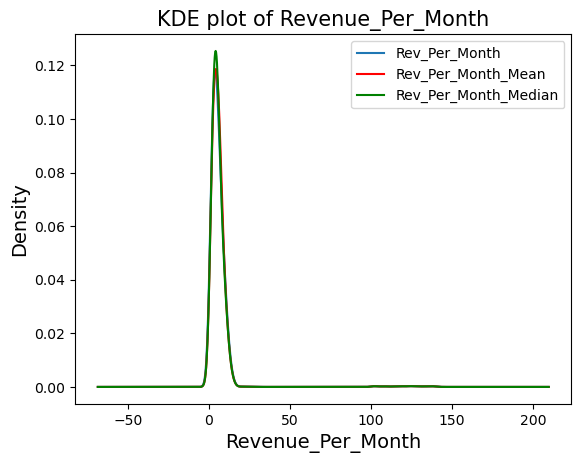

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_1['Rev_Per_Month'].plot(kind = 'kde', ax = ax)
df_1['Rev_Per_Month_Mean'].plot(kind = 'kde', ax = ax, color = 'red')
df_1['Rev_Per_Month_Median'].plot(kind = 'kde', ax = ax, color = 'green')

plt.xlabel('Revenue_Per_Month', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('KDE plot of Revenue_Per_Month', fontsize = 15)

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show();

In [ ]:
#Complain_LY
mean_Complain_LY = df_1['Complain_LY'].mean()
median_Complain_LY = df_1['Complain_LY'].median()

In [ ]:
df_1['Complain_LY_Mean'] = df_1['Complain_LY'].fillna(mean_Complain_LY)
df_1['Complain_LY_Median'] = df_1['Complain_LY'].fillna(median_Complain_LY)

In [ ]:
print('Original Complain_LY variable variance is', df_1['Complain_LY'].var())
print('Complain_LY variance after mean imputation is', df_1['Complain_LY_Mean'].var())
print('Complain_LY variance after median imputation is', df_1['Complain_LY_Median'].var())

Original Complain_LY variable variance is 0.2039373469486366
Complain_LY variance after mean imputation is 0.1974709082897258
Complain_LY variance after median imputation is 0.1999705859941992


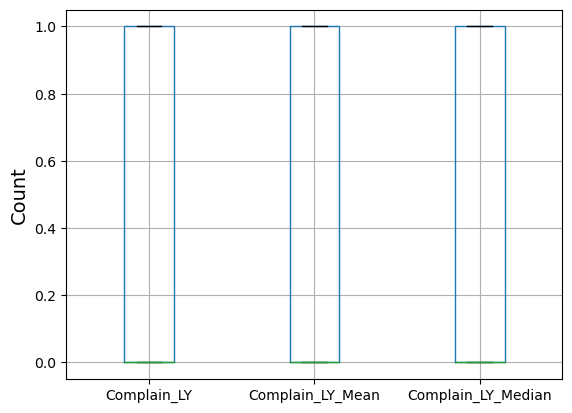

In [ ]:
df_1[['Complain_LY', 'Complain_LY_Mean', 'Complain_LY_Median']].boxplot()
plt.ylabel('Count', fontsize = 14)
plt.show();

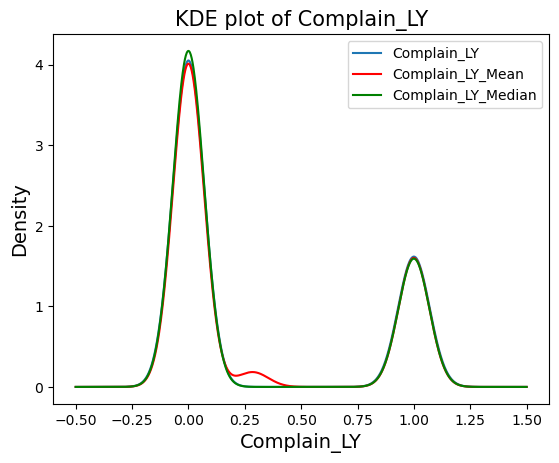

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_1['Complain_LY'].plot(kind = 'kde', ax = ax)
df_1['Complain_LY_Mean'].plot(kind = 'kde', ax = ax , color = 'red')
df_1['Complain_LY_Median'].plot(kind = 'kde', ax = ax, color = 'green')

plt.xlabel('Complain_LY', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('KDE plot of Complain_LY', fontsize = 15)

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')
plt.show();

In [ ]:
#Day_Since_CC_Connect
mean_Day_Since_CC_Connect = df_1['Day_Since_CC_Connect'].mean()
median_Day_Since_CC_Connect = df_1['Day_Since_CC_Connect'].median()

In [ ]:
df_1['Day_Since_CC_Connect_Mean'] = df_1['Day_Since_CC_Connect'].fillna(mean_Day_Since_CC_Connect)
df_1['Day_Since_CC_Connect_Median'] = df_1['Day_Since_CC_Connect'].fillna(median_Day_Since_CC_Connect)

In [ ]:
print('Original Day_Since_CC_Connect variable variance is', df_1['Day_Since_CC_Connect'].var())
print('Day_Since_CC_Connect variance after mean imputation is', df_1['Day_Since_CC_Connect_Mean'].var())
print('Day_Since_CC_Connect variable after median imputation is', df_1['Day_Since_CC_Connect_Median'].var())

Original Day_Since_CC_Connect variable variance is 13.672517484498155
Day_Since_CC_Connect variance after mean imputation is 13.23777538844608
Day_Since_CC_Connect variable after median imputation is 13.319890406996159


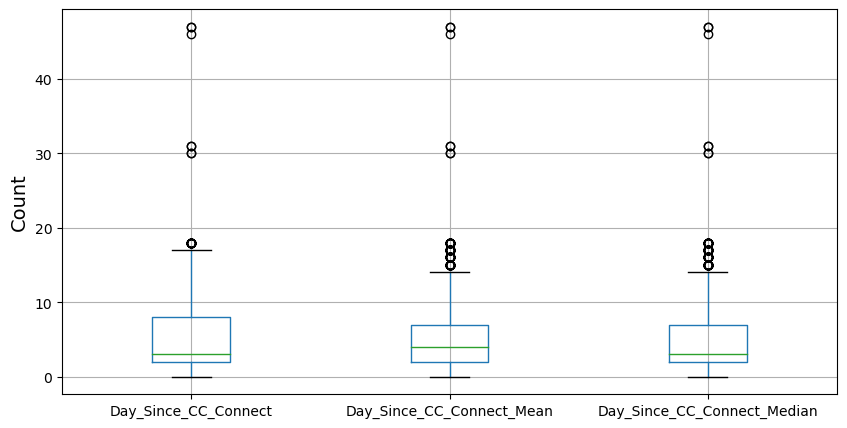

In [ ]:
plt.figure(figsize=(10,5))
df_1[['Day_Since_CC_Connect', 'Day_Since_CC_Connect_Mean', 'Day_Since_CC_Connect_Median']].boxplot()
plt.ylabel('Count',fontsize = 14)
plt.show()

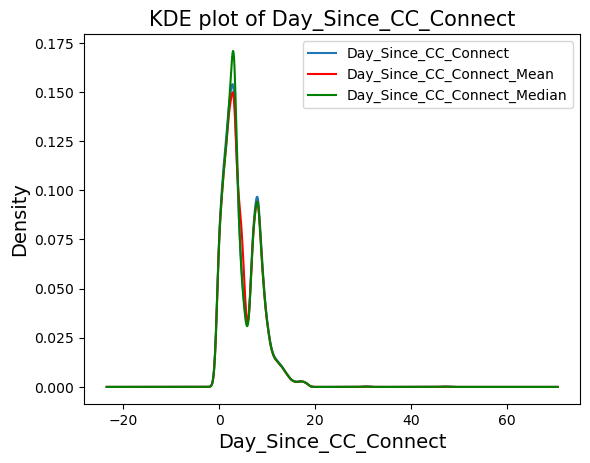

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_1['Day_Since_CC_Connect'].plot(kind = 'kde', ax = ax)
df_1['Day_Since_CC_Connect_Mean'].plot(kind = 'kde', ax = ax, color = 'red')
df_1['Day_Since_CC_Connect_Median'].plot(kind = 'kde', ax = ax, color = 'green')

plt.xlabel('Day_Since_CC_Connect', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('KDE plot of Day_Since_CC_Connect', fontsize = 15)

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')
plt.show();

In [ ]:
#Cashback
mean_Cashback = df_1['Cashback'].mean()
median_Cashback = df_1['Cashback'].median()

In [ ]:
df_1['Cashback_Mean'] = df_1['Cashback'].fillna(mean_Cashback)
df_1['Cashback_Median'] = df_1['Cashback'].fillna(median_Cashback)

In [ ]:
print('Original Cashback varibale variance is', df_1['Cashback'].var())
print('Cashback variance after mean imputation is',df_1['Cashback_Mean'].var())
print('Cashback variance after median imputation is', df_1['Cashback_Median'].var())

Original Cashback varibale variance is 31919.579099688202
Cashback variance after mean imputation is 30578.61090409778
Cashback variance after median imputation is 30617.25338547198


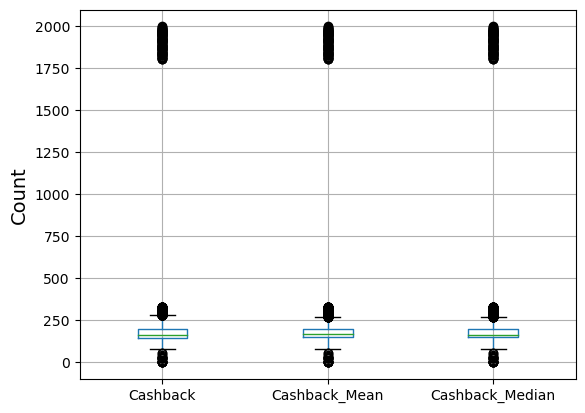

In [ ]:
df_1[['Cashback', 'Cashback_Mean', 'Cashback_Median']].boxplot()
plt.ylabel('Count', fontsize = 14)
plt.show();

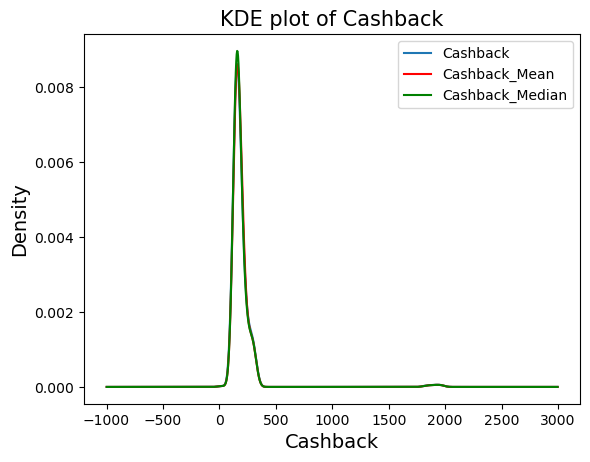

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_1['Cashback'].plot(kind = 'kde', ax = ax)
df_1['Cashback_Mean'].plot(kind = 'kde', ax = ax, color = 'red')
df_1['Cashback_Median'].plot(kind = 'kde', ax = ax, color = 'green')

plt.xlabel('Cashback', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('KDE plot of Cashback', fontsize = 15)

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')
plt.show();

In [ ]:
#Dropping mean & median columns
df_1 = df_1.drop(['Tenure_Mean', 'Tenure_Median',
                'CC_Contacted_LY_Mean', 'CC_Contacted_LY_Median',
                'Account_User_Count_Mean', 'Account_User_Count_Median',
                'Rev_Per_Month_Mean', 'Rev_Per_Month_Median',
                'Complain_LY_Mean', 'Complain_LY_Median',
                'Day_Since_CC_Connect_Mean', 'Day_Since_CC_Connect_Median',
                'Cashback_Mean', 'Cashback_Median'], axis = 1)

In [ ]:
df_1.shape

(11260, 18)

In [ ]:
#Imputing null values in original columns
df_1['Tenure'] = df_1['Tenure'].fillna(df_1['Tenure'].median())
df_1['CC_Contacted_LY'] = df_1['CC_Contacted_LY'].fillna(df_1['CC_Contacted_LY'].median())
df_1['Account_User_Count'] = df_1['Account_User_Count'].fillna(df_1['Account_User_Count'].median())
df_1['Rev_Per_Month'] = df_1['Rev_Per_Month'].fillna(df_1['Rev_Per_Month'].median())
df_1['Complain_LY'] = df_1['Complain_LY'].fillna(df_1['Complain_LY'].median())
df_1['Day_Since_CC_Connect'] = df_1['Day_Since_CC_Connect'].fillna(df_1['Day_Since_CC_Connect'].mean())
df_1['Cashback'] = df_1['Cashback'].fillna(df_1['Cashback'].median())
df_1['Rev_Growth_YoY'] = df_1['Rev_Growth_YoY'].fillna(df['Rev_Growth_YoY'].median())
df_1['Coupon_Used_For_Payment'] = df_1['Coupon_Used_For_Payment'].fillna(df_1['Coupon_Used_For_Payment'].median())

In [ ]:
df_1.isnull().sum()

Churn                        0
Tenure                       0
City_Tier                  112
CC_Contacted_LY              0
Payment                    109
Gender                     108
Service_Score               98
Account_User_Count           0
Account_Segment             97
CC_Agent_Score             116
Marital_Status             212
Rev_Per_Month                0
Complain_LY                  0
Rev_Growth_YoY               0
Coupon_Used_For_Payment      0
Day_Since_CC_Connect         0
Cashback                     0
Login_Device               232
dtype: int64

# Imputing categorical variables

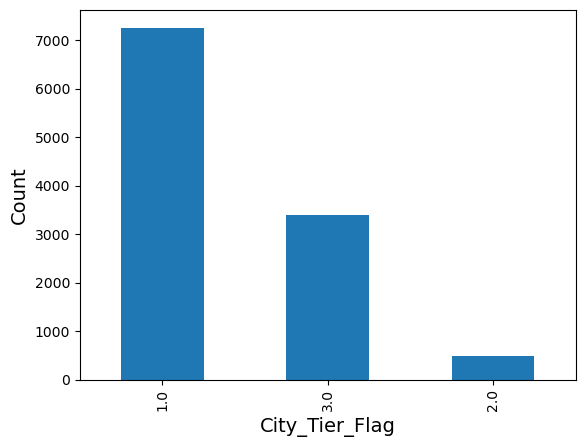

In [ ]:
#City_Tier
df_1['City_Tier'].value_counts().plot(kind = 'bar')
plt.xlabel('City_Tier_Flag', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show();

In [ ]:
df_1['City_Tier'].mode()

0    1.0
Name: City_Tier, dtype: float64

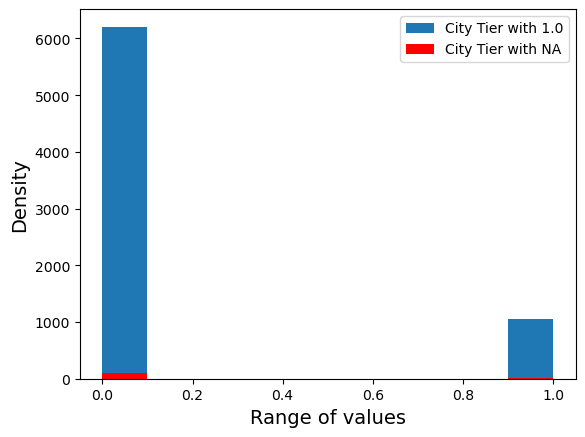

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_1[df_1['City_Tier'] == 1]['Churn'].plot(kind = 'hist', ax = ax)
df_1[df_1['City_Tier'].isnull()]['Churn'].plot(kind = 'hist', ax = ax, color = 'red')

plt.xlabel('Range of values', fontsize = 14)
plt.ylabel('Density', fontsize = 14)

lines, labels = ax.get_legend_handles_labels()
labels = ['City Tier with 1.0', 'City Tier with NA']
ax.legend(lines, labels, loc = 'best')
plt.show();

In [ ]:
temp = df_1[df_1['City_Tier'] == 1]['Churn']

In [ ]:
df_1['City_Tier'].fillna(1, inplace = True)

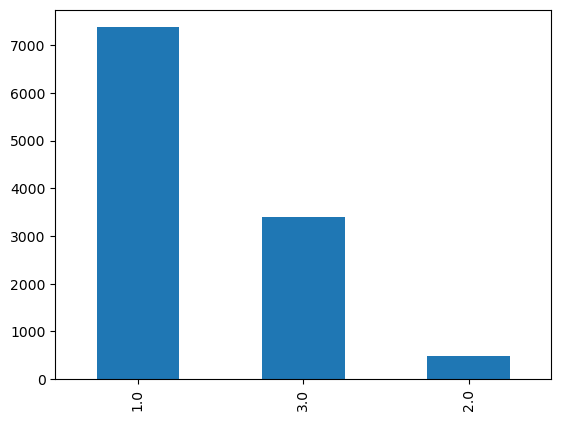

In [ ]:
df_1['City_Tier'].value_counts().plot(kind = 'bar')
plt.show();

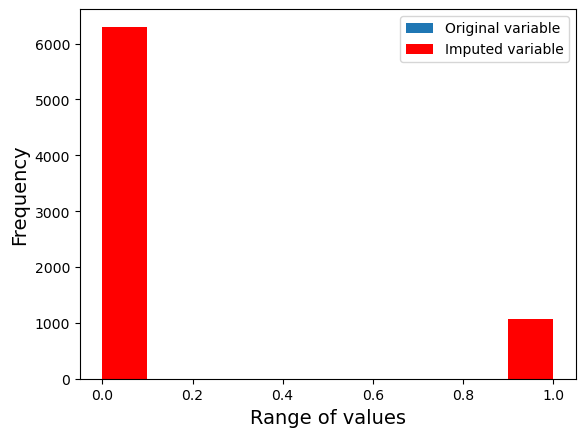

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind = 'hist', ax = ax)
df_1[df_1['City_Tier'] == 1]['Churn'].plot(kind = 'hist', ax = ax , color = 'red')

plt.xlabel('Range of values', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels)
plt.show();

In [ ]:
#Payment
df_1['Payment'].value_counts()

Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

In [ ]:
df_1[df_1['Payment'].isna()]

Churn  Tenure  City_Tier  CC_Contacted_LY Payment  Gender  \
39         0     0.0        1.0              9.0     NaN    Male   
49         0    18.0        3.0             10.0     NaN  Female   
75         0     0.0        1.0              6.0     NaN    Male   
143        0    18.0        1.0             26.0     NaN    Male   
427        0    29.0        1.0             15.0     NaN    Male   
...      ...     ...        ...              ...     ...     ...   
10593      0     8.0        1.0             16.0     NaN    Male   
10831      0     2.0        3.0             16.0     NaN    Male   
11081      1     1.0        1.0             19.0     NaN    Male   
11130      0    10.0        3.0             24.0     NaN  Female   
11242      1    14.0        3.0             13.0     NaN    Male   

       Service_Score  Account_User_Count Account_Segment  CC_Agent_Score  \
39               3.0                 4.0    Regular Plus             3.0   
49               1.0                 3.0           Super             5.0   
75               2.0                 4.0           Super             5.0   
143              3.0                 3.0      Super Plus             2.0   
427              2.0                 3.0      Super Plus             2.0   
...              ...                 ...             ...             ...   
10593            3.0                 5.0    Regular Plus             1.0   
10831            3.0                 4.0           Super             5.0   
11081            3.0                 4.0           Super             5.0   
11130            4.0                 5.0           Super             3.0   
11242            4.0                 4.0           Super             3.0   

      Marital_Status  Rev_Per_Month  Complain_LY  Rev_Growth_YoY  \
39           Married            2.0          1.0            15.0   
49           Married            5.0          1.0            11.0   
75          Divorced            6.0          0.0            19.0   
143         Divorced            1.0          1.0            14.0   
427         Divorced            8.0          0.0            11.0   
...              ...            ...          ...             ...   
10593        Married            9.0          0.0            19.0   
10831         Single            2.0          0.0            21.0   
11081         Single            5.0          0.0            16.0   
11130        Married            4.0          1.0            15.0   
11242        Married           11.0          0.0            13.0   

       Coupon_Used_For_Payment  Day_Since_CC_Connect  Cashback Login_Device  
39                         0.0                   1.0    125.66       Mobile  
49                         0.0                   3.0    150.06     Computer  
75                         0.0                   0.0    142.98       Mobile  
143                        0.0                  10.0    234.96     Computer  
427                        0.0                   1.0    211.03       Mobile  
...                        ...                   ...       ...          ...  
10593                      1.0                   1.0    161.79     Computer  
10831                      1.0                   4.0    215.63     Computer  
11081                      1.0                   9.0    169.13     Computer  
11130                      1.0                   8.0    185.73       Mobile  
11242                      2.0                   2.0    197.28       Mobile  

[109 rows x 18 columns]

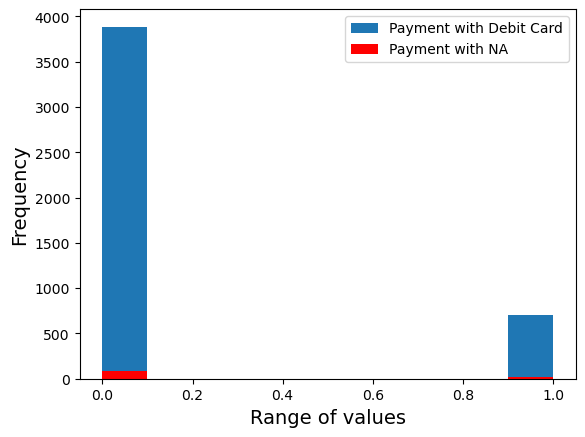

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_1[df_1['Payment'] == 'Debit Card']['Churn'].plot(kind = 'hist', ax = ax)
df_1[df_1['Payment'].isnull()]['Churn'].plot(kind = 'hist', ax = ax, color = 'red')

plt.xlabel('Range of values', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

lines, labels = ax.get_legend_handles_labels()
labels = ['Payment with Debit Card', 'Payment with NA']
ax.legend(lines, labels)
plt.show();

In [ ]:
temp_2 = df_1[df_1['Payment'] == 'Debit Card']['Churn']

In [ ]:
df_1['Payment'].fillna('Debit Card', inplace = True)

In [ ]:
df_1['Payment'].value_counts()

Debit Card          4696
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

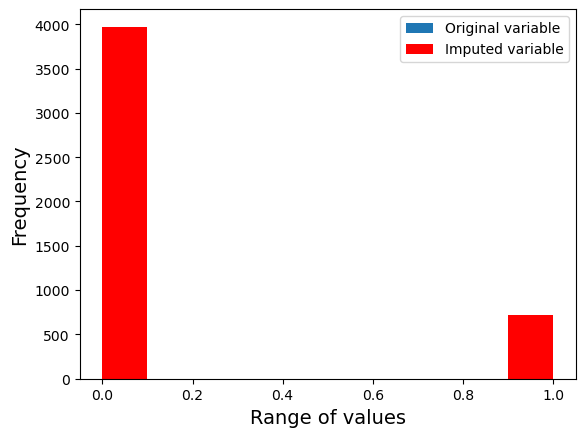

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp_2.plot(kind = 'hist', ax = ax)
df_1[df_1['Payment'] == 'Debit Card']['Churn'].plot(kind = 'hist', ax = ax, color = 'red')

plt.xlabel('Range of values', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels)
plt.show();

In [ ]:
#Gender
df_1['Gender'].value_counts()

Male      6704
Female    4448
Name: Gender, dtype: int64

In [ ]:
df_1['Gender'].value_counts(1)

Male      0.601148
Female    0.398852
Name: Gender, dtype: float64

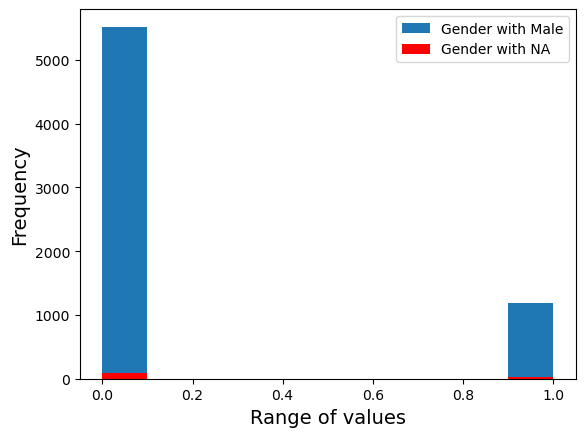

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_1[df_1['Gender'] == 'Male']['Churn'].plot(kind = 'hist', ax = ax)
df_1[df_1['Gender'].isnull()]['Churn'].plot(kind = 'hist', ax = ax, color = 'red')

plt.xlabel('Range of values', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

lines, labels = ax.get_legend_handles_labels()
labels = ['Gender with Male', 'Gender with NA']
ax.legend(lines, labels)
plt.show();

In [ ]:
temp_3 = df_1[df_1['Gender'] == 'Male']['Churn']

In [ ]:
df_1['Gender'].fillna('Male', inplace = True)

In [ ]:
df_1['Gender'].value_counts()

Male      6812
Female    4448
Name: Gender, dtype: int64

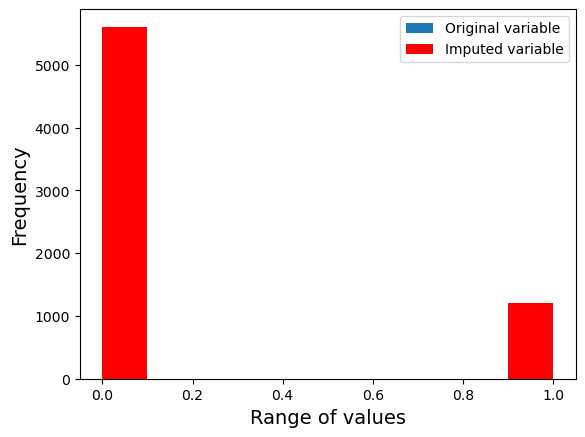

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

temp_3.plot(kind = 'hist', ax = ax)
df_1[df_1['Gender'] == 'Male']['Churn'].plot(kind = 'hist', ax = ax, color = 'red')

plt.xlabel('Range of values', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels)
plt.show();

In [ ]:
#Service_Score
df_1['Service_Score'].value_counts()

3.0    5490
2.0    3251
4.0    2331
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64

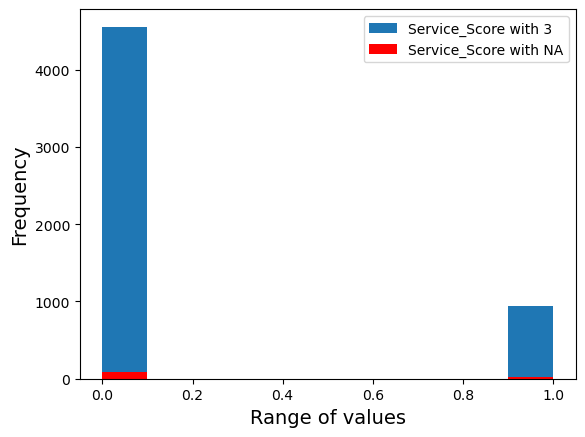

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_1[df_1['Service_Score'] == 3]['Churn'].plot(kind = 'hist', ax = ax)
df_1[df_1['Service_Score'].isnull()]['Churn'].plot(kind = 'hist', color = 'red', ax = ax)

plt.xlabel('Range of values', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

lines, labels = ax.get_legend_handles_labels()
labels = ['Service_Score with 3', 'Service_Score with NA']
ax.legend(lines, labels)
plt.show();

In [ ]:
temp_4 = df_1[df_1['Service_Score'] == 3]['Churn']

In [ ]:
df_1['Service_Score'].fillna(3, inplace = True)

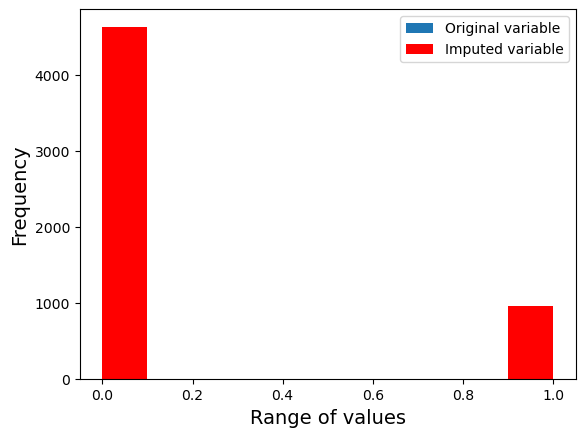

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp_4.plot(kind = 'hist', ax = ax)
df_1[df_1['Service_Score'] == 3]['Churn'].plot(kind = 'hist', ax = ax, color = 'red')

plt.xlabel('Range of values', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels)
plt.show();

In [ ]:
#Account_Segment
df_1['Account_Segment'].value_counts()

Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: Account_Segment, dtype: int64

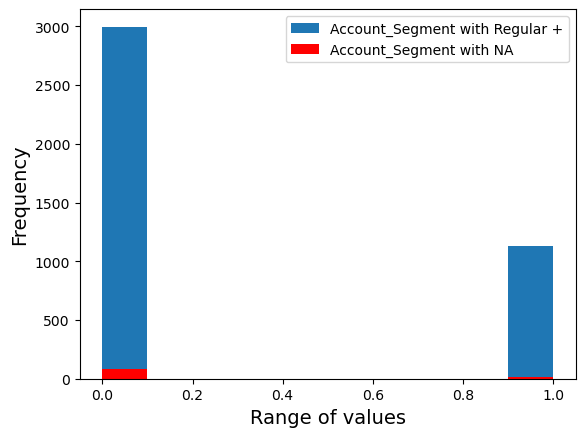

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_1[df_1['Account_Segment'] == 'Regular Plus']['Churn'].plot(kind = 'hist', ax = ax)
df_1[df_1['Account_Segment'].isnull()]['Churn'].plot(kind = 'hist', color = 'red', ax = ax)

plt.xlabel('Range of values', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

lines, labels = ax.get_legend_handles_labels()
labels = ['Account_Segment with Regular +','Account_Segment with NA']
ax.legend(lines, labels)
plt.show();

In [ ]:
temp_5 = df_1[df_1['Account_Segment'] == 'Regular Plus']['Churn']

In [ ]:
df_1['Account_Segment'].fillna('Regular Plus', inplace = True)

In [ ]:
df_1['Account_Segment'].value_counts()

Regular Plus    4221
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: Account_Segment, dtype: int64

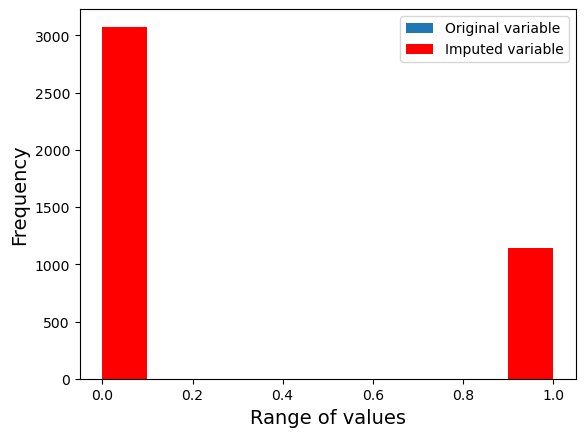

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp_5.plot(kind = 'hist', ax = ax)
df_1[df_1['Account_Segment'] == 'Regular Plus']['Churn'].plot(kind = 'hist', ax = ax, color = 'red')

plt.xlabel('Range of values', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels)
plt.show();

In [ ]:
#CC_Agent_Score
df_1['CC_Agent_Score'].value_counts()

3.0    3360
1.0    2302
5.0    2191
4.0    2127
2.0    1164
Name: CC_Agent_Score, dtype: int64

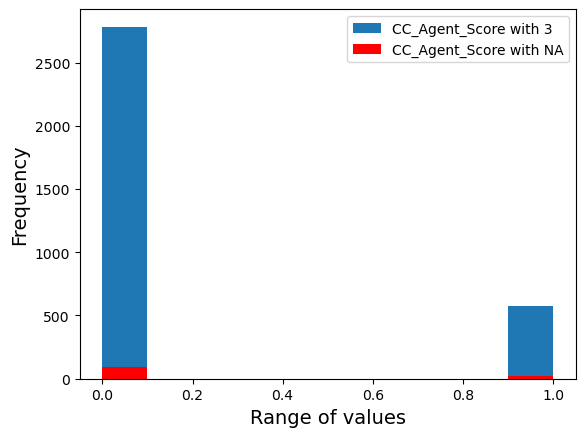

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_1[df_1['CC_Agent_Score'] == 3]['Churn'].plot(kind = 'hist', ax = ax)
df_1[df_1['CC_Agent_Score'].isnull()]['Churn'].plot(kind = 'hist', ax = ax, color = 'red')

plt.xlabel('Range of values', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

lines, labels = ax.get_legend_handles_labels()
labels = ['CC_Agent_Score with 3', 'CC_Agent_Score with NA']
ax.legend(lines, labels)
plt.show();

In [ ]:
temp_6 = df_1[df_1['CC_Agent_Score'] == 3]['Churn']

In [ ]:
df_1['CC_Agent_Score'].fillna(3, inplace = True)

In [ ]:
df_1['CC_Agent_Score'].value_counts()

3.0    3476
1.0    2302
5.0    2191
4.0    2127
2.0    1164
Name: CC_Agent_Score, dtype: int64

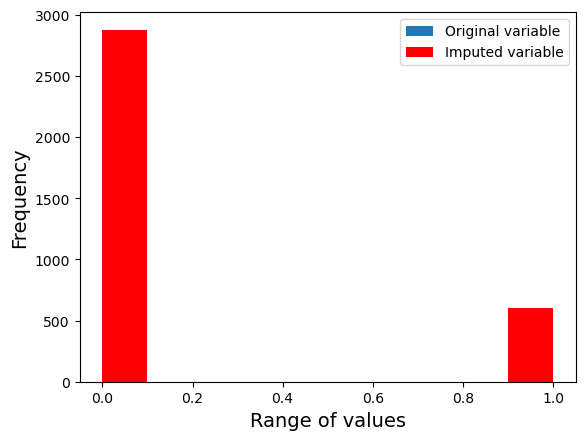

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp_6.plot(kind = 'hist', ax = ax)
df_1[df_1['CC_Agent_Score'] == 3]['Churn'].plot(kind = 'hist', ax = ax, color = 'red')

plt.xlabel('Range of values', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels)
plt.show();

In [ ]:
#Marital_Status
df_1['Marital_Status'].value_counts()

Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

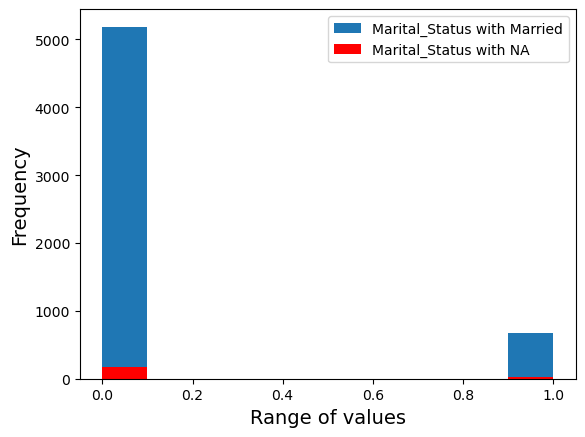

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_1[df_1['Marital_Status'] == 'Married']['Churn'].plot(kind = 'hist', ax = ax)
df_1[df_1['Marital_Status'].isnull()]['Churn'].plot(kind = 'hist', ax = ax, color = 'red')

plt.xlabel('Range of values', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

lines, labels = ax.get_legend_handles_labels()
labels = ['Marital_Status with Married', 'Marital_Status with NA']
ax.legend(lines, labels)
plt.show();

In [ ]:
temp_7 = df_1[df_1['Marital_Status'] == 'Married']['Churn']

In [ ]:
df_1['Marital_Status'].fillna('Married', inplace = True)

In [ ]:
df_1['Marital_Status'].value_counts()

Married     6072
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

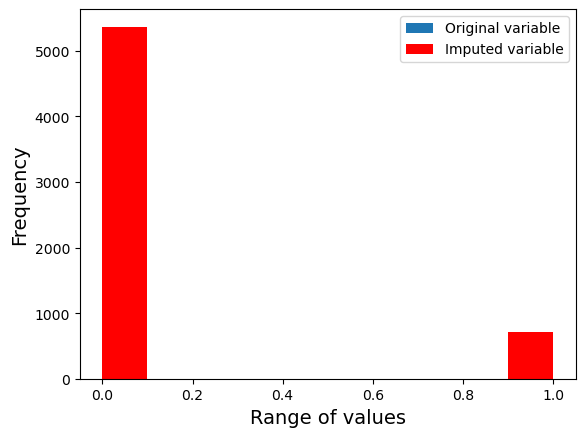

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp_7.plot(kind = 'hist', ax = ax)
df_1[df_1['Marital_Status'] == 'Married']['Churn'].plot(kind = 'hist', ax = ax, color = 'red')

plt.xlabel('Range of values', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels)
plt.show();

In [ ]:
#Login_Device
df_1['Login_Device'].value_counts()

Mobile      7850
Computer    3178
Name: Login_Device, dtype: int64

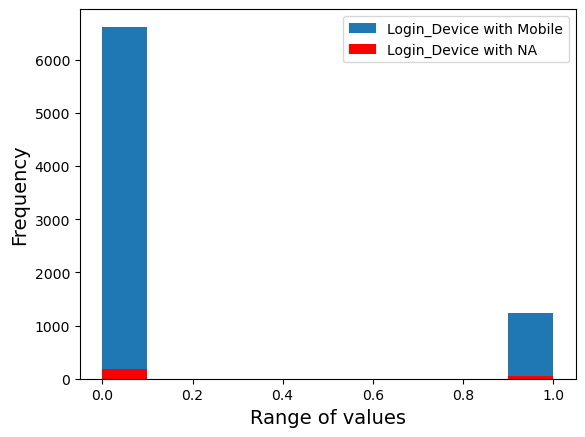

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_1[df_1['Login_Device'] == 'Mobile']['Churn'].plot(kind = 'hist', ax = ax)
df_1[df_1['Login_Device'].isnull()]['Churn'].plot(kind = 'hist', ax = ax, color = 'red')

plt.xlabel('Range of values', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

lines, labels = ax.get_legend_handles_labels()
labels = ['Login_Device with Mobile', 'Login_Device with NA']
ax.legend(lines, labels)
plt.show();

In [ ]:
temp_8 = df_1[df_1['Login_Device'] == 'Mobile']['Churn']

In [ ]:
df_1['Login_Device'].fillna('Mobile', inplace = True)

In [ ]:
df_1['Login_Device'].value_counts()

Mobile      8082
Computer    3178
Name: Login_Device, dtype: int64

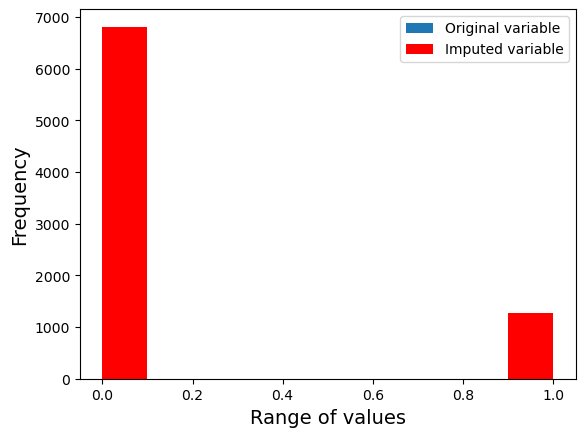

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp_8.plot(kind = 'hist', ax = ax)
df_1[df_1['Login_Device'] == 'Mobile']['Churn'].plot(kind = 'hist', ax = ax, color = 'red')

plt.xlabel('Range of values', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels)
plt.show();

In [ ]:
df_1.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_User_Count         0
Account_Segment            0
CC_Agent_Score             0
Marital_Status             0
Rev_Per_Month              0
Complain_LY                0
Rev_Growth_YoY             0
Coupon_Used_For_Payment    0
Day_Since_CC_Connect       0
Cashback                   0
Login_Device               0
dtype: int64

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  object 
 5   Gender                   11260 non-null  object 
 6   Service_Score            11260 non-null  float64
 7   Account_User_Count       11260 non-null  float64
 8   Account_Segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  object 
 11  Rev_Per_Month            11260 non-null  float64
 12  Complain_LY              11260 non-null  float64
 13  Rev_Growth_YoY           11260 non-null  float64
 14  Coupon_Used_For_Paymen

In [ ]:
df_1['City_Tier'] =  df_1['City_Tier'].astype('int64')
df_1['CC_Contacted_LY'] = df_1['CC_Contacted_LY'].astype('int64')
df_1['Service_Score'] = df_1['Service_Score'].astype('int64')
df_1['Account_User_Count'] = df_1['Account_User_Count'].astype('int64')
df_1['CC_Agent_Score'] = df_1['CC_Agent_Score'].astype('int64')
df_1['Complain_LY'] = df_1['Complain_LY'].astype('int64')
df_1['Coupon_Used_For_Payment'] = df_1['Coupon_Used_For_Payment'].astype('int64')
df_1['Day_Since_CC_Connect'] = df_1['Day_Since_CC_Connect'].astype('int64')

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  int64  
 3   CC_Contacted_LY          11260 non-null  int64  
 4   Payment                  11260 non-null  object 
 5   Gender                   11260 non-null  object 
 6   Service_Score            11260 non-null  int64  
 7   Account_User_Count       11260 non-null  int64  
 8   Account_Segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  int64  
 10  Marital_Status           11260 non-null  object 
 11  Rev_Per_Month            11260 non-null  float64
 12  Complain_LY              11260 non-null  int64  
 13  Rev_Growth_YoY           11260 non-null  float64
 14  Coupon_Used_For_Paymen

# Univariate Analysis

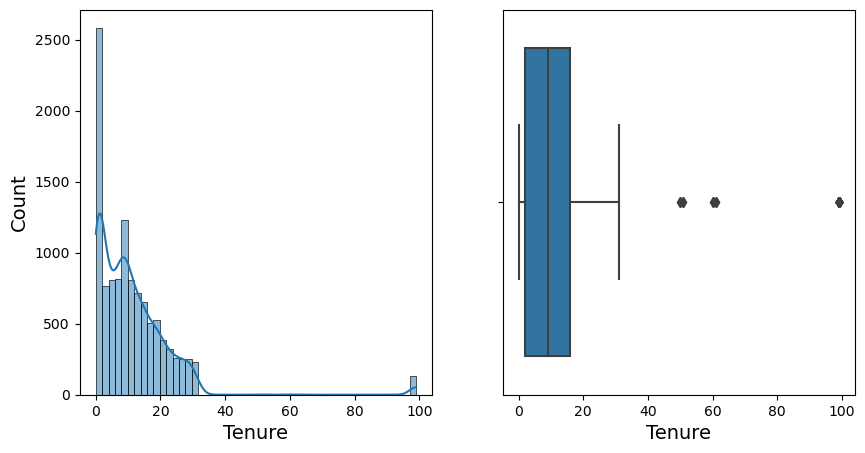

In [ ]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.histplot(x = 'Tenure', data = df_1, kde = True, bins = 50)
plt.xlabel('Tenure', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.subplot(1, 2, 2)
sns.boxplot(x = 'Tenure', data = df_1)
plt.xlabel('Tenure', fontsize = 14)
plt.show();

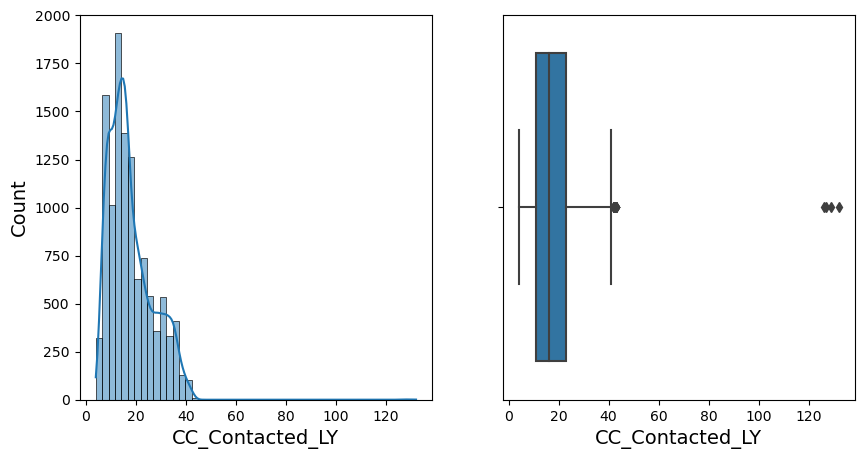

In [ ]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.histplot(x = 'CC_Contacted_LY', data = df_1, kde = True, bins = 50)
plt.xlabel('CC_Contacted_LY', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.subplot(1, 2, 2)
sns.boxplot(x = 'CC_Contacted_LY', data = df_1)
plt.xlabel('CC_Contacted_LY', fontsize = 14)
plt.show();

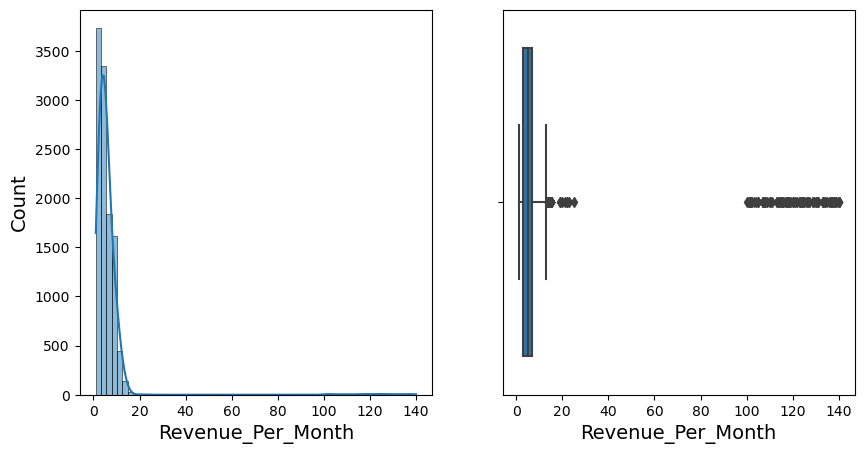

In [ ]:
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
sns.histplot(x = 'Rev_Per_Month', data = df_1, bins = 60, kde = 'True')
plt.xlabel('Revenue_Per_Month', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.subplot(1,2,2)
sns.boxplot(x = 'Rev_Per_Month', data = df_1)
plt.xlabel('Revenue_Per_Month', fontsize = 14)
plt.show();

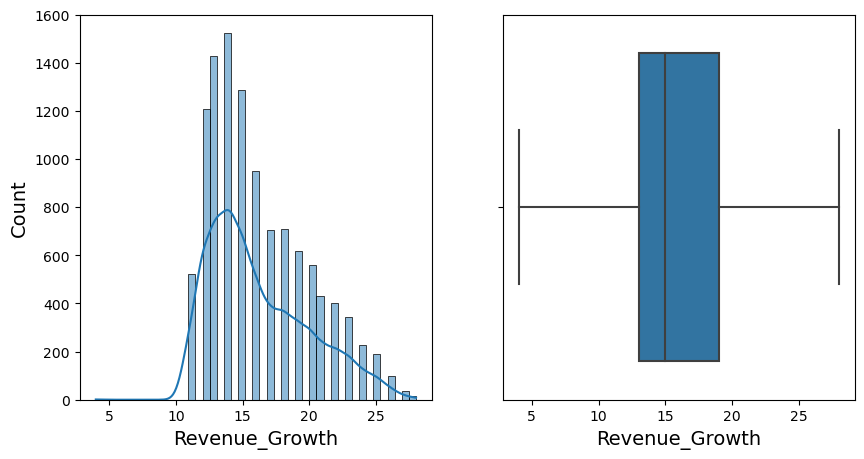

In [ ]:
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
sns.histplot(x = 'Rev_Growth_YoY', data = df_1, kde = 'True')
plt.xlabel('Revenue_Growth', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.subplot(1,2,2)
sns.boxplot(x = 'Rev_Growth_YoY', data = df_1)
plt.xlabel('Revenue_Growth', fontsize = 14)
plt.show();

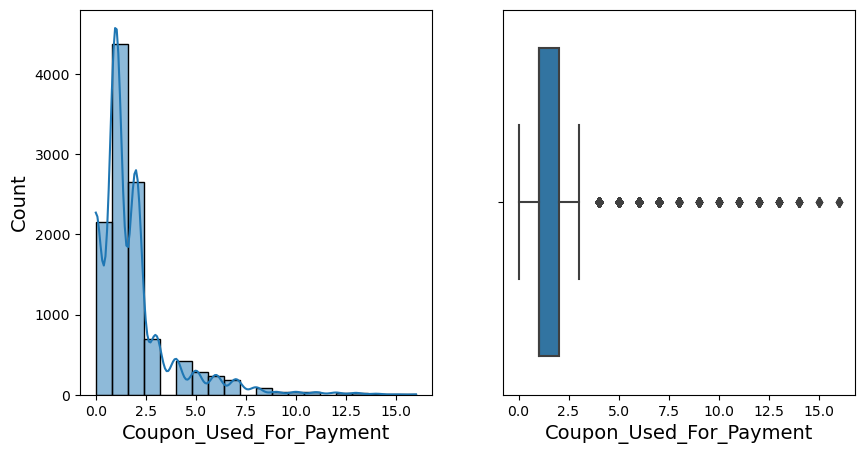

In [ ]:
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
sns.histplot(x = 'Coupon_Used_For_Payment', data = df_1, kde = 'True', bins = 20)
plt.xlabel('Coupon_Used_For_Payment', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.subplot(1,2,2)
sns.boxplot(x = 'Coupon_Used_For_Payment', data = df_1)
plt.xlabel('Coupon_Used_For_Payment', fontsize = 14)
plt.show();

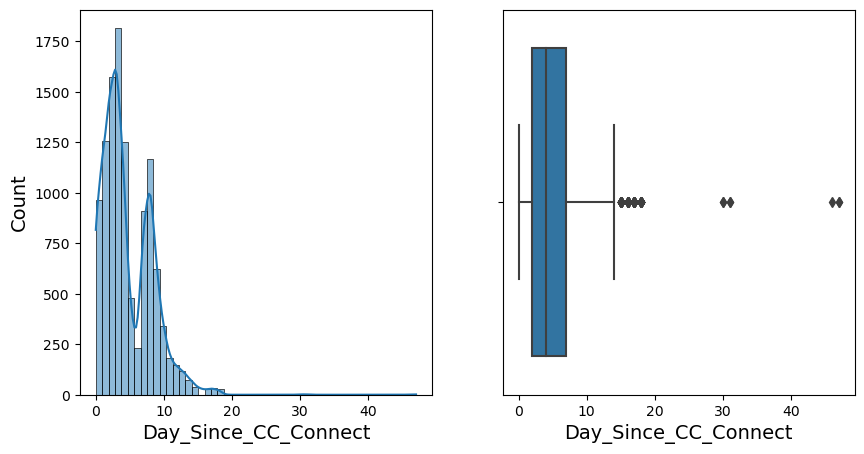

In [ ]:
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
sns.histplot(x = 'Day_Since_CC_Connect', data = df_1, kde = 'True', bins = 50)
plt.xlabel('Day_Since_CC_Connect', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.subplot(1,2,2)
sns.boxplot(x = 'Day_Since_CC_Connect', data = df_1)
plt.xlabel('Day_Since_CC_Connect', fontsize = 14)
plt.show();

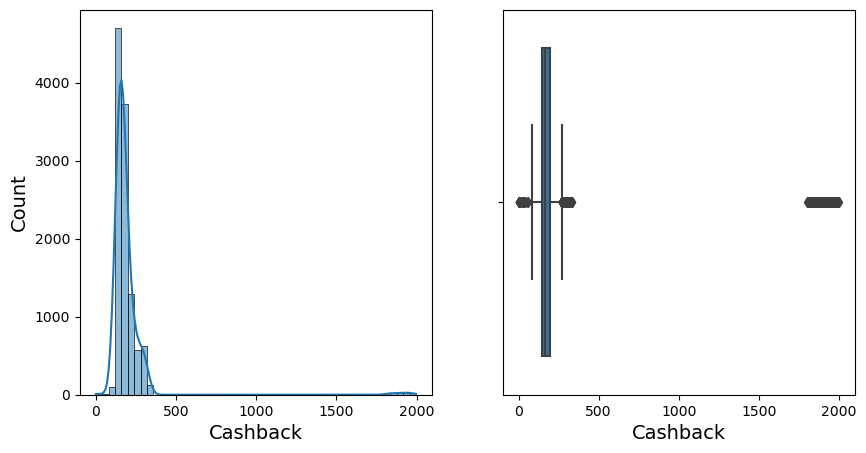

In [ ]:
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
sns.histplot(x = 'Cashback', data = df_1, kde = 'True', bins = 50)
plt.xlabel('Cashback', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.subplot(1,2,2)
sns.boxplot(x = 'Cashback', data = df_1)
plt.xlabel('Cashback', fontsize = 14)
plt.show();

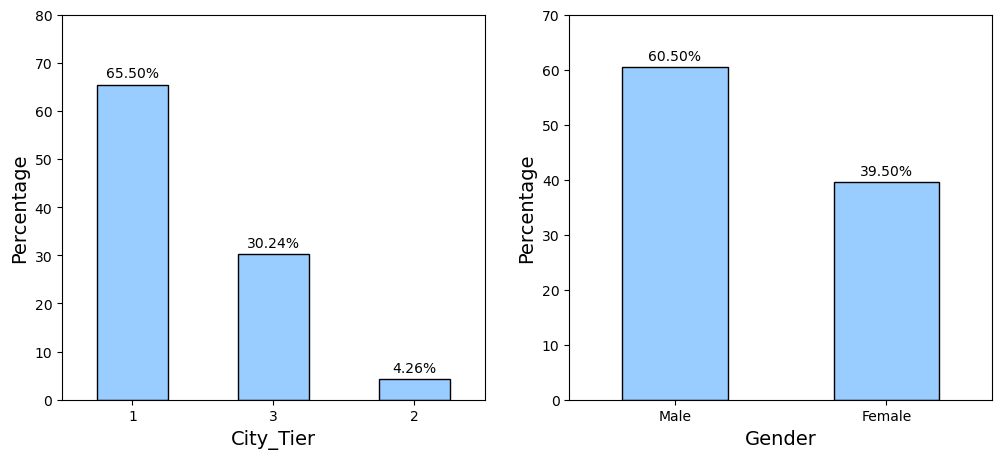

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ax_1 = df_1['City_Tier'].value_counts(normalize=True).mul(100).plot.bar(color="#99ccff", ec = 'black')
plt.xlabel('City_Tier', fontsize = 14)
plt.ylabel('Percentage',fontsize = 14)
plt.tick_params(axis = 'x', rotation = 0)
plt.ylim(0,80)

for p in ax_1.patches:
    x = p.get_x()+p.get_width()/2
    y = p.get_height()
    label = '{:.2f}%'.format(y)
    ax_1.annotate(label, xy = (x,y), xytext=(0,5), textcoords="offset points", ha = 'center')

plt.subplot(1,2,2)
ax_2 = df_1['Gender'].value_counts(1).mul(100).plot.bar(color = '#99ccff', ec = 'black')
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Percentage', fontsize = 14)
plt.ylim(0,70)
plt.tick_params(axis = 'x', rotation = 0)

for p in ax_2.patches:
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    label = '{:.2f}%'.format(y)
    ax_2.annotate(label, xy = (x,y), xytext = (0, 5), textcoords = 'offset points', ha = 'center')

plt.show();

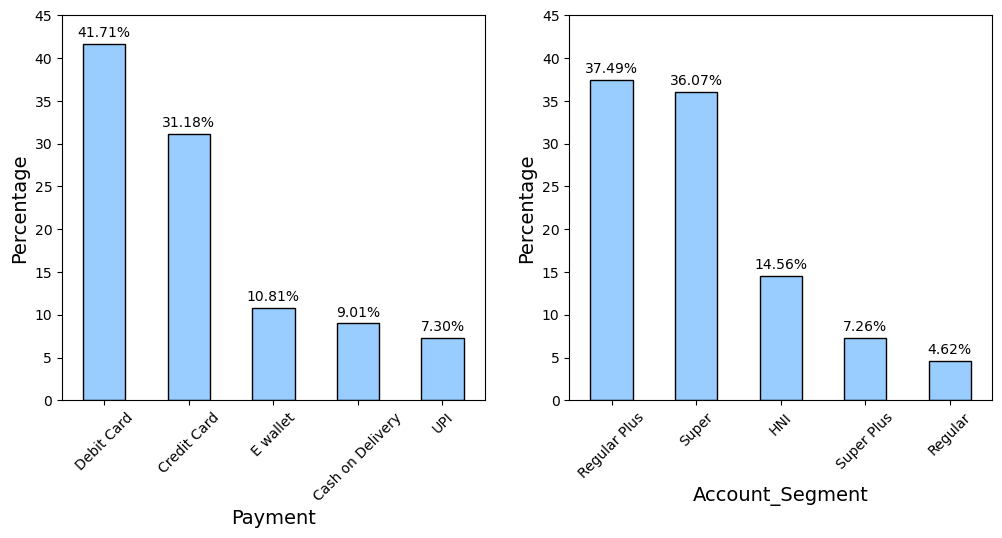

In [ ]:
plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
ax_3 = df_1['Payment'].value_counts(1).mul(100).plot.bar(color = '#99ccff', ec = 'black')
plt.xlabel('Payment', fontsize = 14)
plt.ylabel('Percentage', fontsize = 14)
plt.ylim(0, 45)
plt.tick_params(axis = 'x', rotation = 45)

for p in ax_3.patches:
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    label = '{:.2f}%'.format(y)
    ax_3.annotate(label, xy = (x, y), xytext = (0, 5), textcoords = 'offset points', ha = 'center')

plt.subplot(1,2,2)
ax_4 = df_1['Account_Segment'].value_counts(1).mul(100).plot.bar(color = '#99ccff', ec = 'black')
plt.xlabel('Account_Segment', fontsize = 14)
plt.ylabel('Percentage', fontsize = 14)
plt.ylim(0, 45)
plt.tick_params(axis = 'x', rotation = 45)

for p in ax_4.patches:
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    label = '{:.2f}%'.format(y)
    ax_4.annotate(label, xy = (x, y), xytext = (0, 5), textcoords = 'offset points', ha = 'center')

plt.show();

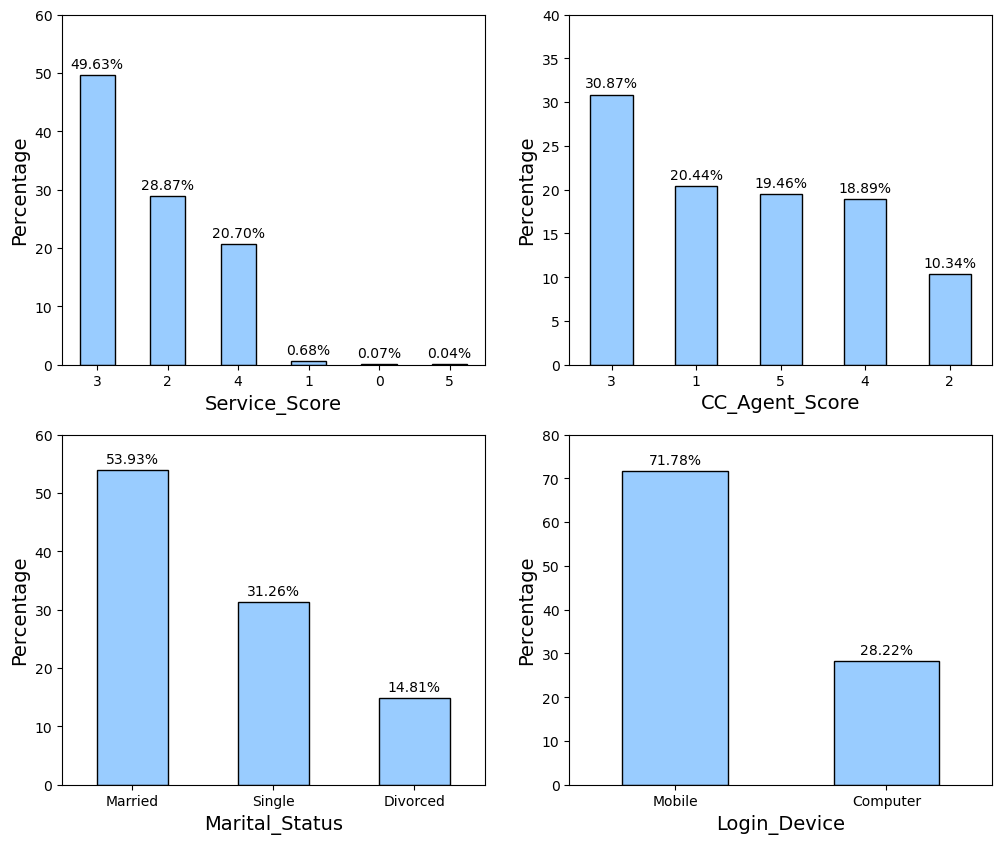

In [ ]:
plt.figure(figsize = (12, 10))
plt.subplot(2,2,1)
ax_5 = df_1['Service_Score'].value_counts(1).mul(100).plot.bar(color = '#99ccff', ec = 'black')
plt.xlabel('Service_Score', fontsize = 14)
plt.ylabel('Percentage', fontsize = 14)
plt.ylim(0, 60)
plt.tick_params(axis = 'x', rotation = 0)

for p in ax_5.patches:
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    label = '{:.2f}%'.format(y)
    ax_5.annotate(label, xy = (x, y), xytext = (0, 5), textcoords = 'offset points', ha = 'center')

plt.subplot(2,2,2)
ax_6 = df_1['CC_Agent_Score'].value_counts(1).mul(100).plot.bar(color = '#99ccff', ec = 'black')
plt.xlabel('CC_Agent_Score', fontsize = 14)
plt.ylabel('Percentage', fontsize = 14)
plt.ylim(0, 40)
plt.tick_params(axis = 'x', rotation = 0)

for p in ax_6.patches:
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    label = '{:.2f}%'.format(y)
    ax_6.annotate(label, xy = (x, y), xytext = (0, 5), textcoords = 'offset points', ha = 'center')

plt.subplot(2,2,3)
ax_7 = df_1['Marital_Status'].value_counts(1).mul(100).plot.bar(color = '#99ccff', ec = 'black')
plt.xlabel('Marital_Status', fontsize = 14)
plt.ylabel('Percentage', fontsize = 14)
plt.ylim(0, 60)
plt.tick_params(axis = 'x', rotation = 0)

for p in ax_7.patches:
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    label = '{:.2f}%'.format(y)
    ax_7.annotate(label, xy = (x, y), xytext = (0, 5), textcoords = 'offset points', ha = 'center')

plt.subplot(2,2,4)
ax_8 = df_1['Login_Device'].value_counts(1).mul(100).plot.bar(color = '#99ccff', ec = 'black')
plt.xlabel('Login_Device', fontsize = 14)
plt.ylabel('Percentage', fontsize = 14)
plt.ylim(0, 80)
plt.tick_params(axis = 'x', rotation = 0)

for p in ax_8.patches:
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    label = '{:.2f}%'.format(y)
    ax_8.annotate(label, xy = (x, y), xytext = (0, 5), textcoords = 'offset points', ha = 'center')

plt.show();

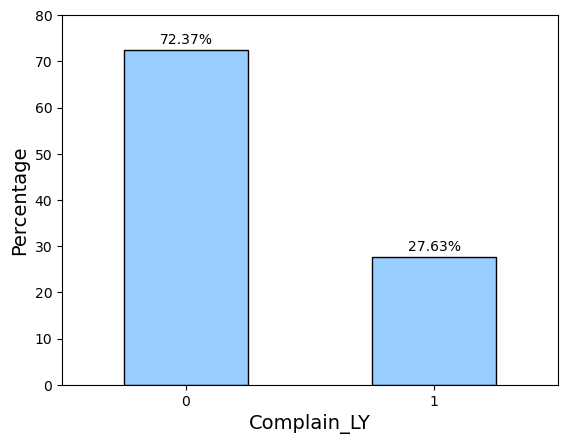

In [ ]:
ax_9 = df_1['Complain_LY'].value_counts(1).mul(100).plot.bar(color = '#99ccff', ec = 'black')
plt.xlabel('Complain_LY', fontsize = 14)
plt.ylabel('Percentage', fontsize = 14)
plt.ylim(0, 80)
plt.tick_params(axis = 'x', rotation = 0)

for p in ax_9.patches:
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    label = '{:.2f}%'.format(y)
    ax_9.annotate(label, xy = (x, y), xytext = (0, 5), textcoords = 'offset points', ha = 'center')

plt.show();

# Bivariate Analysis

In [ ]:
df_101 = df_1.groupby(['Gender'])['Churn'].value_counts(1).mul(100).round(2).unstack()
df_101

Churn       0      1
Gender              
Female  84.51  15.49
Male    82.28  17.72

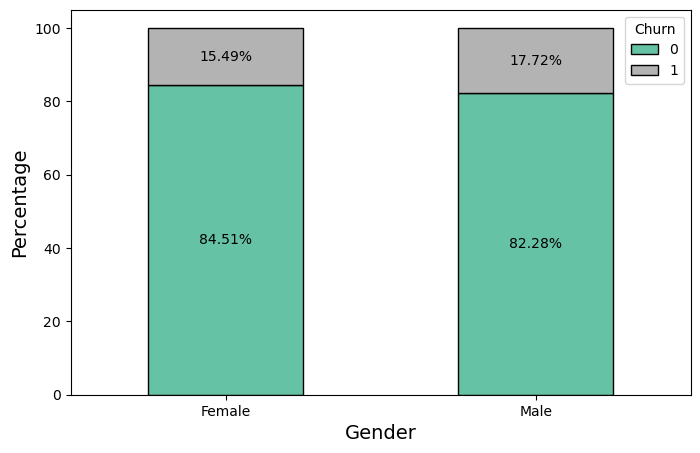

In [ ]:
ax_101 = df_101.plot(kind = 'bar', stacked = True, rot = 0, figsize = (8, 5), cmap = 'Set2', ec = 'black')

for c in ax_101.containers:
    labels = [str(round(v.get_height(), 2)) + '%' if v.get_height() > 0 else '' for v in c]
    ax_101.bar_label(c, label_type = 'center', labels = labels, size = 10)

ax_101.set_xlabel('Gender', fontsize = 14)
ax_101.set_ylabel('Percentage', fontsize = 14)
plt.show();

In [ ]:
df_102 = df_1.groupby(['Marital_Status'])['Churn'].value_counts(1).mul(100).round(2).unstack()
df_102

Churn               0      1
Marital_Status              
Divorced        85.37  14.63
Married         88.39  11.61
Single          73.10  26.90

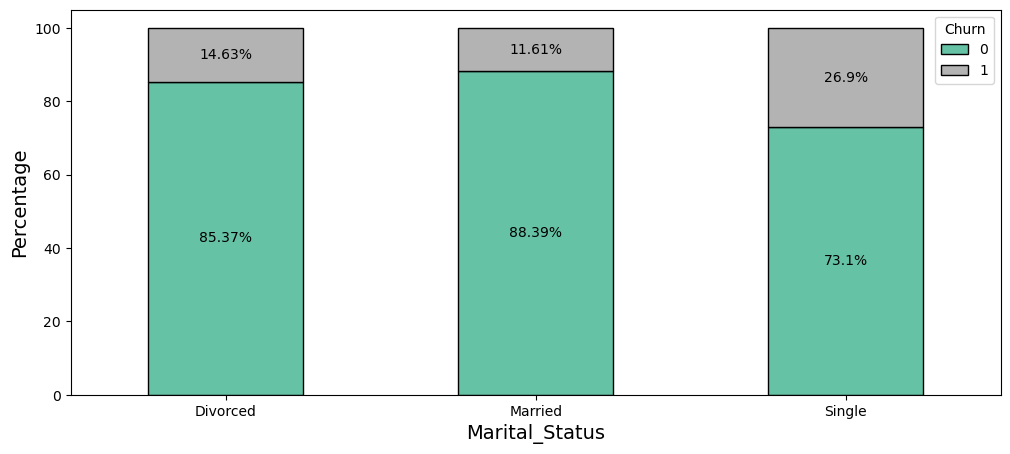

In [ ]:
ax_102 = df_102.plot(kind = 'bar', stacked = True, figsize = (12, 5), rot = 0, ec = 'black', cmap = 'Set2')

for c in ax_102.containers:
    labels = [str(round(v.get_height(), 2)) + '%' if v.get_height() > 0 else '' for v in c]
    ax_102.bar_label(c, label_type = 'center', labels = labels, size = 10)

ax_102.set_xlabel('Marital_Status', fontsize = 14)
ax_102.set_ylabel('Percentage', fontsize = 14)
plt.show();

In [ ]:
df_103 = df_1.groupby(['Login_Device'])['Churn'].value_counts(1).mul(100).round(2).unstack()
df_103

Churn             0      1
Login_Device              
Computer      80.33  19.67
Mobile        84.27  15.73

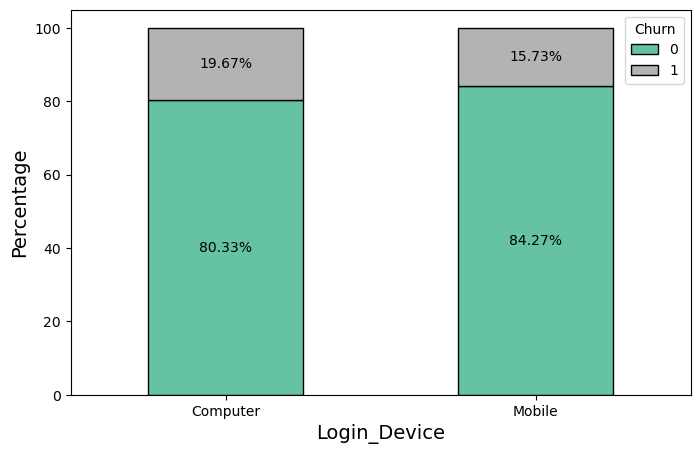

In [ ]:
ax_103 = df_103.plot(kind = 'bar', stacked = True, rot = 0, figsize = (8, 5), ec = 'black', cmap = 'Set2')

for c in ax_103.containers:
    labels = [str(round(v.get_height(), 2)) + '%' if v.get_height() > 0 else '' for v in c]
    ax_103.bar_label(c, label_type = 'center', labels = labels, size = 10)

ax_103.set_xlabel('Login_Device', fontsize = 14)
ax_103.set_ylabel('Percentage', fontsize = 14)
plt.show();

In [ ]:
df_104 = df_1.groupby(['Account_Segment'])['Churn'].value_counts(1).mul(100).round(2).unstack()
df_104

Churn                0      1
Account_Segment              
HNI              84.44  15.56
Regular          92.31   7.69
Regular Plus     72.87  27.13
Super            89.76  10.24
Super Plus       95.11   4.89

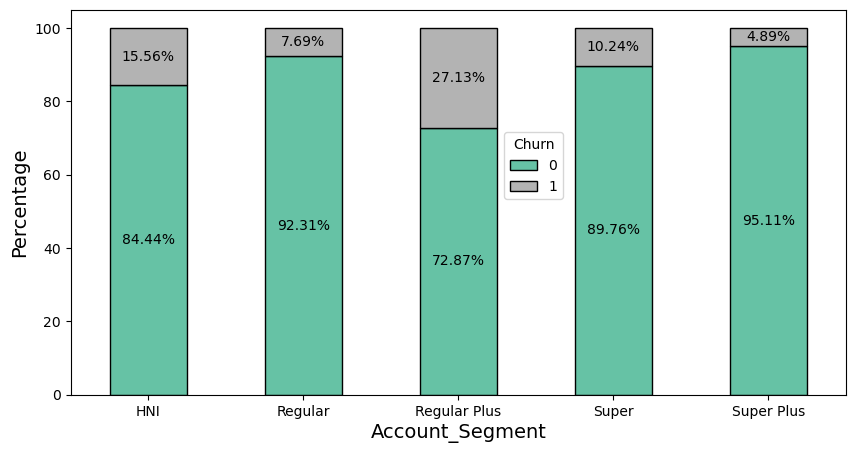

In [ ]:
ax_104 = df_104.plot(kind = 'bar', stacked = True, rot = 0, figsize = (10, 5), cmap = 'Set2', ec = 'black')

for c in ax_104.containers:
    labels = [str(round(v.get_height(), 2)) + '%' if v.get_height() > 0 else '' for v in c]
    ax_104.bar_label(c, label_type = 'center', labels = labels, size = 10)

ax_104.set_xlabel('Account_Segment', fontsize = 14)
ax_104.set_ylabel('Percentage', fontsize = 14)
ax_104.legend_.set_bbox_to_anchor([0.55, 0.7])
plt.show();

In [ ]:
df_105 = df_1.groupby(['Payment'])['Churn'].value_counts(1).mul(100).round(2).unstack()
df_105

Churn                 0      1
Payment                       
Cash on Delivery  74.95  25.05
Credit Card       85.79  14.21
Debit Card        84.58  15.42
E wallet          77.32  22.68
UPI               82.60  17.40

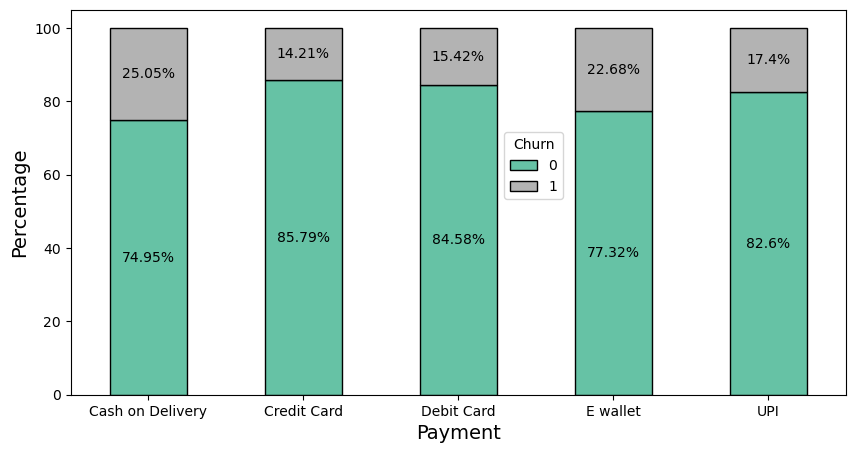

In [ ]:
ax_105 = df_105.plot(kind = 'bar', stacked = True, rot = 0, figsize = (10, 5), cmap = 'Set2', ec = 'black')

for c in ax_105.containers:
    labels = [str(round(v.get_height(), 2)) + '%' if v.get_height() > 0 else '' for v in c]
    ax_105.bar_label(c, label_type = 'center', labels = labels, size = 10)

ax_105.set_xlabel('Payment', fontsize = 14)
ax_105.set_ylabel('Percentage', fontsize = 14)
ax_105.legend_.set_bbox_to_anchor([0.55, 0.7])
plt.show();

In [ ]:
df_106 = df_1.groupby(['City_Tier'])['Churn'].value_counts(1).mul(100).round(2).unstack()
df_106

Churn          0      1
City_Tier              
1          85.45  14.55
2          80.00  20.00
3          78.65  21.35

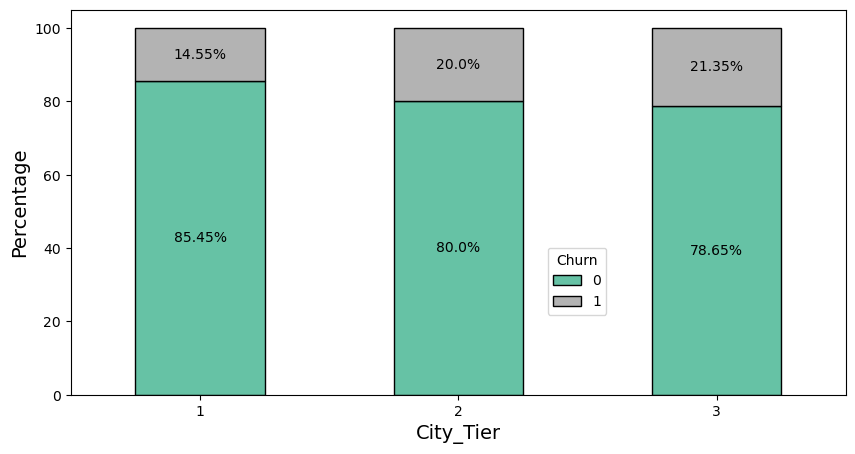

In [ ]:
ax_106 = df_106.plot(kind = 'bar', stacked = True, rot = 0, figsize = (10, 5), cmap = 'Set2', ec = 'black')

for c in ax_106.containers:
    labels = [str(round(v.get_height(), 2)) + '%' if v.get_height() > 0 else '' for v in c]
    ax_106.bar_label(c, label_type = 'center', labels = labels, size = 10)

ax_106.set_xlabel('City_Tier', fontsize = 14)
ax_106.set_ylabel('Percentage', fontsize = 14)
ax_106.legend_.set_bbox_to_anchor([0.70, 0.4])
plt.show();

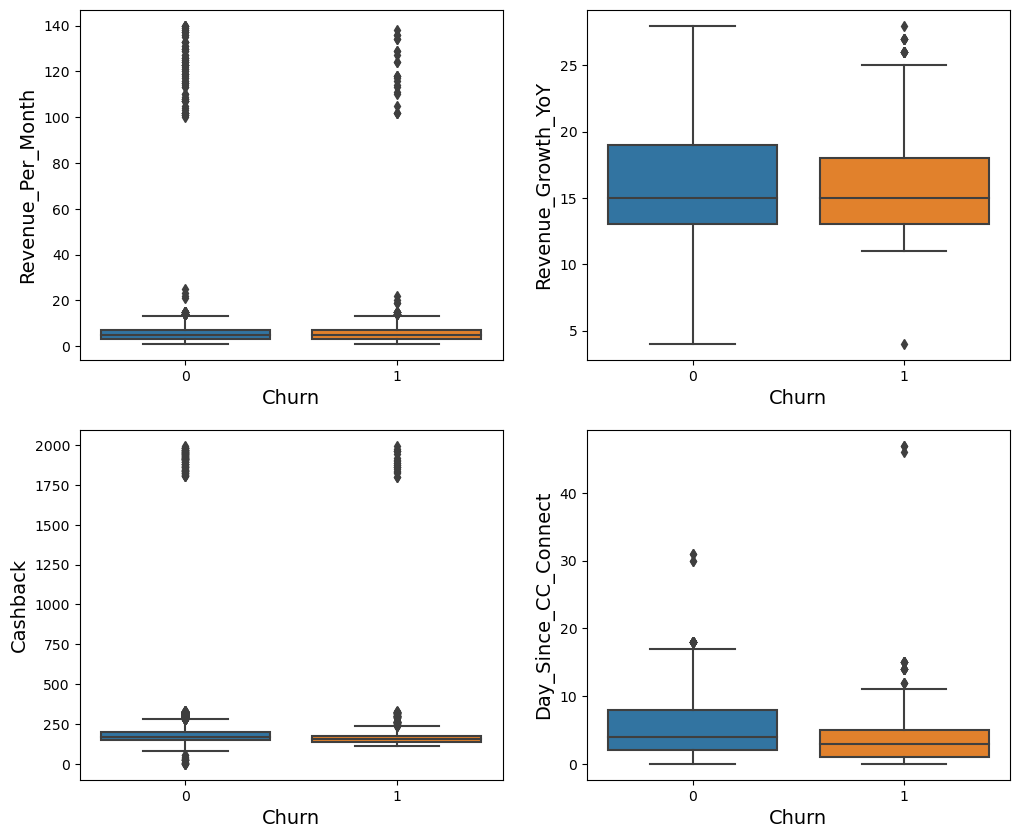

In [ ]:
plt.figure(figsize = (12, 10))
plt.subplot(2,2,1)
sns.boxplot(x = 'Churn', y = 'Rev_Per_Month', data = df_1)
plt.xlabel('Churn', fontsize = 14)
plt.ylabel('Revenue_Per_Month', fontsize = 14)

plt.subplot(2,2,2)
sns.boxplot(x = 'Churn', y = 'Rev_Growth_YoY', data = df_1)
plt.xlabel('Churn', fontsize = 14)
plt.ylabel('Revenue_Growth_YoY', fontsize = 14)

plt.subplot(2,2,3)
sns.boxplot(x = 'Churn', y = 'Cashback', data = df_1)
plt.xlabel('Churn', fontsize = 14)
plt.ylabel('Cashback', fontsize = 14)

plt.subplot(2,2,4)
sns.boxplot(x = 'Churn', y = 'Day_Since_CC_Connect', data = df_1)
plt.xlabel('Churn', fontsize = 14)
plt.ylabel('Day_Since_CC_Connect', fontsize = 14)
plt.show();

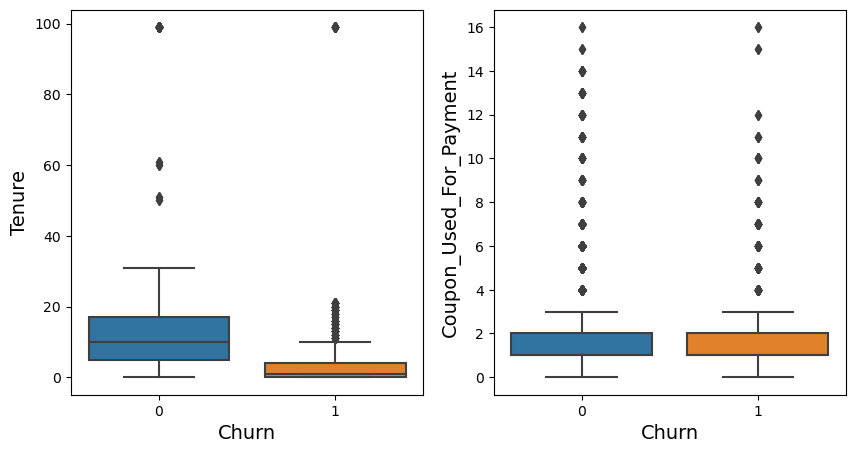

In [ ]:
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
sns.boxplot(x = 'Churn', y = 'Tenure', data = df_1)
plt.xlabel('Churn', fontsize = 14)
plt.ylabel('Tenure', fontsize = 14)

plt.subplot(1,2,2)
sns.boxplot(x = 'Churn', y = 'Coupon_Used_For_Payment', data = df_1)
plt.xlabel('Churn', fontsize = 14)
plt.ylabel('Coupon_Used_For_Payment', fontsize = 14)
plt.show();

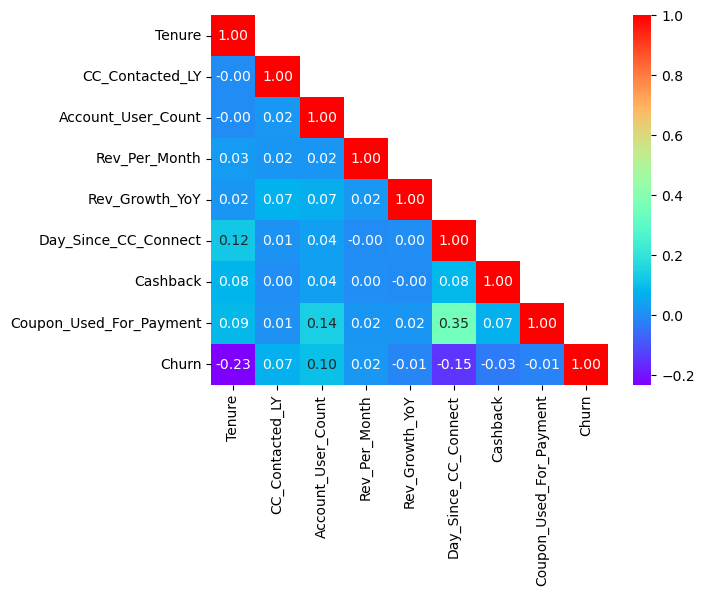

In [ ]:
sns.heatmap(df_1[num].corr(), annot = True, fmt = '.2f', cmap = 'rainbow', mask = np.triu(df_1[num].corr(), +1))
plt.show();

# Multivariate Analysis

In [ ]:
num = ['Tenure', 'CC_Contacted_LY', 'Account_User_Count', 'Rev_Per_Month', 'Rev_Growth_YoY', 'Day_Since_CC_Connect', 'Cashback', 'Coupon_Used_For_Payment', 'Churn']

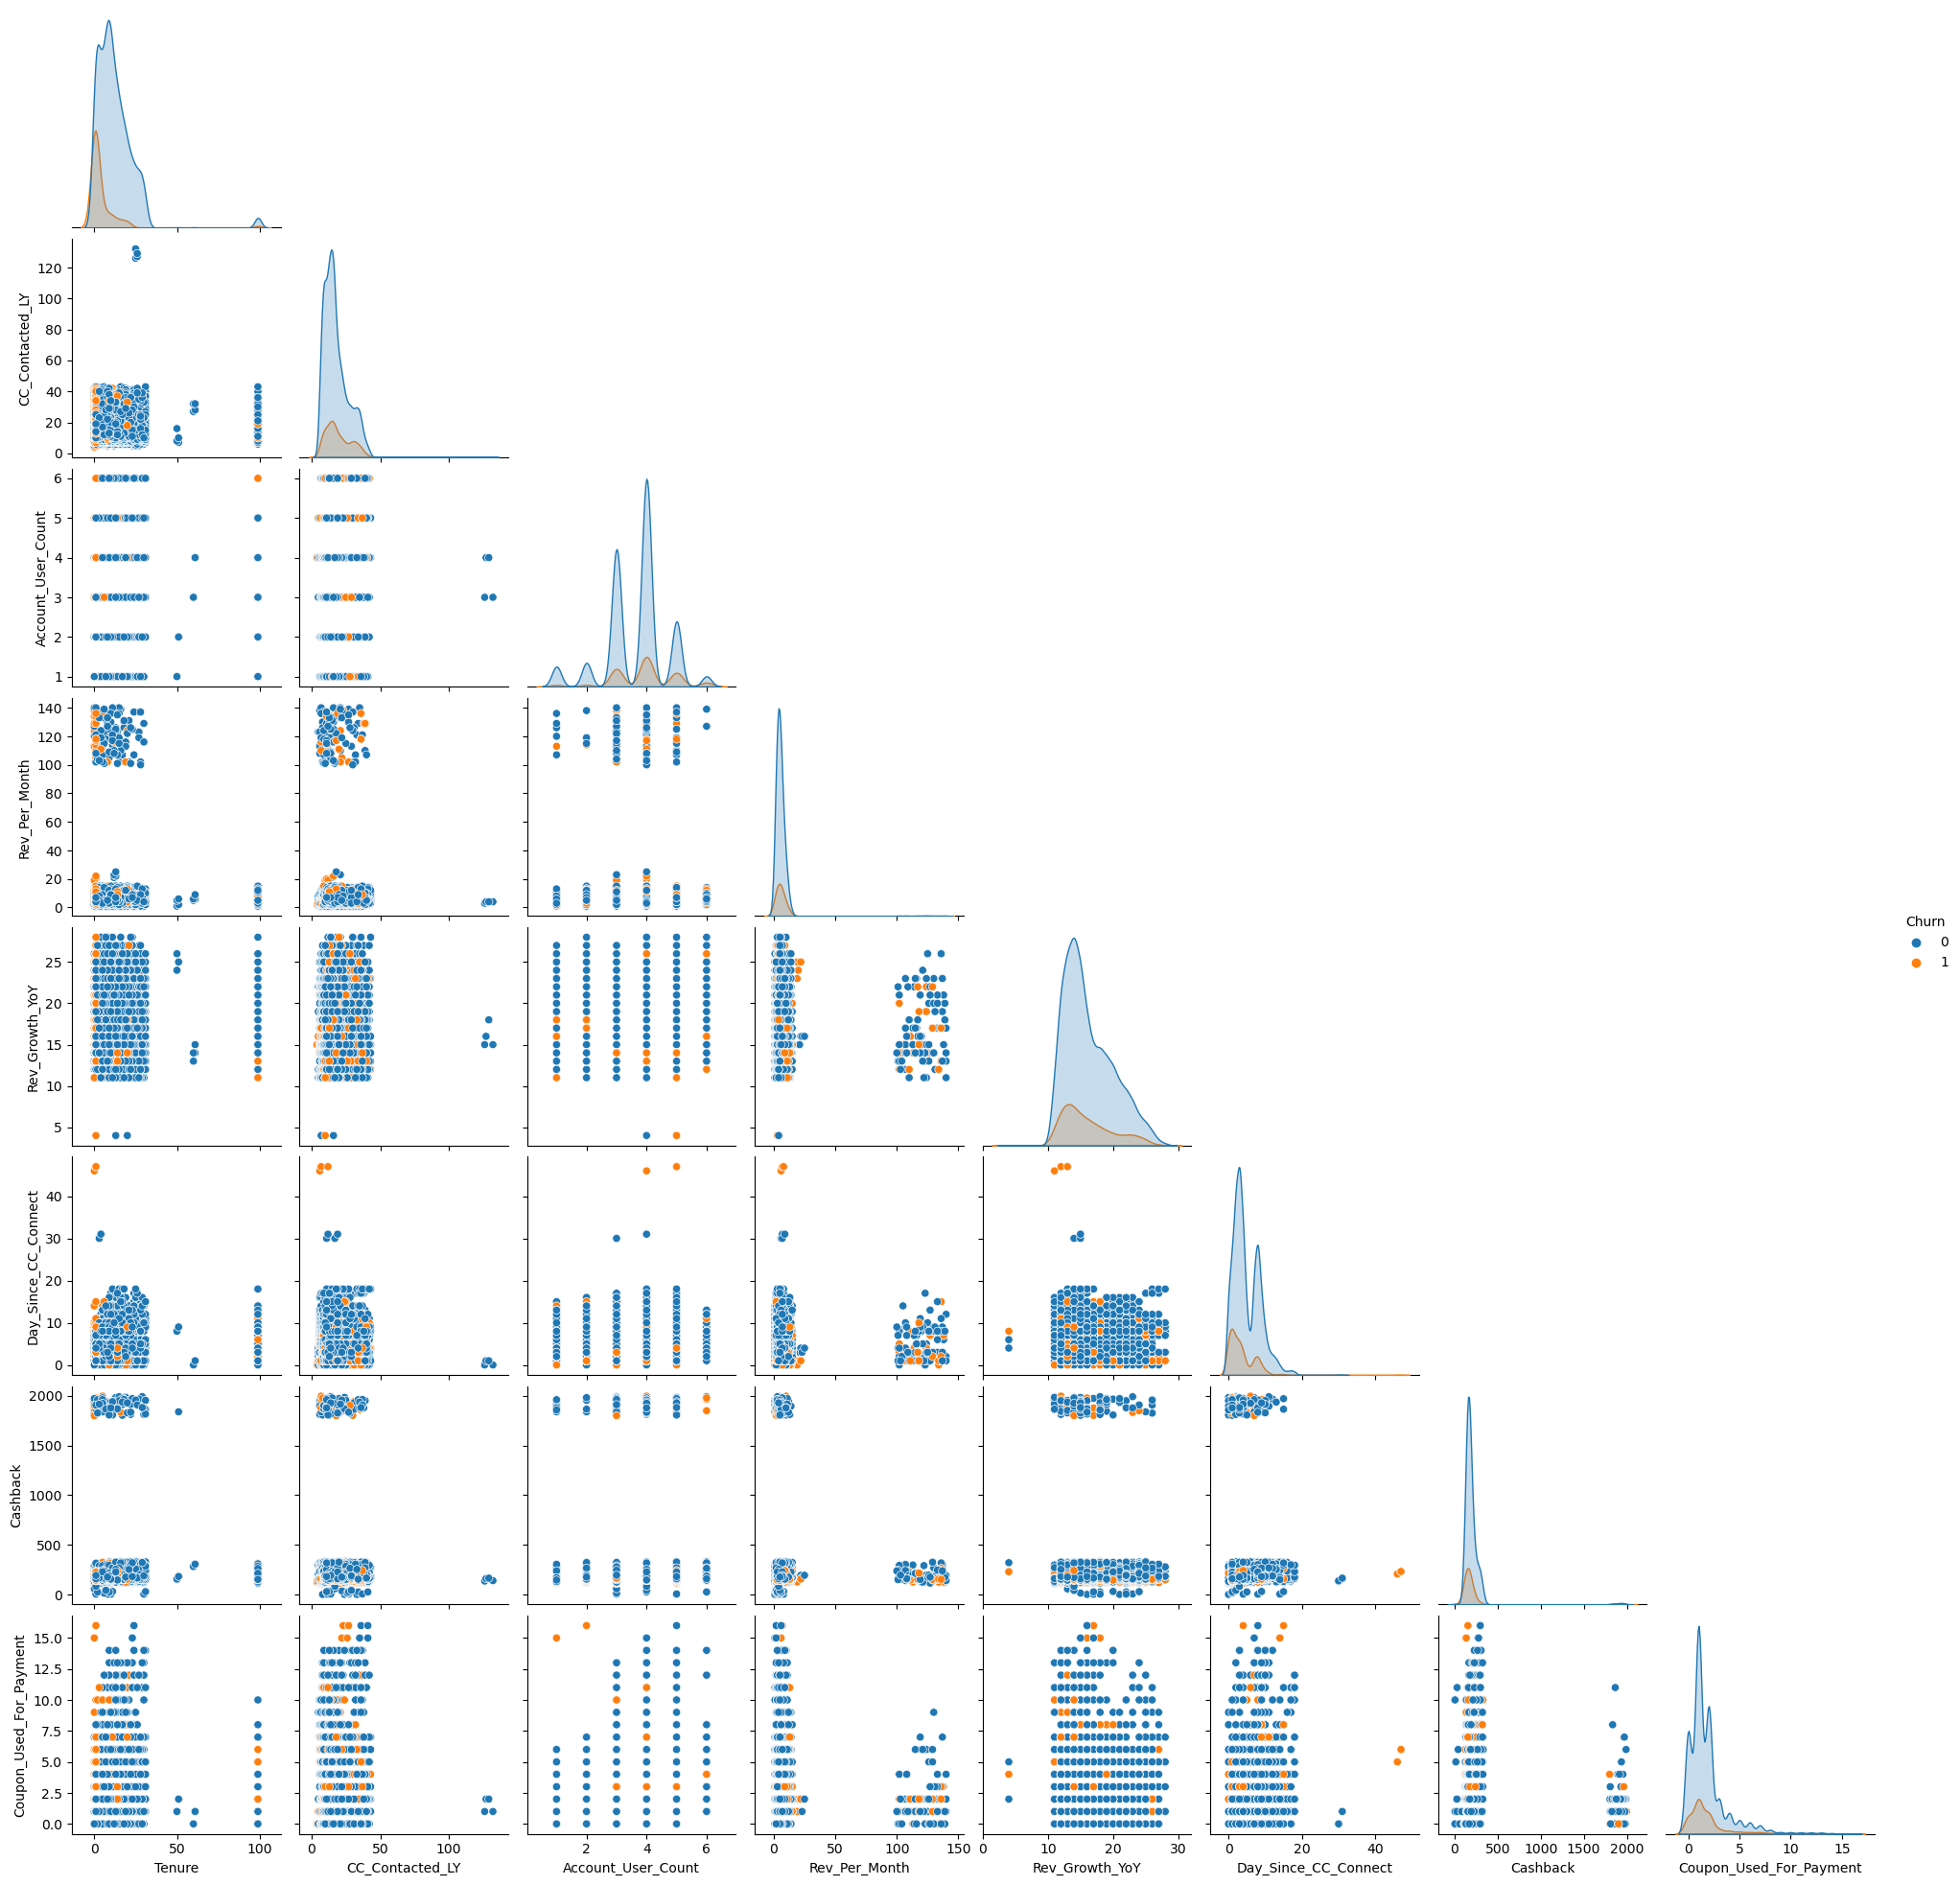

In [ ]:
sns.pairplot(data = df_1[num], diag_kind = 'kde', corner = True, hue = 'Churn')
plt.show();

In [ ]:
num_1 = ['Tenure', 'Rev_Per_Month', 'Rev_Growth_YoY',  'Cashback', 'Coupon_Used_For_Payment', 'Churn']

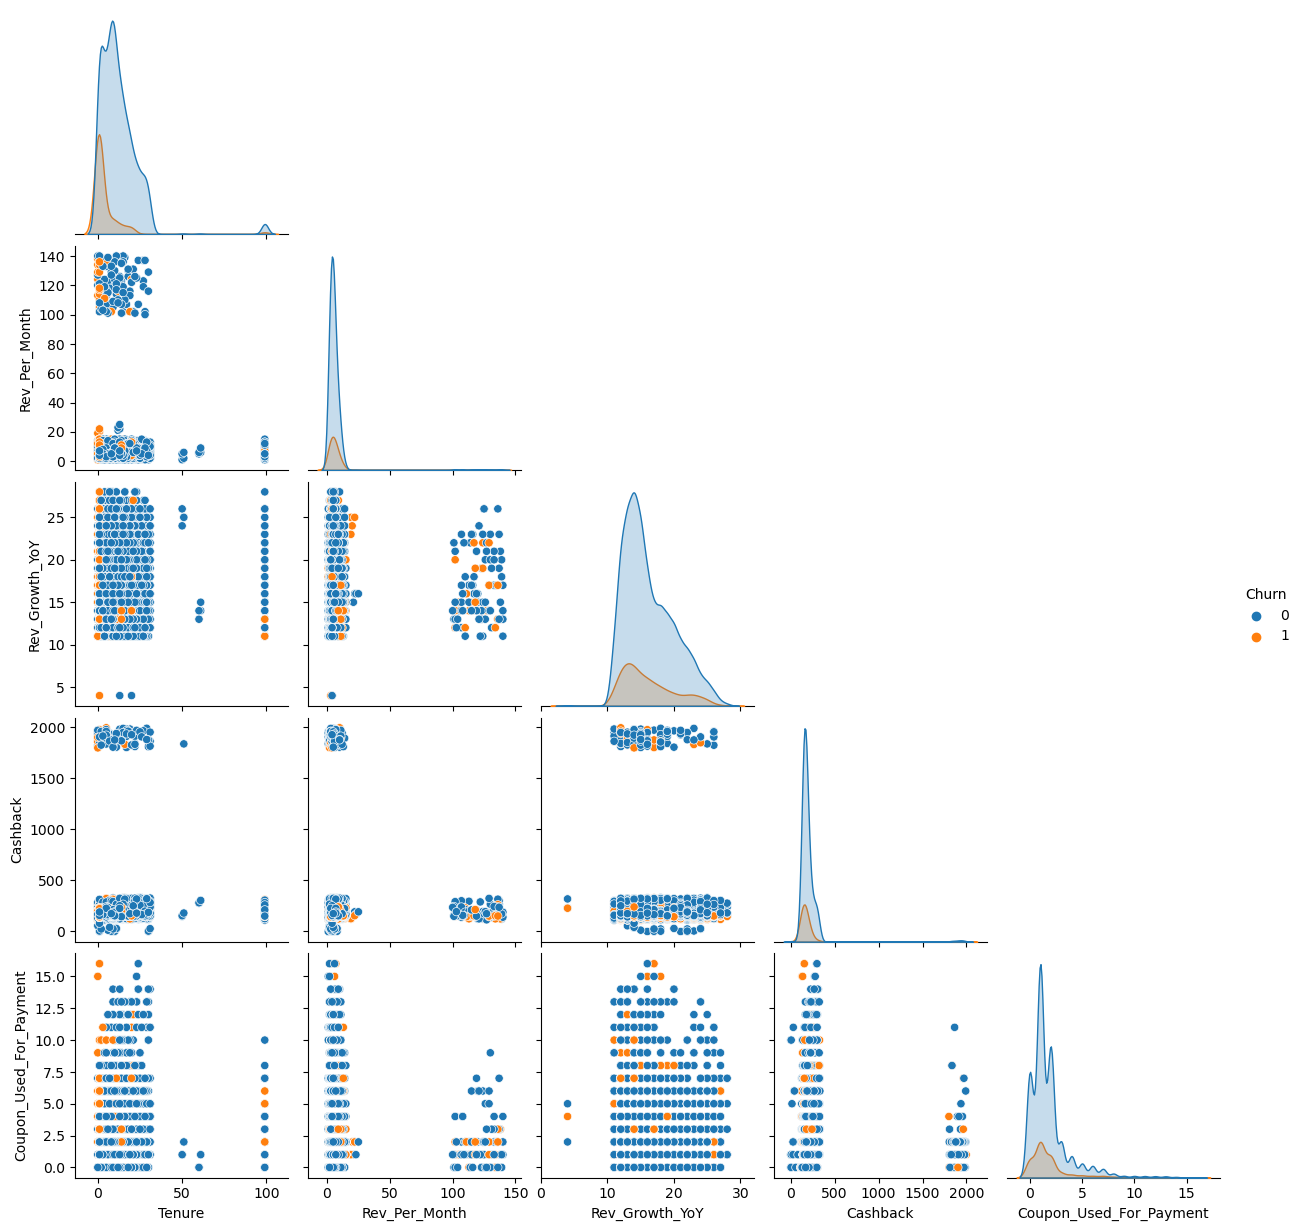

In [ ]:
sns.pairplot(data = df_1[num_1], corner = True, diag_kind = 'kde', hue = 'Churn')
plt.show();

# Outlier check

In [ ]:
num_2 = ['Tenure', 'CC_Contacted_LY', 'Account_User_Count', 'Rev_Per_Month', 'Rev_Growth_YoY', 'Day_Since_CC_Connect', 'Cashback', 'Coupon_Used_For_Payment']

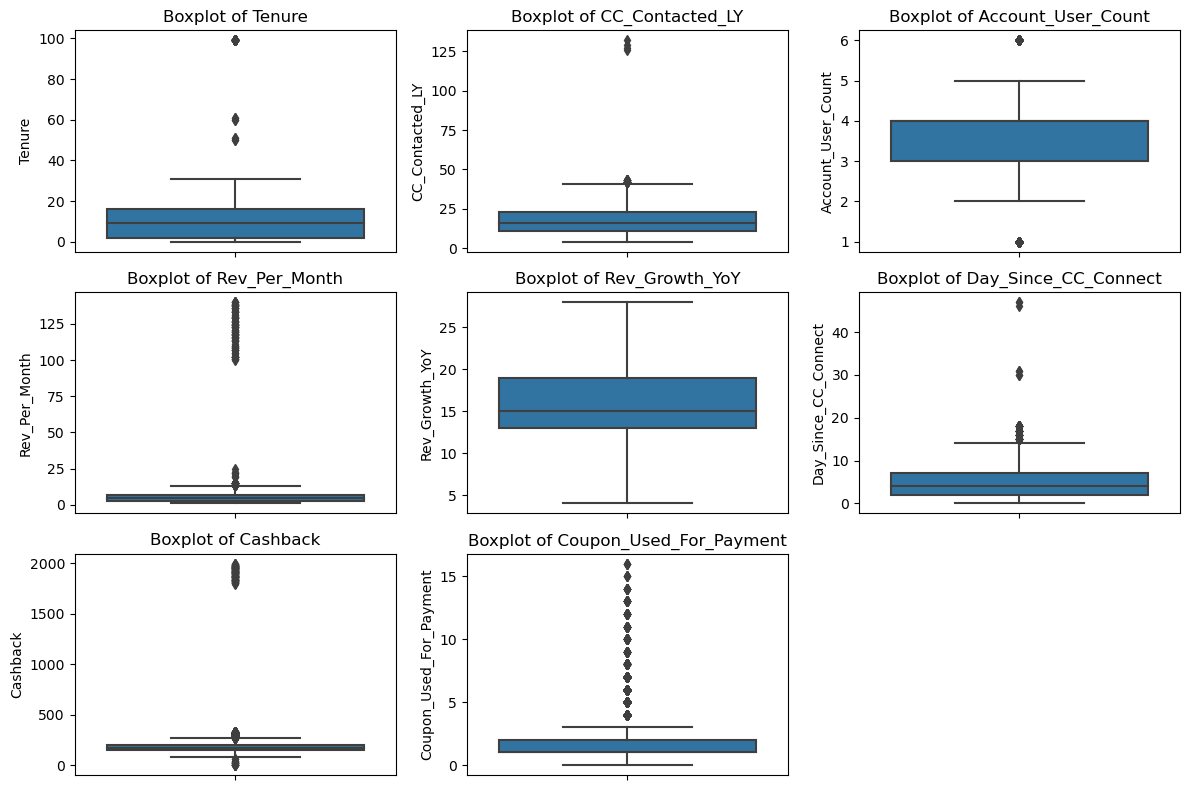

In [ ]:
plt.figure(figsize = (12,8))
feature_list = df_1[num_2].columns

for i in range(len(feature_list)):
    plt.subplot(3,3,i+1)
    sns.boxplot(y = df_1[feature_list[i]], data = df_1[num_2])
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [ ]:
# Removing Rev_Growth_YoY as it has no outliers
num_3 = ['Tenure', 'CC_Contacted_LY', 'Account_User_Count', 'Rev_Per_Month', 'Day_Since_CC_Connect', 'Cashback', 'Coupon_Used_For_Payment']

In [ ]:
df_1['Cashback'].describe()

count    11260.000000
mean       194.934722
std        174.977865
min          0.000000
25%        147.890000
50%        165.250000
75%        197.310000
max       1997.000000
Name: Cashback, dtype: float64

In [ ]:
df_1[df_1['Cashback'] == 1997]

Churn  Tenure  City_Tier  CC_Contacted_LY     Payment Gender  \
4160      1     5.0          3                7  Debit Card   Male   

      Service_Score  Account_User_Count Account_Segment  CC_Agent_Score  \
4160              4                   4           Super               1   

     Marital_Status  Rev_Per_Month  Complain_LY  Rev_Growth_YoY  \
4160         Single           10.0            1            12.0   

      Coupon_Used_For_Payment  Day_Since_CC_Connect  Cashback Login_Device  
4160                        1                     6    1997.0       Mobile

In [ ]:
# Check outliers at 25-75 level
Q1 = df_1[num_3].quantile(0.25)
Q3 = df_1[num_3].quantile(0.75)

IQR = Q3 - Q1

UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [ ]:
((df_1[num_3] > UL) | (df_1[num_3] < LL)).sum()

Tenure                      139
CC_Contacted_LY              42
Account_User_Count          761
Rev_Per_Month               185
Day_Since_CC_Connect        130
Cashback                    986
Coupon_Used_For_Payment    1380
dtype: int64

In [ ]:
((df_1[num_3] > UL) | (df_1[num_3] < LL)).sum().sum()

3623

In [ ]:
df_1[num_2].size

90080

In [ ]:
3623 / 90080

0.04021980461811723

In [ ]:
# Check outliers at 5-95 level
Q5 = df_1[num_3].quantile(0.05)
Q95 = df_1[num_3].quantile(0.95)

IQR = Q95 - Q5

UL_95 = Q95 + 1.5*IQR
LL_5 = Q5 - 1.5*IQR

In [ ]:
((df_1[num_3] > UL_95) | (df_1[num_3] < LL_5)).sum()

Tenure                     131
CC_Contacted_LY              4
Account_User_Count           0
Rev_Per_Month              106
Day_Since_CC_Connect         7
Cashback                   108
Coupon_Used_For_Payment      4
dtype: int64

In [ ]:
((df_1[num_3] > UL_95) | (df_1[num_3] < LL_5)).sum().sum()

360

In [ ]:
360 / 90080

0.003996447602131439

In [ ]:
df_1[num_3].describe().T

count        mean         std  min     25%     50%  \
Tenure                   11260.0   10.985879   12.757534  0.0    2.00    9.00   
CC_Contacted_LY          11260.0   17.850178    8.814851  4.0   11.00   16.00   
Account_User_Count       11260.0    3.704973    1.004383  1.0    3.00    4.00   
Rev_Per_Month            11260.0    6.266874   11.488990  1.0    3.00    5.00   
Day_Since_CC_Connect     11260.0    4.613055    3.640071  0.0    2.00    4.00   
Cashback                 11260.0  194.934722  174.977865  0.0  147.89  165.25   
Coupon_Used_For_Payment  11260.0    1.790409    1.969331  0.0    1.00    1.00   

                            75%     max  
Tenure                    16.00    99.0  
CC_Contacted_LY           23.00   132.0  
Account_User_Count         4.00     6.0  
Rev_Per_Month              7.00   140.0  
Day_Since_CC_Connect       7.00    47.0  
Cashback                 197.31  1997.0  
Coupon_Used_For_Payment    2.00    16.0

**Log transformation**

In [ ]:
import scipy.stats as stat
import pylab

In [ ]:
def plot_data(df, feature):
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    sns.histplot(df[feature])
    plt.subplot(1,2,2)
    stat.probplot(df[feature], dist = 'norm', plot = pylab)
    plt.show()

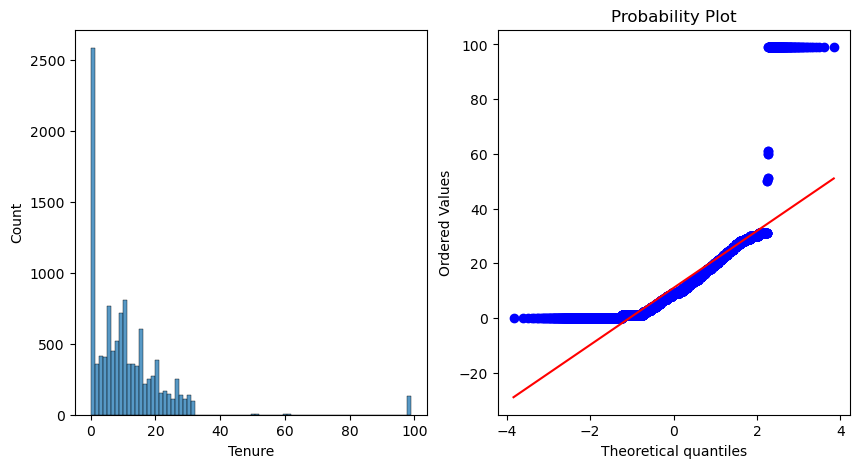

In [ ]:
#Tenure
plot_data(df_1, 'Tenure')

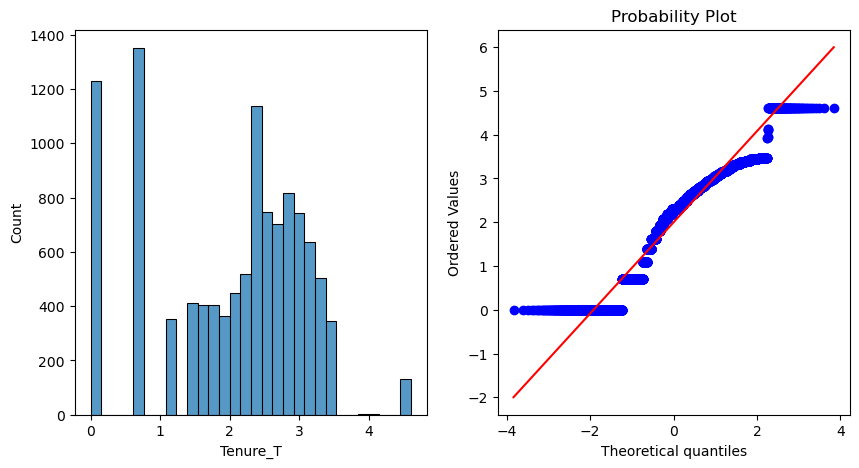

In [ ]:
#Transforming Tenure
df_1['Tenure_T'] = np.log(df_1['Tenure'] + 1)
plot_data(df_1, 'Tenure_T')

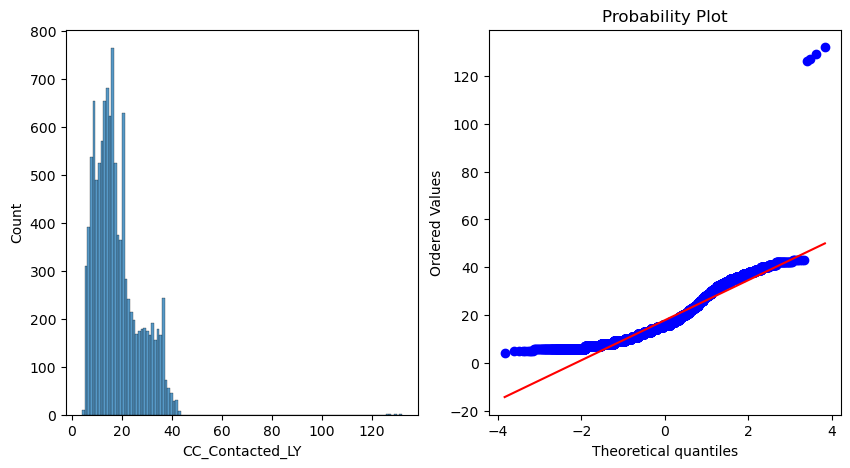

In [ ]:
#CC_Contacted_LY
plot_data(df_1, 'CC_Contacted_LY')

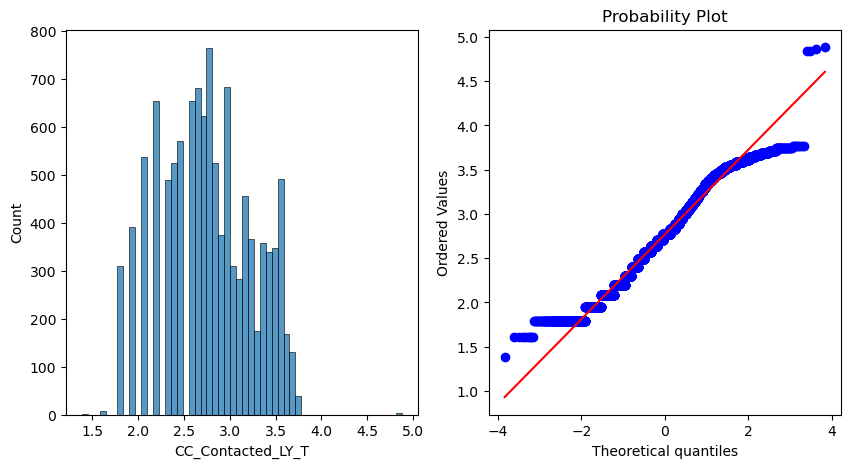

In [ ]:
#Transforming CC_Contacted_LY
df_1['CC_Contacted_LY_T'] = np.log(df_1['CC_Contacted_LY'])
plot_data(df_1, 'CC_Contacted_LY_T')

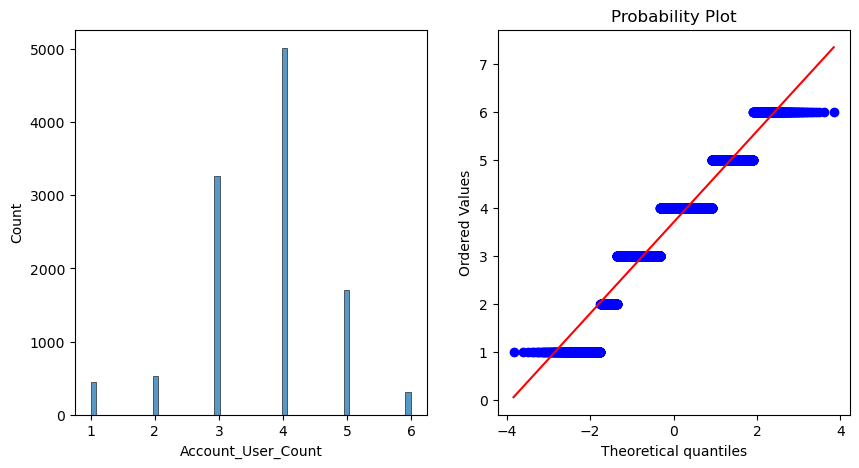

In [ ]:
#Account_User_Count
plot_data(df_1, 'Account_User_Count')

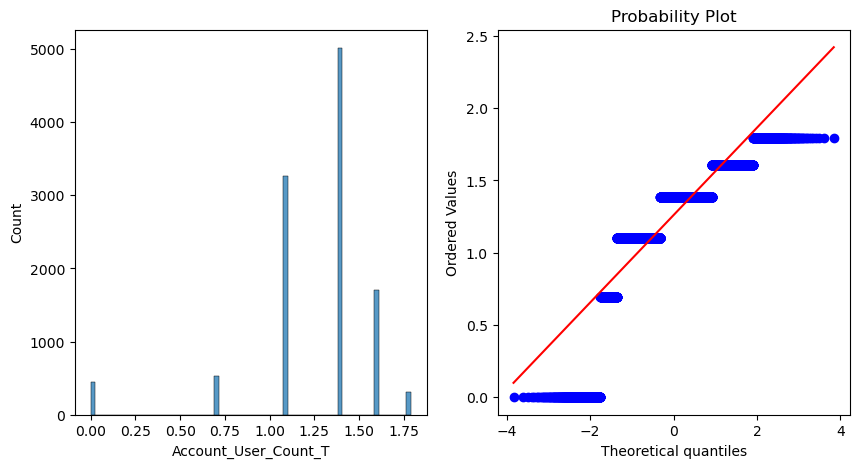

In [ ]:
#Transforming Account_User_Count
df_1['Account_User_Count_T'] = np.log(df_1['Account_User_Count'])
plot_data(df_1, 'Account_User_Count_T')

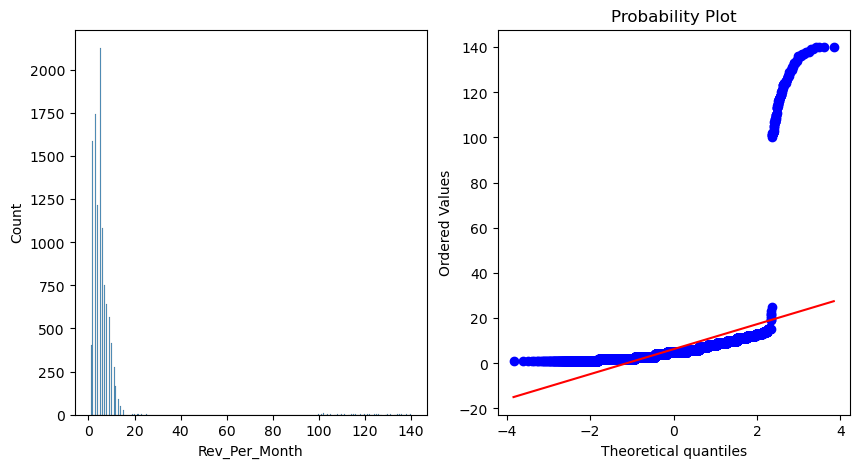

In [ ]:
#Rev_Per_Month
plot_data(df_1, 'Rev_Per_Month')

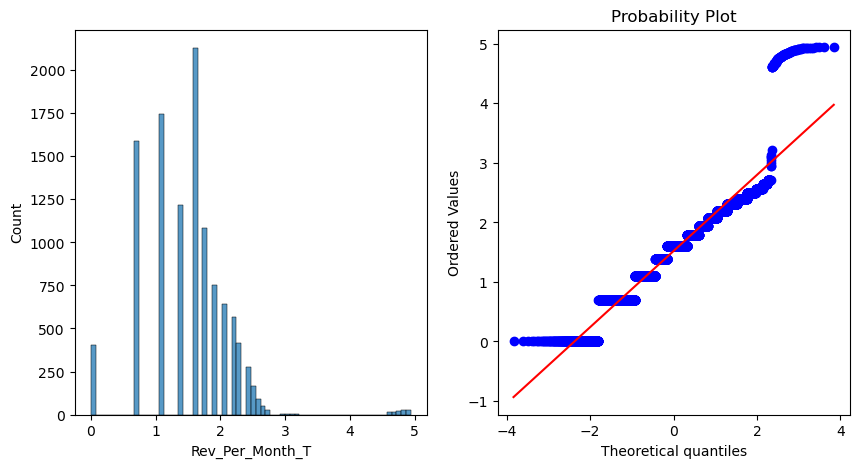

In [ ]:
#Transforming Rev_Per_Month
df_1['Rev_Per_Month_T'] = np.log(df_1['Rev_Per_Month'])
plot_data(df_1, 'Rev_Per_Month_T')

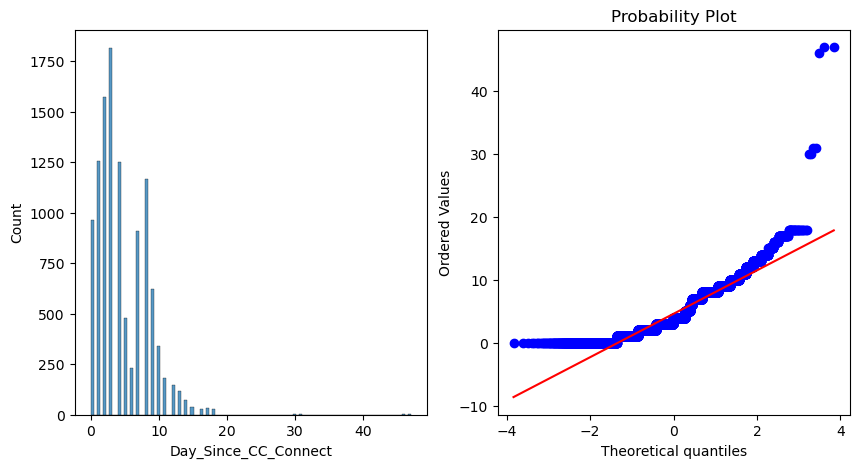

In [ ]:
#Day_Since_CC_Connect
plot_data(df_1, 'Day_Since_CC_Connect')

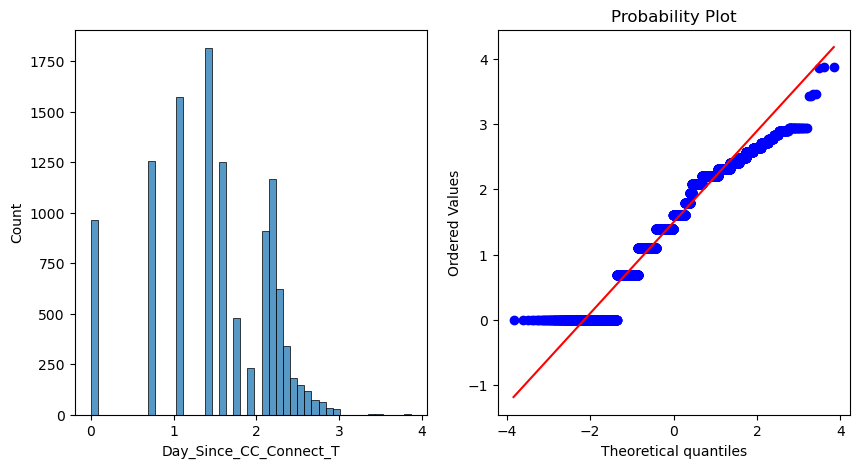

In [ ]:
#Transforming Day_Since_CC_Connect
df_1['Day_Since_CC_Connect_T'] = np.log(df_1['Day_Since_CC_Connect'] + 1)
plot_data(df_1, 'Day_Since_CC_Connect_T')

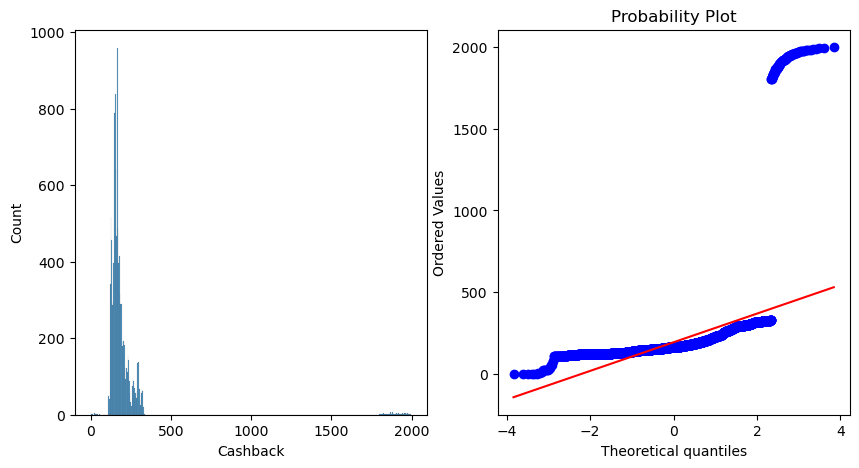

In [ ]:
#Cashback
plot_data(df_1, 'Cashback')

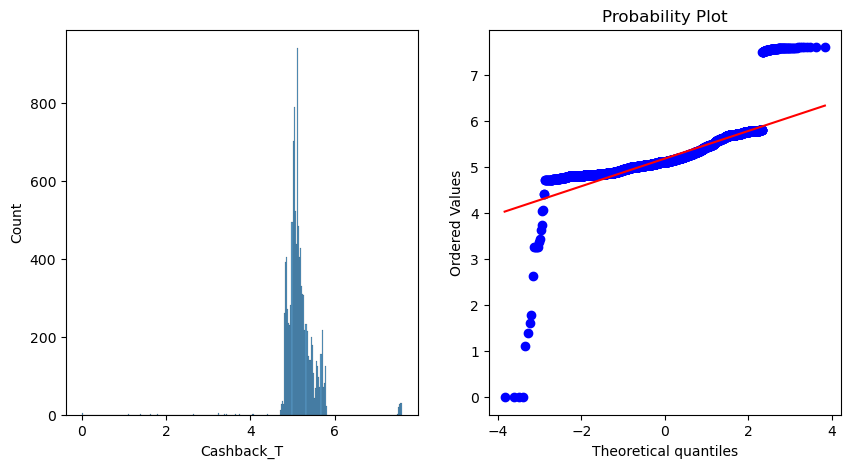

In [ ]:
#Transforming Cashback
df_1['Cashback_T'] = np.log(df_1['Cashback'] +1)
plot_data(df_1,'Cashback_T')

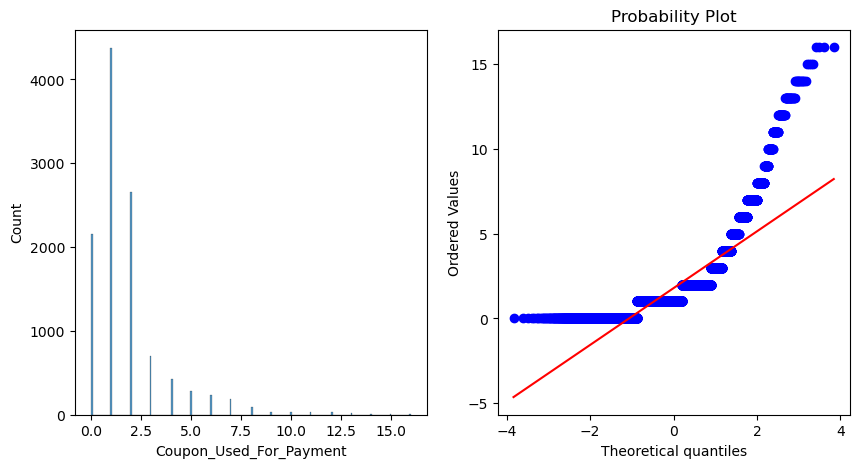

In [ ]:
#Coupon_Used_For_Payment
plot_data(df_1, 'Coupon_Used_For_Payment')

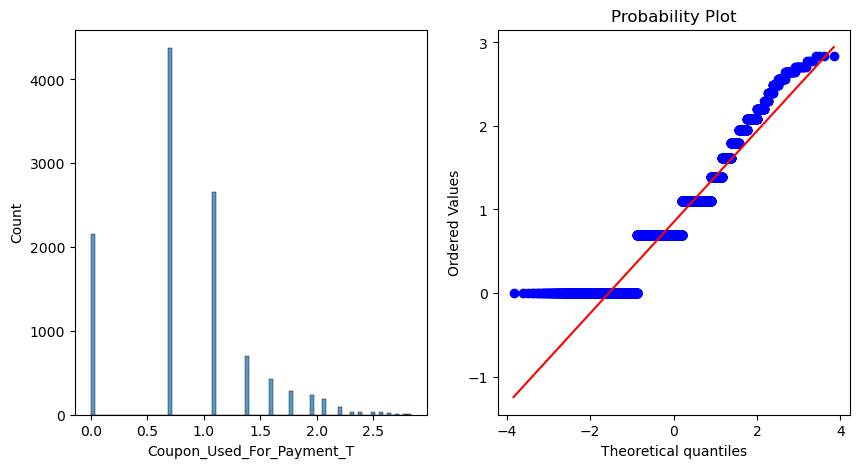

In [ ]:
#Transforming Coupon_Used_For_Payment
df_1['Coupon_Used_For_Payment_T'] = np.log(df_1['Coupon_Used_For_Payment'] +1)
plot_data(df_1, 'Coupon_Used_For_Payment_T')

In [ ]:
df_1.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_User_Count', 'Account_Segment',
       'CC_Agent_Score', 'Marital_Status', 'Rev_Per_Month', 'Complain_LY',
       'Rev_Growth_YoY', 'Coupon_Used_For_Payment', 'Day_Since_CC_Connect',
       'Cashback', 'Login_Device', 'Tenure_T', 'CC_Contacted_LY_T',
       'Account_User_Count_T', 'Rev_Per_Month_T', 'Day_Since_CC_Connect_T',
       'Cashback_T', 'Coupon_Used_For_Payment_T'],
      dtype='object')

In [ ]:
num_T = ['Tenure_T', 'CC_Contacted_LY_T', 'Account_User_Count_T', 'Rev_Per_Month_T', 'Day_Since_CC_Connect_T', 'Cashback_T', 'Coupon_Used_For_Payment_T']

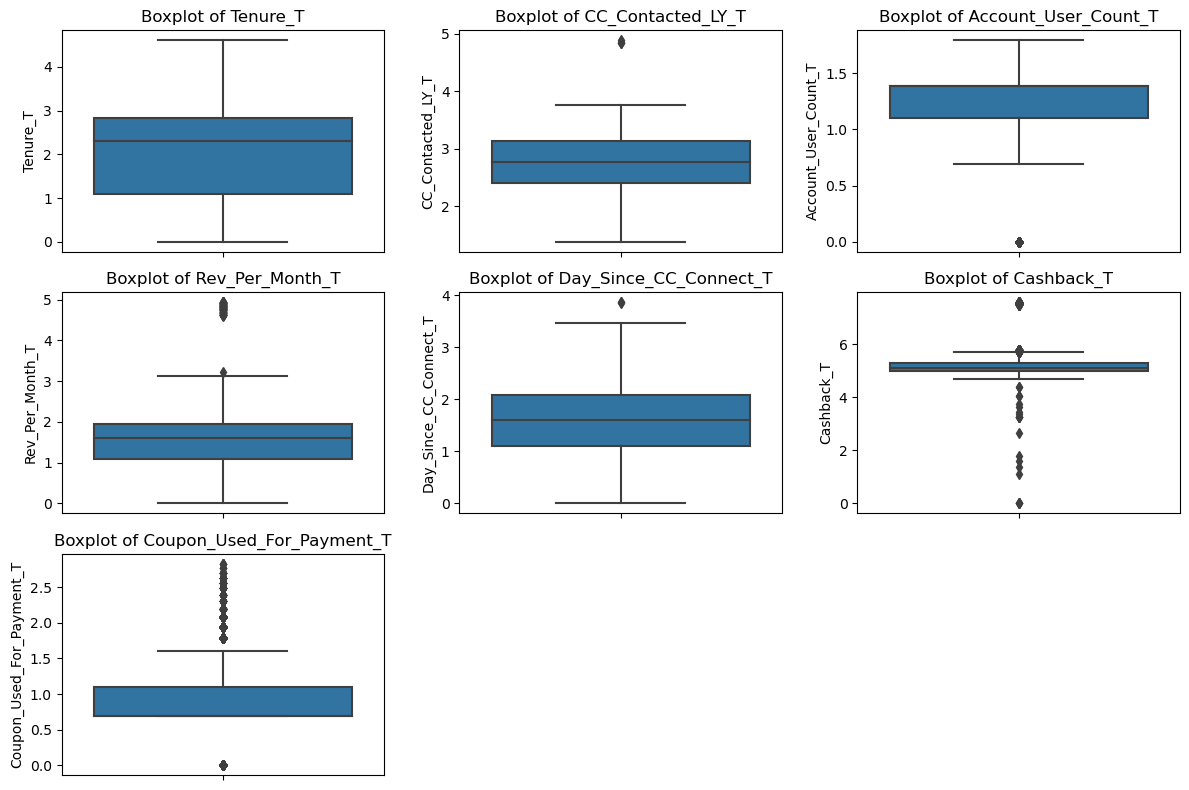

In [ ]:
#Checking outliers after log transformation
plt.figure(figsize = (12,8))
feature_list = df_1[num_T].columns

for i in range(len(feature_list)):
    plt.subplot(3,3,i+1)
    sns.boxplot(y = df_1[feature_list[i]], data = df_1[num_T])
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [ ]:
df_1['Cashback_T'].describe()

count    11260.000000
mean         5.178181
std          0.360158
min          0.000000
25%          5.003208
50%          5.113493
75%          5.289831
max          7.599902
Name: Cashback_T, dtype: float64

In [ ]:
df_1['CC_Contacted_LY_T'].describe()

count    11260.000000
mean         2.766798
std          0.482588
min          1.386294
25%          2.397895
50%          2.772589
75%          3.135494
max          4.882802
Name: CC_Contacted_LY_T, dtype: float64

In [ ]:
q1 = df_1[num_T].quantile(0.25)
q3 = df_1[num_T].quantile(0.75)

IQR = q3-q1

upper_limit = q3 + (1.5*IQR)
lower_limit = q1 - (1.5*IQR)

In [ ]:
((df_1[num_T] > upper_limit) | (df_1[num_T] < lower_limit)).sum()

Tenure_T                        0
CC_Contacted_LY_T               4
Account_User_Count_T          446
Rev_Per_Month_T               106
Day_Since_CC_Connect_T          3
Cashback_T                    404
Coupon_Used_For_Payment_T    3106
dtype: int64

**Outliers for Coupon_Used_For_Payment_S has increased. Log transformation has not worked in this case.**

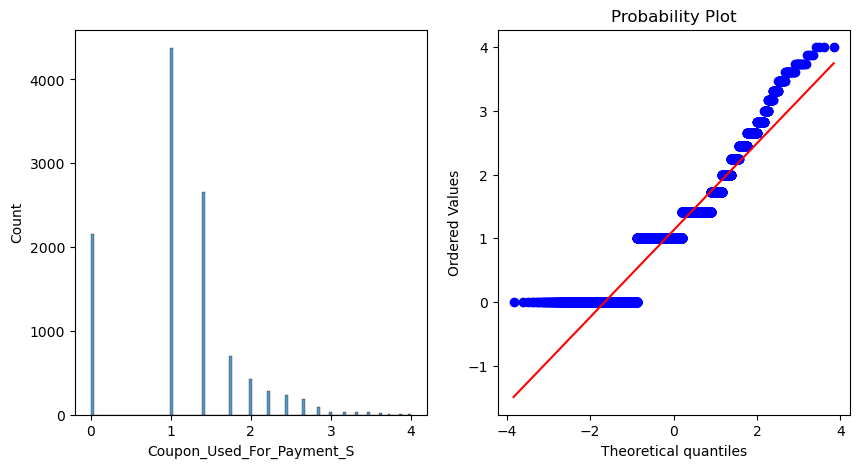

In [ ]:
#Checking square root transformation for Coupon_Used_For_Payment
df_1['Coupon_Used_For_Payment_S'] = df_1['Coupon_Used_For_Payment'].apply(np.sqrt)
plot_data(df_1, 'Coupon_Used_For_Payment_S')

In [ ]:
df_1['Coupon_Used_For_Payment_S'].describe()

count    11260.000000
mean         1.126808
std          0.721635
min          0.000000
25%          1.000000
50%          1.000000
75%          1.414214
max          4.000000
Name: Coupon_Used_For_Payment_S, dtype: float64

In [ ]:
df_1.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_User_Count', 'Account_Segment',
       'CC_Agent_Score', 'Marital_Status', 'Rev_Per_Month', 'Complain_LY',
       'Rev_Growth_YoY', 'Coupon_Used_For_Payment', 'Day_Since_CC_Connect',
       'Cashback', 'Login_Device', 'Tenure_T', 'CC_Contacted_LY_T',
       'Account_User_Count_T', 'Rev_Per_Month_T', 'Day_Since_CC_Connect_T',
       'Cashback_T', 'Coupon_Used_For_Payment_T', 'Coupon_Used_For_Payment_S'],
      dtype='object')

In [ ]:
df_2 = df_1.drop(['Tenure', 'CC_Contacted_LY',
                  'Account_User_Count', 'Rev_Per_Month',
                  'Day_Since_CC_Connect', 'Cashback',
                  'Coupon_Used_For_Payment_T', 'Coupon_Used_For_Payment_S'], axis = 1)

In [ ]:
df_2.columns

Index(['Churn', 'City_Tier', 'Payment', 'Gender', 'Service_Score',
       'Account_Segment', 'CC_Agent_Score', 'Marital_Status', 'Complain_LY',
       'Rev_Growth_YoY', 'Coupon_Used_For_Payment', 'Login_Device', 'Tenure_T',
       'CC_Contacted_LY_T', 'Account_User_Count_T', 'Rev_Per_Month_T',
       'Day_Since_CC_Connect_T', 'Cashback_T'],
      dtype='object')

In [ ]:
num_cols = ['Tenure_T', 'CC_Contacted_LY_T', 'Account_User_Count_T', 'Rev_Per_Month_T', 'Day_Since_CC_Connect_T', 'Cashback_T', 'Coupon_Used_For_Payment']

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for column in df_2[num_cols].columns:
    lr,ur=remove_outlier(df_2[column])
    df_2[column] = np.where(df_2[column] > ur, ur, df_2[column])
    df_2[column] = np.where(df_2[column] < lr, lr, df_2[column])

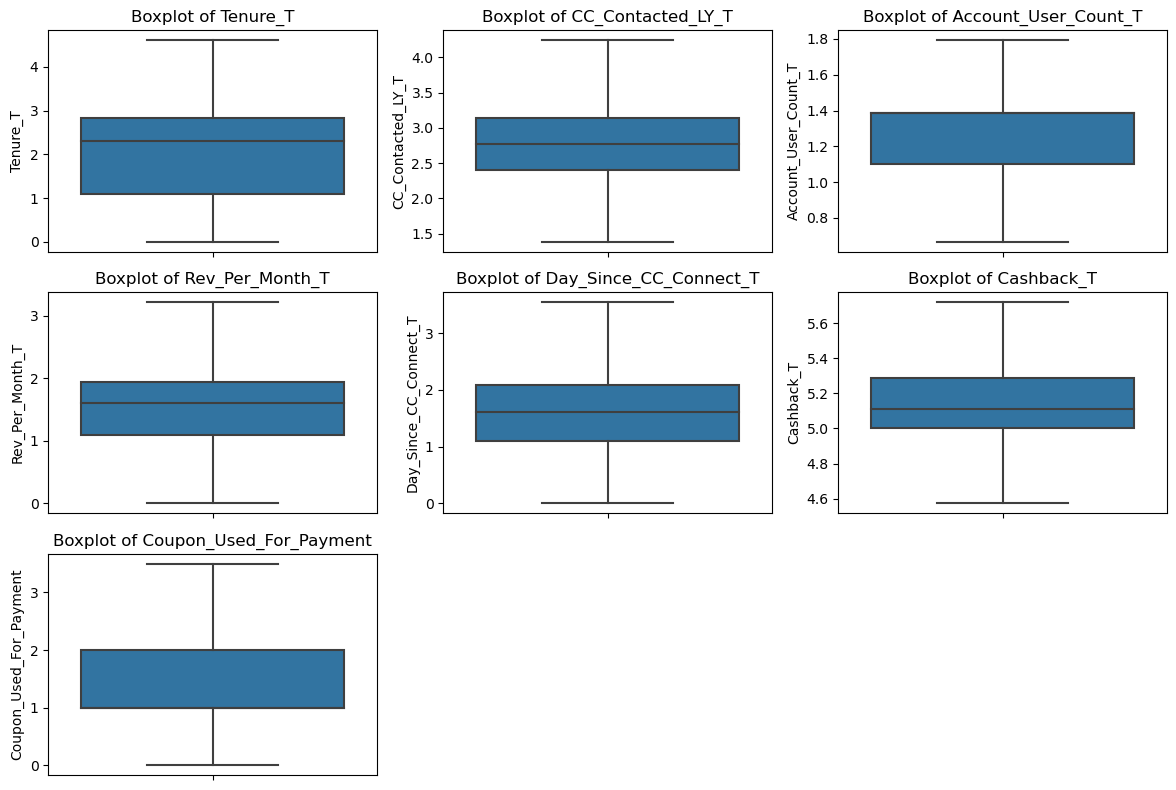

In [ ]:
plt.figure(figsize = (12, 8))
feature_list = df_2[num_cols].columns

for i in range(len(feature_list)):
    plt.subplot(3,3,i+1)
    sns.boxplot(y = df_2[feature_list[i]], data = df_2[num_cols])
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

# Encoding categorical variables

In [ ]:
df_2['Payment'].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet'],
      dtype=object)

In [ ]:
#Encoding Payment
df_2['Payment'] = np.where(df_2['Payment'] == 'Debit Card', 0, df_2['Payment'])
df_2['Payment'] = np.where(df_2['Payment'] == 'UPI', 1, df_2['Payment'])
df_2['Payment'] = np.where(df_2['Payment'] == 'Credit Card', 2, df_2['Payment'])
df_2['Payment'] = np.where(df_2['Payment'] == 'Cash on Delivery', 3, df_2['Payment'])
df_2['Payment'] = np.where(df_2['Payment'] == 'E wallet', 4, df_2['Payment'])

In [ ]:
#Encoding Gender
df_2['Gender'] = np.where(df_2['Gender'] == 'Male', 0, df_2['Gender'])
df_2['Gender'] = np.where(df_2['Gender'] == 'Female', 1, df_2['Gender'])

In [ ]:
df_2['Account_Segment'].unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', 'Super Plus'],
      dtype=object)

In [ ]:
#Encoding Account_Segment
df_2['Account_Segment'] = np.where(df_2['Account_Segment'] == 'Regular', 0, df_2['Account_Segment'])
df_2['Account_Segment'] = np.where(df_2['Account_Segment'] == 'Regular Plus', 1, df_2['Account_Segment'])
df_2['Account_Segment'] = np.where(df_2['Account_Segment'] == 'Super', 2, df_2['Account_Segment'])
df_2['Account_Segment'] = np.where(df_2['Account_Segment'] == 'Super Plus', 3, df_2['Account_Segment'])
df_2['Account_Segment'] = np.where(df_2['Account_Segment'] == 'HNI', 4, df_2['Account_Segment'])

In [ ]:
df_2['Marital_Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [ ]:
#Encoding Marital_Status
df_2['Marital_Status'] = np.where(df_2['Marital_Status'] == 'Single', 0, df_2['Marital_Status'])
df_2['Marital_Status'] = np.where(df_2['Marital_Status'] == 'Married', 1, df_2['Marital_Status'])
df_2['Marital_Status'] = np.where(df_2['Marital_Status'] == 'Divorced', 2, df_2['Marital_Status'])

In [ ]:
df_2['Login_Device'].unique()

array(['Mobile', 'Computer'], dtype=object)

In [ ]:
#Encoding Login_Device
df_2['Login_Device'] = np.where(df_2['Login_Device'] == 'Mobile', 0, df_2['Login_Device'])
df_2['Login_Device'] = np.where(df_2['Login_Device'] == 'Computer', 1, df_2['Login_Device'])

In [ ]:
df_2.head()

Churn  City_Tier Payment Gender  Service_Score Account_Segment  \
0      1          3       0      1              3               2   
1      1          1       1      0              3               1   
2      1          1       0      0              2               1   
3      1          3       0      0              2               2   
4      1          1       2      0              2               1   

   CC_Agent_Score Marital_Status  Complain_LY  Rev_Growth_YoY  \
0               2              0            1            11.0   
1               3              0            1            15.0   
2               3              0            1            14.0   
3               5              0            0            23.0   
4               5              0            0            11.0   

   Coupon_Used_For_Payment Login_Device  Tenure_T  CC_Contacted_LY_T  \
0                      1.0            0  1.609438           1.791759   
1                      0.0            0  0.000000           2.079442   
2                      0.0            0  0.000000           3.401197   
3                      0.0            0  0.000000           2.708050   
4                      1.0            0  0.000000           2.484907   

   Account_User_Count_T  Rev_Per_Month_T  Day_Since_CC_Connect_T  Cashback_T  
0              1.098612         2.197225                1.791759    5.080969  
1              1.386294         1.945910                0.000000    4.803201  
2              1.386294         1.791759                1.386294    5.113493  
3              1.386294         2.079442                1.386294    4.905793  
4              1.098612         1.098612                1.386294    4.872139

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   City_Tier                11260 non-null  int64  
 2   Payment                  11260 non-null  object 
 3   Gender                   11260 non-null  object 
 4   Service_Score            11260 non-null  int64  
 5   Account_Segment          11260 non-null  object 
 6   CC_Agent_Score           11260 non-null  int64  
 7   Marital_Status           11260 non-null  object 
 8   Complain_LY              11260 non-null  int64  
 9   Rev_Growth_YoY           11260 non-null  float64
 10  Coupon_Used_For_Payment  11260 non-null  float64
 11  Login_Device             11260 non-null  object 
 12  Tenure_T                 11260 non-null  float64
 13  CC_Contacted_LY_T        11260 non-null  float64
 14  Account_User_Count_T  

In [ ]:
#Changing object dtype to int
df_2['Payment'] = df_2['Payment'].astype('int64')
df_2['Gender'] = df_2['Gender'].astype('int64')
df_2['Account_Segment'] = df_2['Account_Segment'].astype('int64')
df_2['Marital_Status'] = df_2['Marital_Status'].astype('int64')
df_2['Login_Device'] = df_2['Login_Device'].astype('int64')

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   City_Tier                11260 non-null  int64  
 2   Payment                  11260 non-null  int64  
 3   Gender                   11260 non-null  int64  
 4   Service_Score            11260 non-null  int64  
 5   Account_Segment          11260 non-null  int64  
 6   CC_Agent_Score           11260 non-null  int64  
 7   Marital_Status           11260 non-null  int64  
 8   Complain_LY              11260 non-null  int64  
 9   Rev_Growth_YoY           11260 non-null  float64
 10  Coupon_Used_For_Payment  11260 non-null  float64
 11  Login_Device             11260 non-null  int64  
 12  Tenure_T                 11260 non-null  float64
 13  CC_Contacted_LY_T        11260 non-null  float64
 14  Account_User_Count_T  

In [ ]:
#Making copies of the dataset
df_3 = df_2.copy()
df_4 = df_2.copy()

In [ ]:
df_X = df_2.drop('Churn', axis = 1)
df_Y = df_2['Churn']

In [ ]:
df_X.shape

(11260, 17)

In [ ]:
len(df_Y)

11260

# Checking multicollinearity (Reducing dimensions)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def cal_vif(x):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["Variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)

In [ ]:
cal_vif(df_X).sort_values(by = 'VIF', ascending = False)

Variables        VIF
16               Cashback_T  99.436573
12        CC_Contacted_LY_T  33.595026
13     Account_User_Count_T  28.103411
3             Service_Score  20.711083
8            Rev_Growth_YoY  19.564668
14          Rev_Per_Month_T   7.916130
15   Day_Since_CC_Connect_T   6.747939
5            CC_Agent_Score   6.043496
11                 Tenure_T   5.456592
0                 City_Tier   4.877168
4           Account_Segment   4.651575
9   Coupon_Used_For_Payment   3.454239
6            Marital_Status   2.667577
1                   Payment   2.259462
2                    Gender   1.666775
7               Complain_LY   1.396586
10             Login_Device   1.396078

In [ ]:
thres = 5

while True:
    Cols = range(df_X.shape[1])

    vif = np.array([variance_inflation_factor(df_X.values, i) for i in Cols])
    if all(vif < thres):
        break
    else:
        Cols = np.delete(Cols,np.argmax(vif))
        df_X = df_X.iloc[:,Cols]

In [ ]:
cal_vif(df_X).sort_values(by = 'VIF', ascending = False)

Variables       VIF
4           CC_Agent_Score  4.289174
3          Account_Segment  4.232290
0                City_Tier  4.230582
9                 Tenure_T  4.215912
7  Coupon_Used_For_Payment  2.788097
5           Marital_Status  2.519953
1                  Payment  2.237076
2                   Gender  1.640579
8             Login_Device  1.355707
6              Complain_LY  1.345843

In [ ]:
df_churn = pd.concat([df_X, df_Y], axis = 1)

In [ ]:
df_churn.shape #df_churn has fewer features because of dimenstionality reduction

(11260, 11)

# Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wss = []
for i in range(1, 11):
    KM = KMeans(n_clusters = i, random_state = 1)
    KM.fit(df_X)
    wss.append(KM.inertia_)

In [ ]:
wss

[104440.79453144963,
 87311.45506676399,
 77186.03148979833,
 70286.02167442933,
 65288.790879274784,
 61627.75966999485,
 58589.34094895581,
 56378.05661178644,
 54327.962782822826,
 52481.40296288724]

In [ ]:
a = [1,2,3,4,5,6,7,8,9,10]

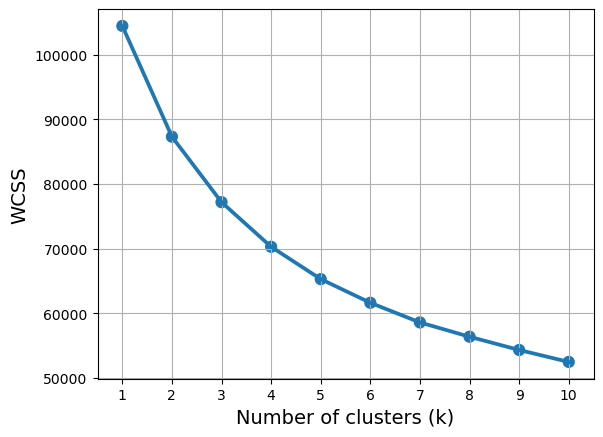

In [ ]:
#Elbow plot
sns.pointplot(a,wss)
plt.xlabel('Number of clusters (k)', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid()
plt.show();

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
ss={1:0}
for i in range(2,11):
    k_means = KMeans(n_clusters = i)
    k_means.fit(df_X)
    labels = k_means.labels_
    s = silhouette_score(df_X, labels, random_state = 1)
    ss[i] = round(s,5)
    print('Average silhouette score for {} clusters is {}'.format (i,round(s,5)))

Average silhouette score for 2 clusters is 0.15659
Average silhouette score for 3 clusters is 0.14625
Average silhouette score for 4 clusters is 0.15067
Average silhouette score for 5 clusters is 0.14017
Average silhouette score for 6 clusters is 0.13631
Average silhouette score for 7 clusters is 0.1374
Average silhouette score for 8 clusters is 0.13915
Average silhouette score for 9 clusters is 0.13358
Average silhouette score for 10 clusters is 0.13669


In [ ]:
k_means = KMeans(n_clusters = 4)
k_means.fit(df_X)
labels = k_means.labels_

In [ ]:
df_X["Clus_kmeans4"] = labels
df_X.head()

City_Tier  Payment  Gender  Account_Segment  CC_Agent_Score  \
0          3        0       1                2               2   
1          1        1       0                1               3   
2          1        0       0                1               3   
3          3        0       0                2               5   
4          1        2       0                1               5   

   Marital_Status  Complain_LY  Coupon_Used_For_Payment  Login_Device  \
0               0            1                      1.0             0   
1               0            1                      0.0             0   
2               0            1                      0.0             0   
3               0            0                      0.0             0   
4               0            0                      1.0             0   

   Tenure_T  Clus_kmeans4  
0  1.609438             2  
1  0.000000             1  
2  0.000000             1  
3  0.000000             1  
4  0.000000             1

In [ ]:
df_X["Clus_kmeans4"].unique()

array([2, 1, 0, 3])

In [ ]:
df_X["Clus_kmeans4"].value_counts()

1    3699
3    2799
2    2757
0    2005
Name: Clus_kmeans4, dtype: int64

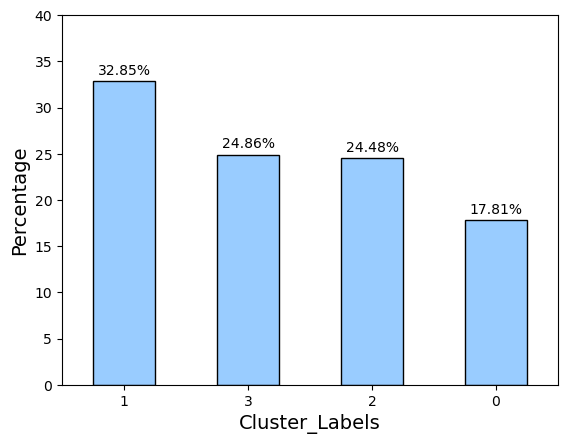

In [ ]:
ax_15 = df_X['Clus_kmeans4'].value_counts(1).mul(100).plot.bar(color = '#99ccff', ec = 'black')
plt.xlabel('Cluster_Labels', fontsize = 14)
plt.ylabel('Percentage', fontsize = 14)
plt.ylim(0, 40)
plt.tick_params(axis = 'x', rotation = 0)

for p in ax_15.patches:
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    label = '{:.2f}%'.format(y)
    ax_15.annotate(label, xy = (x, y), xytext = (0, 5), textcoords = 'offset points', ha ='center')

plt.show();

In [ ]:
data = pd.concat([df_X, df_Y], axis = 1)

In [ ]:
data.head()

City_Tier  Payment  Gender  Account_Segment  CC_Agent_Score  \
0          3        0       1                2               2   
1          1        1       0                1               3   
2          1        0       0                1               3   
3          3        0       0                2               5   
4          1        2       0                1               5   

   Marital_Status  Complain_LY  Coupon_Used_For_Payment  Login_Device  \
0               0            1                      1.0             0   
1               0            1                      0.0             0   
2               0            1                      0.0             0   
3               0            0                      0.0             0   
4               0            0                      1.0             0   

   Tenure_T  Clus_kmeans4  Churn  
0  1.609438             2      1  
1  0.000000             1      1  
2  0.000000             1      1  
3  0.000000             1      1  
4  0.000000             1      1

# EDA on clusters

In [ ]:
df_106 = data.groupby(['Clus_kmeans4'])['Churn'].value_counts(1).mul(100).round(2).unstack()
df_106

Churn             0      1
Clus_kmeans4              
0             77.86  22.14
1             74.70  25.30
2             89.23  10.77
3             92.18   7.82

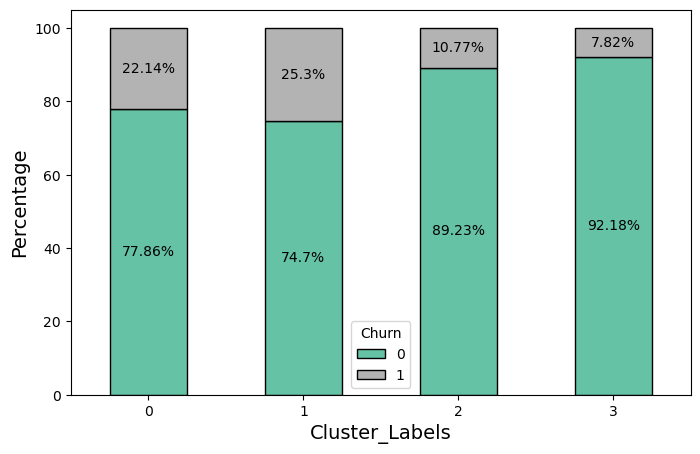

In [ ]:
ax_106 = df_106.plot(kind = 'bar', stacked = True, rot = 0, figsize = (8, 5), cmap = 'Set2', ec = 'black')

for c in ax_106.containers:
    labels = [str(round(v.get_height(), 2)) + '%' if v.get_height() > 0 else '' for v in c]
    ax_106.bar_label(c, label_type = 'center', labels = labels, size = 10)

ax_106.set_xlabel('Cluster_Labels', fontsize = 14)
ax_106.set_ylabel('Percentage', fontsize = 14)
plt.show();

In [ ]:
df_107 = data.groupby(['Clus_kmeans4'])['Login_Device'].value_counts(1).mul(100).round(2).unstack()
df_107

Login_Device      0      1
Clus_kmeans4              
0             73.92  26.08
1             73.05  26.95
2             70.55  29.45
3             69.77  30.23

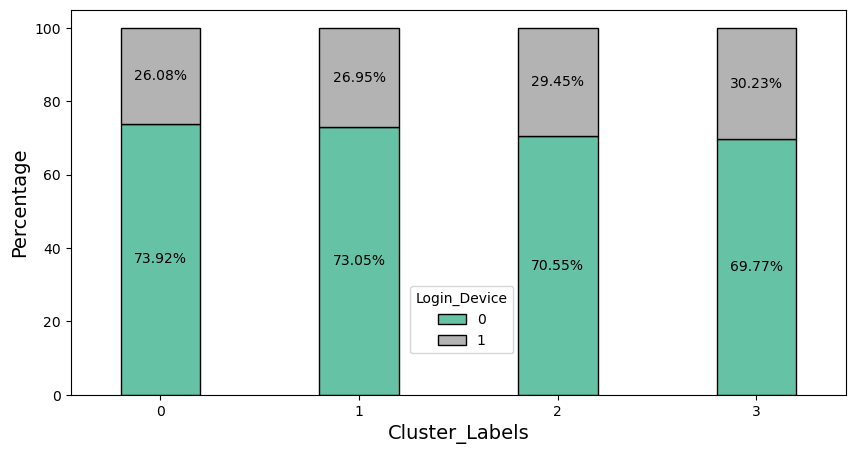

In [ ]:
ax_107 = df_107.plot(kind = 'bar', stacked = True, figsize = (10, 5), rot = 0, cmap = 'Set2', ec = 'black', width = 0.4)

for c in ax_107.containers:
    labels = [str(round(v.get_height(), 2)) + '%' if v.get_height() > 0 else '' for v in c]
    ax_107.bar_label(c, label_type = 'center', labels = labels, size = 10)

ax_107.set_xlabel('Cluster_Labels', fontsize = 14)
ax_107.set_ylabel('Percentage', fontsize = 14)
ax_107.legend_.set_bbox_to_anchor([0.58, 0.3])
plt.show();

In [ ]:
df_108 = data.groupby(['Clus_kmeans4'])['City_Tier'].value_counts(1).mul(100).round(2).unstack()
df_108

City_Tier         1     2      3
Clus_kmeans4                    
0             12.52  1.35  86.13
1             80.81  5.97  13.22
2             74.50  4.17  21.33
3             74.35  4.18  21.47

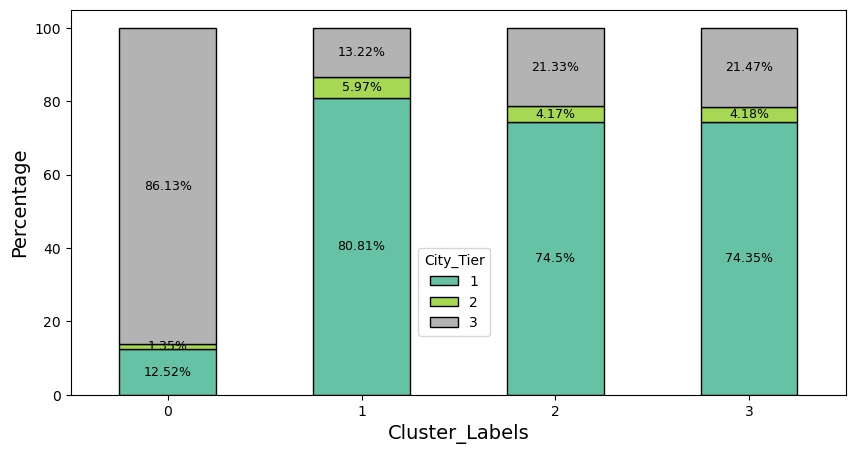

In [ ]:
ax_108 = df_108.plot(kind = 'bar', stacked = True, figsize = (10, 5), rot = 0, cmap = 'Set2', ec = 'black')

for c in ax_108.containers:
    labels = [str(round(v.get_height(), 2)) + '%' if v.get_height() > 0 else '' for v in c]
    ax_108.bar_label(c, label_type = 'center', labels = labels, size = 9)

ax_108.set_xlabel('Cluster_Labels', fontsize = 14)
ax_108.set_ylabel('Percentage', fontsize = 14)
ax_108.legend_.set_bbox_to_anchor([0.55, 0.4])
plt.show();

In [ ]:
df_109 = data.groupby(['Clus_kmeans4'])['Marital_Status'].value_counts(1).mul(100).round(2).unstack()
df_109

Marital_Status      0      1      2
Clus_kmeans4                       
0               29.63  51.22  19.15
1               34.01  51.77  14.22
2               34.31  54.99  10.70
3               25.79  57.66  16.54

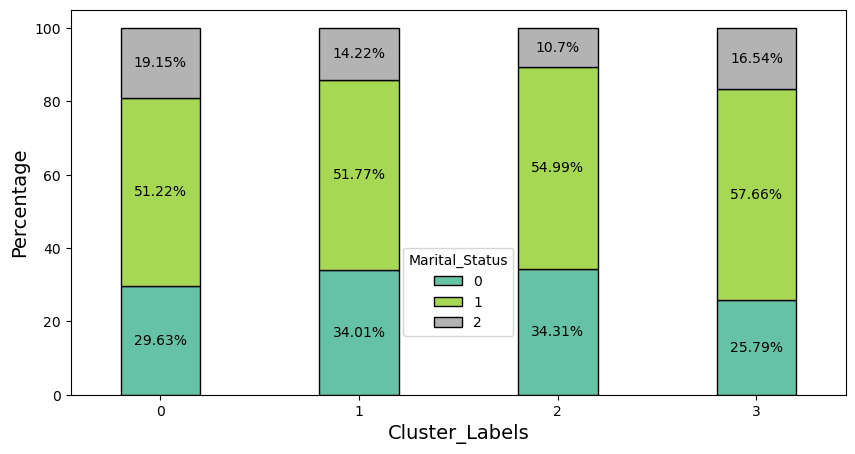

In [ ]:
ax_109 = df_109.plot(kind = 'bar', stacked = True, rot = 0, figsize = (10, 5), cmap = 'Set2', ec = 'black', width = 0.4)

for c in ax_109.containers:
    labels = [str(round(v.get_height(), 2)) + '%' if v.get_height() > 0 else '' for v in c]
    ax_109.bar_label(c, label_type = 'center', labels = labels, size = 10)

ax_109.set_xlabel('Cluster_Labels', fontsize = 14)
ax_109.set_ylabel('Percentage', fontsize = 14)
ax_109.legend_.set_bbox_to_anchor([0.58, 0.4])
plt.show();

In [ ]:
df_110 = data.groupby(['Clus_kmeans4'])['CC_Agent_Score'].value_counts(1).mul(100).round(2).unstack()
df_110

CC_Agent_Score      1      2      3      4      5
Clus_kmeans4                                     
0               14.01  13.97  34.31  22.99  14.71
1                 NaN   1.27  41.66  26.01  31.06
2               73.27  26.73    NaN    NaN    NaN
3                0.04   3.57  44.55  25.15  26.69

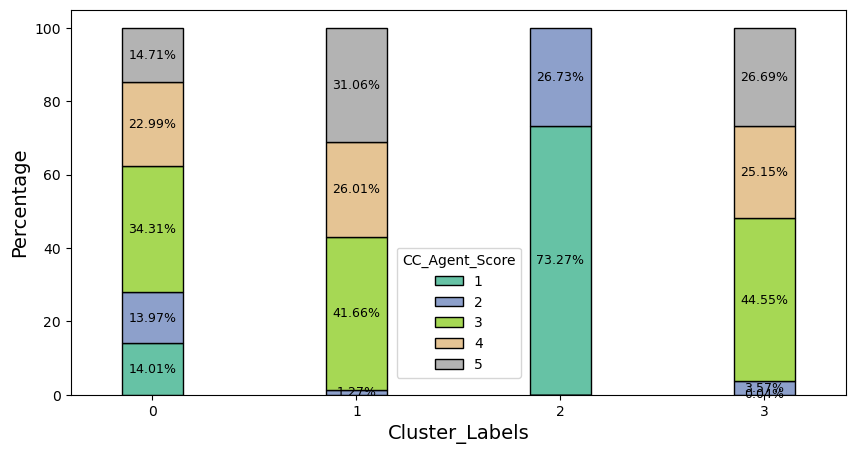

In [ ]:
ax_110 = df_110.plot(kind = 'bar', stacked = True, figsize = (10, 5), rot = 0, cmap = 'Set2', ec = 'black', width = 0.3)

for c in ax_110.containers:
    labels = [str(round(v.get_height(), 2)) + '%' if v.get_height() > 0 else '' for v in c]
    ax_110.bar_label(c, label_type = 'center', labels = labels, size = 9)

ax_110.set_xlabel('Cluster_Labels', fontsize = 14)
ax_110.set_ylabel('Percentage', fontsize = 14)
ax_110.legend_.set_bbox_to_anchor([0.59, 0.4])
plt.show();

In [ ]:
df_111 = data.groupby(['Clus_kmeans4'])['Gender'].value_counts(1).mul(100).round(2).unstack()
df_111

Gender            0      1
Clus_kmeans4              
0             56.61  43.39
1             63.53  36.47
2             64.09  35.91
3             55.73  44.27

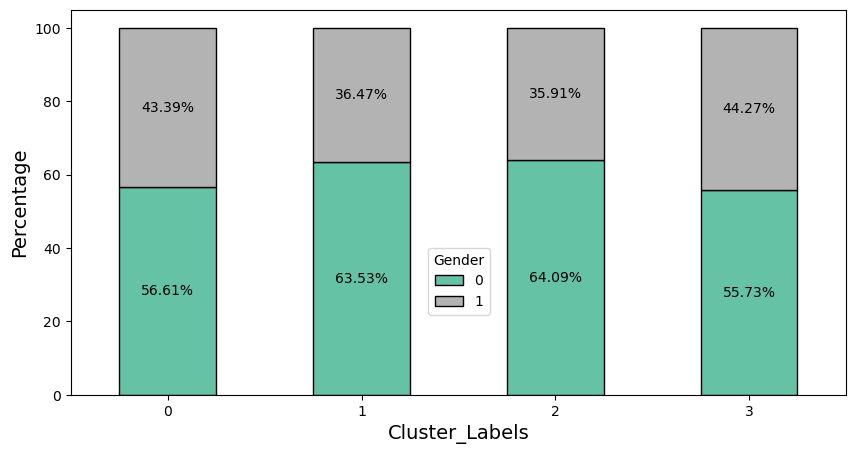

In [ ]:
ax_111 = df_111.plot(kind = 'bar', stacked = True, figsize = (10, 5), rot = 0, cmap = 'Set2', ec = 'black')

for c in ax_111.containers:
    labels = [str(round(v.get_height(), 2)) + '%' if v.get_height() > 0 else '' for v in c]
    ax_111.bar_label(c, label_type = 'center', labels = labels, size = 10)

ax_111.set_xlabel('Cluster_Labels', fontsize = 14)
ax_111.set_ylabel('Percentage', fontsize = 14)
ax_111.legend_.set_bbox_to_anchor([0.55, 0.4])
plt.show();

In [ ]:
df_112 = data.groupby(['Clus_kmeans4'])['Complain_LY'].value_counts(1).mul(100).round(2).unstack()
df_112

Complain_LY       0      1
Clus_kmeans4              
0             72.12  27.88
1             73.40  26.60
2             68.59  31.41
3             74.92  25.08

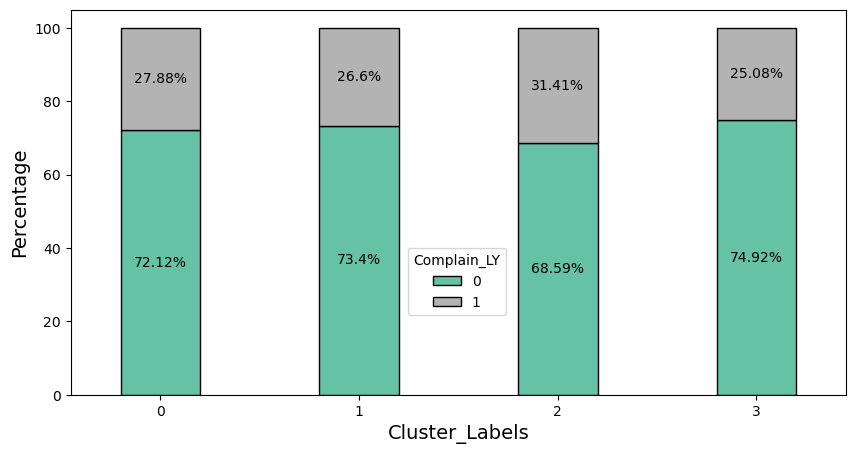

In [ ]:
ax_112 = df_112.plot(kind = 'bar', stacked = True, figsize = (10, 5), rot = 0, cmap = 'Set2', ec = 'black', width = 0.4)

for c in ax_112.containers:
    labels = [str(round(v.get_height(), 2)) + '%' if v.get_height() > 0 else '' for v in c]
    ax_112.bar_label(c, label_type = 'center', labels = labels, size = 10)

ax_112.set_xlabel('Cluster_Labels', fontsize = 14)
ax_112.set_ylabel('Percentage', fontsize = 14)
ax_112.legend_.set_bbox_to_anchor([0.57, 0.4])
plt.show();

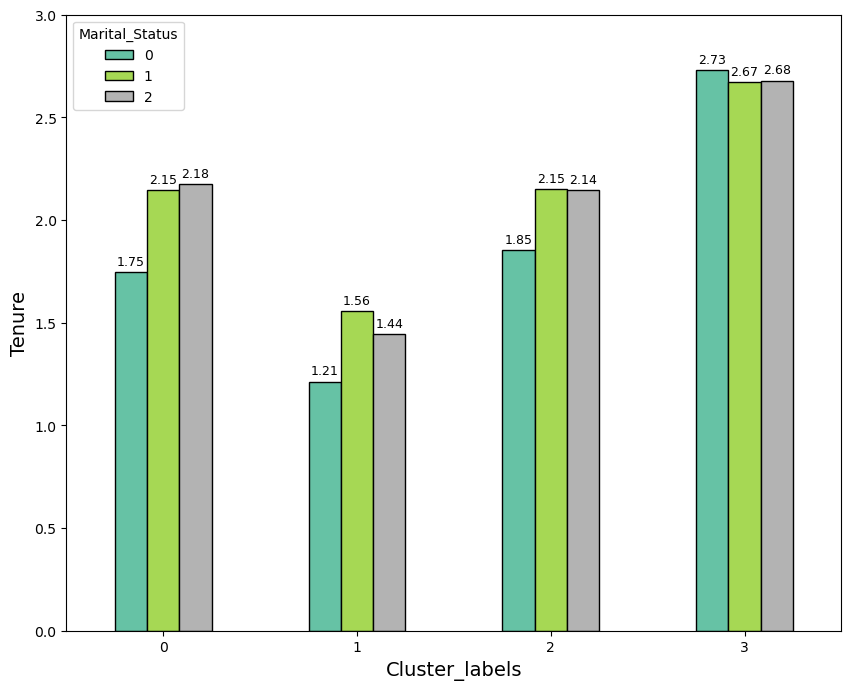

In [ ]:
ax_23 = pd.crosstab(data['Clus_kmeans4'], data['Marital_Status'], values = data['Tenure_T'],
                    aggfunc = 'mean').plot(kind = 'bar', figsize = (10,8), cmap = 'Set2', ec = 'black')
plt.xlabel('Cluster_labels', fontsize = 14)
plt.ylabel('Tenure', fontsize = 14)
plt.ylim(0, 3)
plt.tick_params(axis = 'x', rotation = 0)

for p in ax_23.patches:
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    label = '{:.2f}'.format(y)
    ax_23.annotate(label, xy = (x, y), xytext = (0, 5), textcoords = 'offset points', ha = 'center', size = 9)

plt.show();

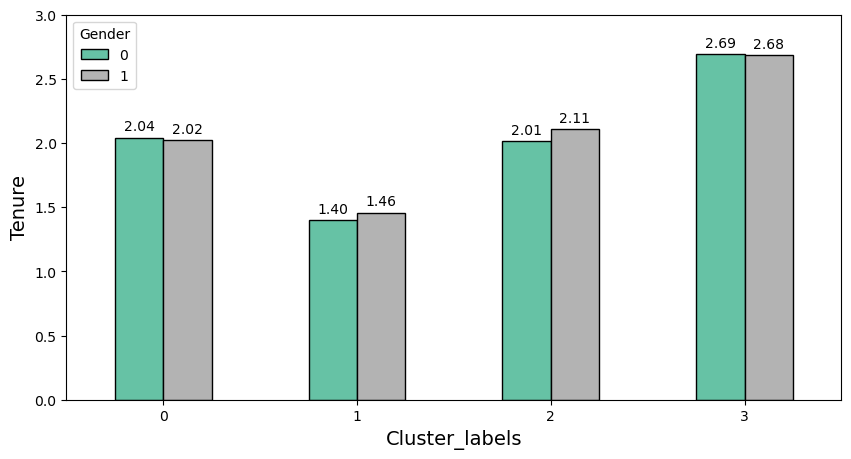

In [ ]:
ax_24 = pd.crosstab(data['Clus_kmeans4'], data['Gender'], values = data['Tenure_T'],
                    aggfunc = 'mean').plot(kind = 'bar', figsize = (10,5), cmap = 'Set2', ec = 'black')
plt.xlabel('Cluster_labels', fontsize = 14)
plt.ylabel('Tenure', fontsize = 14)
plt.ylim(0, 3)
plt.tick_params(axis = 'x', rotation = 0)

for p in ax_24.patches:
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    label = '{:.2f}'.format(y)
    ax_24.annotate(label, xy = (x, y), xytext = (0, 5), textcoords = 'offset  points', ha = 'center')

plt.show();

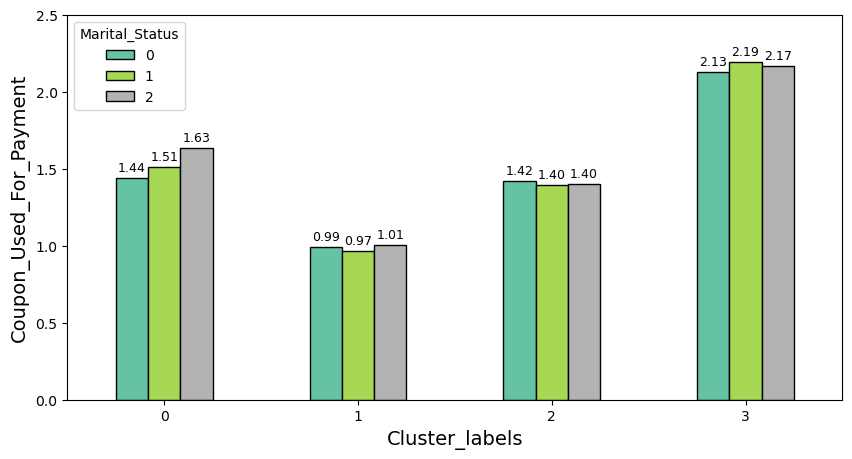

In [ ]:
ax_25 = pd.crosstab(data['Clus_kmeans4'], data['Marital_Status'], values = data['Coupon_Used_For_Payment'],
                    aggfunc = 'mean').plot(kind = 'bar', figsize = (10,5), cmap = 'Set2', ec = 'black')
plt.xlabel('Cluster_labels',fontsize = 14)
plt.ylabel('Coupon_Used_For_Payment', fontsize = 14)
plt.ylim(0, 2.5)
plt.tick_params(axis = 'x', rotation = 0)

for p in ax_25.patches:
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    label = '{:.2f}'.format(y)
    ax_25.annotate(label, xy = (x, y), xytext = (0, 5), textcoords = 'offset  points', ha = 'center', size = 9)

plt.show();

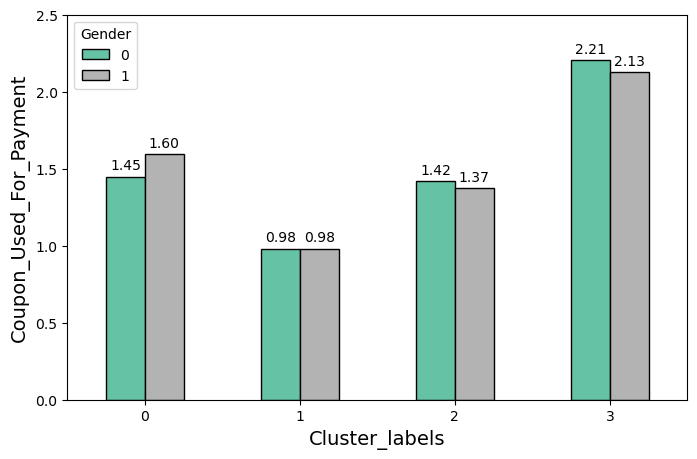

In [ ]:
ax_26 = pd.crosstab(data['Clus_kmeans4'], data['Gender'], values = data['Coupon_Used_For_Payment'],
                    aggfunc = 'mean').plot(kind = 'bar', figsize = (8, 5), cmap = 'Set2', ec = 'black')
plt.xlabel('Cluster_labels', fontsize = 14)
plt.ylabel('Coupon_Used_For_Payment', fontsize = 14)
plt.ylim(0, 2.5)
plt.tick_params(axis = 'x', rotation = 0)

for p in ax_26.patches:
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    label = '{:.2f}'.format(y)
    ax_26.annotate(label, xy = (x, y), xytext = (0, 5), textcoords = 'offset points', ha = 'center')

plt.show();

# Project Notes -- 2: Model-building

**Train-test split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_churn.drop('Churn', axis = 1)
y = df_churn['Churn']

In [ ]:
print('The shape of X matrix:', X.shape)
print('Size of y:', len(y))

The shape of X matrix: (11260, 10)
Size of y: 11260


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1, stratify = df_churn['Churn'])

In [ ]:
X_train.head()

City_Tier  Payment  Gender  Account_Segment  CC_Agent_Score  \
799           1        0       0                1               3   
7530          3        4       0                1               4   
6908          3        4       0                3               5   
3251          3        4       0                3               5   
5553          3        4       0                2               1   

      Marital_Status  Complain_LY  Coupon_Used_For_Payment  Login_Device  \
799                2            1                      1.0             0   
7530               1            0                      2.0             0   
6908               0            0                      3.5             0   
3251               2            0                      2.0             0   
5553               0            0                      2.0             0   

      Tenure_T  
799   2.197225  
7530  1.098612  
6908  2.564949  
3251  3.295837  
5553  0.693147

In [ ]:
print('TRAINING SET')
print('No. of rows:', X_train.shape[0])
print('No. of columns:', X_train.shape[1])

TRAINING SET
No. of rows: 7882
No. of columns: 10


In [ ]:
X_test.head()

City_Tier  Payment  Gender  Account_Segment  CC_Agent_Score  \
6888          1        0       0                1               4   
467           1        1       1                3               2   
2347          1        0       0                4               1   
1794          1        0       1                1               3   
3125          1        2       0                4               3   

      Marital_Status  Complain_LY  Coupon_Used_For_Payment  Login_Device  \
6888               1            0                      1.0             1   
467                2            1                      3.0             0   
2347               0            0                      2.0             1   
1794               1            0                      1.0             1   
3125               2            1                      1.0             0   

      Tenure_T  
6888  2.302585  
467   3.044522  
2347  2.197225  
1794  2.564949  
3125  0.693147

In [ ]:
print('TEST SET')
print('No. of rows:', X_test.shape[0])
print('No. of columns:', X_test.shape[1])

TEST SET
No. of rows: 3378
No. of columns: 10


In [ ]:
y_train.value_counts(1)

0    0.831642
1    0.168358
Name: Churn, dtype: float64

In [ ]:
y_test.value_counts(1)

0    0.831557
1    0.168443
Name: Churn, dtype: float64

# 2.1 Logistic Regression model with unbalanced data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
Logit_model = LogisticRegression()
Logit_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Prediction on training and test sets
y_train_predict = Logit_model.predict(X_train)
y_test_predict = Logit_model.predict(X_test)

In [ ]:
np.round(Logit_model.intercept_,6)

array([-1.442142])

In [ ]:
Logit_model.coef_

array([[ 0.27037214,  0.06869433, -0.28239212, -0.09186615,  0.26588186,
        -0.54854316,  1.5228293 ,  0.24021774,  0.45294895, -1.23749668]])

In [ ]:
dict(zip(X_train.columns,Logit_model.coef_[0]))

{'City_Tier': 0.2703721433752038,
 'Payment': 0.06869432785760017,
 'Gender': -0.2823921186822139,
 'Account_Segment': -0.09186615270529823,
 'CC_Agent_Score': 0.26588185692649147,
 'Marital_Status': -0.5485431641852475,
 'Complain_LY': 1.522829301736533,
 'Coupon_Used_For_Payment': 0.2402177385038278,
 'Login_Device': 0.4529489470214403,
 'Tenure_T': -1.237496675380114}

In [ ]:
def get_feature_importance(clf, feature_names):
    feature_importance=(pd.DataFrame(
        {'Variables':feature_names,
         'Coefficients':clf.coef_[0]}
        )
        .round(decimals=6) \
        .sort_values('Coefficients', ascending=False)
        )
    return feature_importance

In [ ]:
get_feature_importance(Logit_model, X_train.columns)

Variables  Coefficients
6              Complain_LY      1.522829
8             Login_Device      0.452949
0                City_Tier      0.270372
4           CC_Agent_Score      0.265882
7  Coupon_Used_For_Payment      0.240218
1                  Payment      0.068694
3          Account_Segment     -0.091866
2                   Gender     -0.282392
5           Marital_Status     -0.548543
9                 Tenure_T     -1.237497

In [ ]:
X_train.columns

Index(['City_Tier', 'Payment', 'Gender', 'Account_Segment', 'CC_Agent_Score',
       'Marital_Status', 'Complain_LY', 'Coupon_Used_For_Payment',
       'Login_Device', 'Tenure_T'],
      dtype='object')

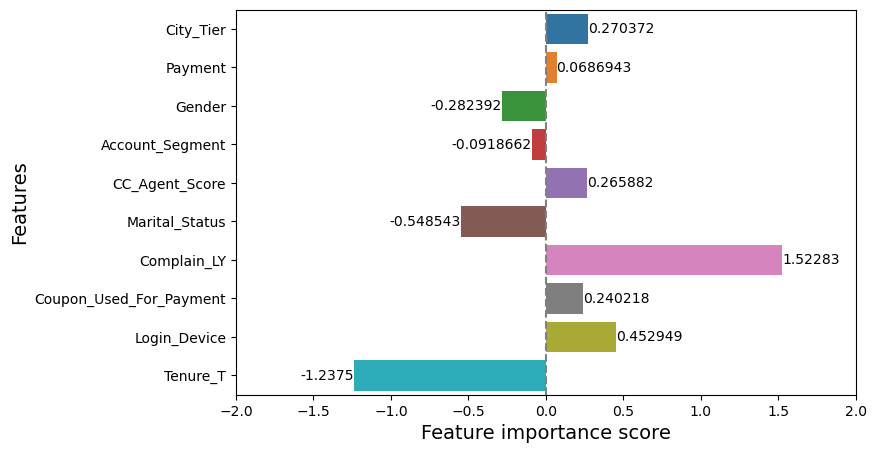

In [ ]:
plt.figure(figsize=(8,5))
feature_imp=pd.Series(Logit_model.coef_[0],
                         index=['City_Tier', 'Payment', 'Gender', 'Account_Segment', 'CC_Agent_Score',
                                'Marital_Status', 'Complain_LY', 'Coupon_Used_For_Payment', 'Login_Device', 'Tenure_T'])

bars_1 = sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature importance score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.axvline(x = 0, color = 'gray', linestyle = '--')
plt.xlim(-2, 2)
bars_1.bar_label(bars_1.containers[0])
plt.show();

In [ ]:
print('Classification report for training data: \n\n', classification_report(y_train, y_train_predict), '\n')
print('Classification report for test data: \n\n', classification_report(y_test, y_test_predict))

Classification report for training data: 

               precision    recall  f1-score   support

           0       0.90      0.96      0.93      6555
           1       0.73      0.47      0.57      1327

    accuracy                           0.88      7882
   macro avg       0.81      0.72      0.75      7882
weighted avg       0.87      0.88      0.87      7882
 

Classification report for test data: 

               precision    recall  f1-score   support

           0       0.89      0.97      0.93      2809
           1       0.75      0.44      0.55       569

    accuracy                           0.88      3378
   macro avg       0.82      0.70      0.74      3378
weighted avg       0.87      0.88      0.87      3378



In [ ]:
#Condfusion matrix for training data
confusion_matrix(y_train, y_train_predict)

array([[6322,  233],
       [ 703,  624]], dtype=int64)

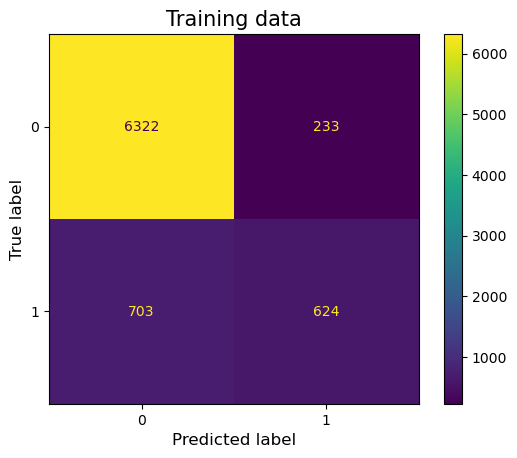

In [ ]:
plot_confusion_matrix(Logit_model, X_train, y_train)
plt.title('Training data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show();

In [ ]:
#Confusion matrix for test data
confusion_matrix(y_test, y_test_predict)

array([[2726,   83],
       [ 321,  248]], dtype=int64)

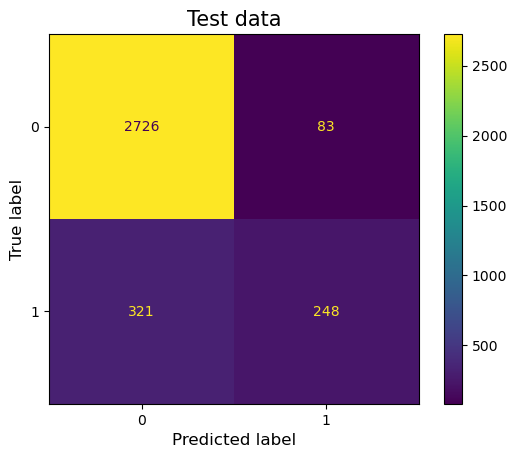

In [ ]:
plot_confusion_matrix(Logit_model, X_test, y_test)
plt.title('Test data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show();

In [ ]:
#Training data probability prediction
probs_train_Logit = Logit_model.predict_proba(X_train)

#Test data probability prediction
probs_test_Logit = Logit_model.predict_proba(X_test)

AUC for training data: 0.864
AUC for test data: 0.850


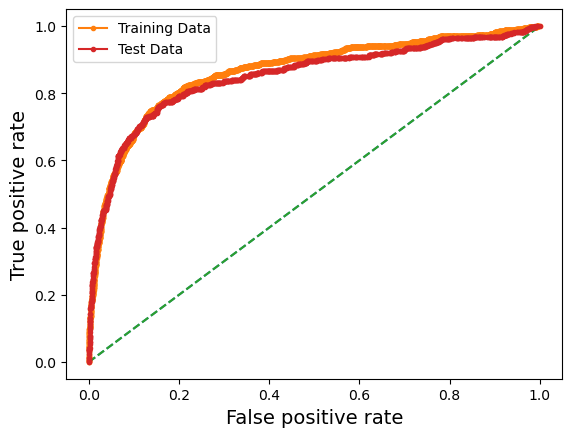

In [ ]:
#AUC and ROC for training data

#Calculate AUC
train_auc_Logit = metrics.roc_auc_score(y_train, probs_train_Logit[:,1])
print('AUC for training data: %.3f' %train_auc_Logit)

#calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train, probs_train_Logit[:,1])
plt.plot([0,1], [0,1], linestyle='--')

#plot roc curve for the model
plt.plot(fpr, tpr, marker='.', label = 'Training Data')

#AUC and ROC for test data

#Calculate AUC
test_auc_Logit = metrics.roc_auc_score(y_test, probs_test_Logit[:,1])
print('AUC for test data: %.3f' %test_auc_Logit)

#calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs_test_Logit[:,1])
plt.plot([0,1], [0,1], linestyle='--')

#plot roc curve for the model
plt.plot(fpr, tpr, marker='.', label = 'Test Data')

#Labels
plt.xlabel('False positive rate', fontsize=14)
plt.ylabel('True positive rate', fontsize=14)

# show the plot
plt.legend(loc='best')
plt.show();

# 2.2 Logistic model with balanced data

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#SMOTE is applied only on training data
sm = SMOTE(random_state = 1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
X_train_res.shape

(13110, 10)

In [ ]:
y_train_res.value_counts()

0    6555
1    6555
Name: Churn, dtype: int64

In [ ]:
Logit_model_SM = LogisticRegression()
Logit_model_SM.fit(X_train_res, y_train_res)

LogisticRegression()

In [ ]:
#Prediction on training and test sets
y_train_predict_Logit_SM = Logit_model_SM.predict(X_train_res)
y_test_predict_Logit_SM = Logit_model_SM.predict(X_test)

In [ ]:
np.round(Logit_model_SM.intercept_,6)

array([0.714039])

In [ ]:
Logit_model_SM.coef_

array([[ 0.28141321,  0.0745524 , -0.45308907, -0.06457659,  0.17451516,
        -0.71930922,  1.32171383,  0.1797682 ,  0.11607378, -1.17498555]])

In [ ]:
dict(zip(X_train.columns,Logit_model_SM.coef_[0]))

{'City_Tier': 0.2814132135732491,
 'Payment': 0.07455239774668193,
 'Gender': -0.45308906654351433,
 'Account_Segment': -0.06457659322485551,
 'CC_Agent_Score': 0.17451515694673778,
 'Marital_Status': -0.71930922064739,
 'Complain_LY': 1.3217138279921312,
 'Coupon_Used_For_Payment': 0.17976820005262262,
 'Login_Device': 0.11607377709808961,
 'Tenure_T': -1.174985552815621}

In [ ]:
get_feature_importance(Logit_model_SM, X_train.columns)

Variables  Coefficients
6              Complain_LY      1.321714
0                City_Tier      0.281413
7  Coupon_Used_For_Payment      0.179768
4           CC_Agent_Score      0.174515
8             Login_Device      0.116074
1                  Payment      0.074552
3          Account_Segment     -0.064577
2                   Gender     -0.453089
5           Marital_Status     -0.719309
9                 Tenure_T     -1.174986

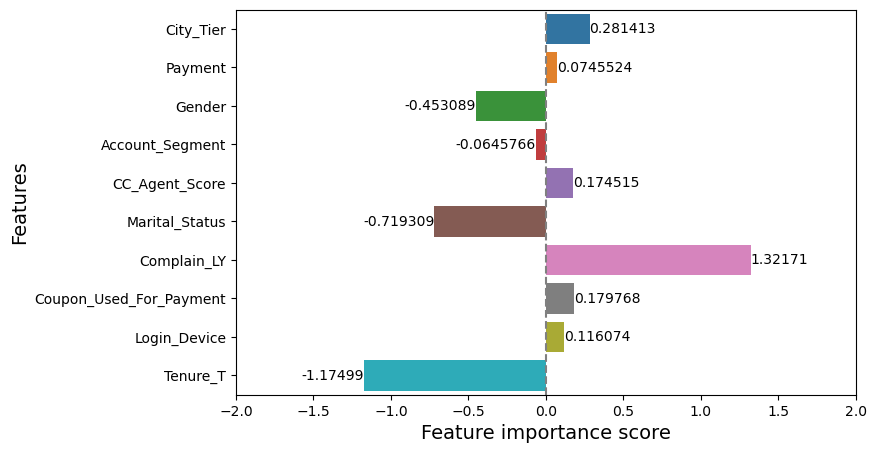

In [ ]:
plt.figure(figsize=(8,5))
feature_imp=pd.Series(Logit_model_SM.coef_[0],
                         index=['City_Tier', 'Payment', 'Gender', 'Account_Segment', 'CC_Agent_Score',
       'Marital_Status', 'Complain_LY', 'Coupon_Used_For_Payment',
       'Login_Device', 'Tenure_T'])

bars_2 = sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature importance score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.axvline(x = 0, color = 'gray', linestyle = '--')
plt.xlim(-2,2)
bars_2.bar_label(bars_2.containers[0])
plt.show();

In [ ]:
print('Classification report for training data: \n\n', classification_report(y_train_res, y_train_predict_Logit_SM), '\n')
print('Classification report for test data: \n\n', classification_report(y_test, y_test_predict_Logit_SM))

Classification report for training data: 

               precision    recall  f1-score   support

           0       0.80      0.80      0.80      6555
           1       0.80      0.80      0.80      6555

    accuracy                           0.80     13110
   macro avg       0.80      0.80      0.80     13110
weighted avg       0.80      0.80      0.80     13110
 

Classification report for test data: 

               precision    recall  f1-score   support

           0       0.95      0.81      0.87      2809
           1       0.45      0.79      0.58       569

    accuracy                           0.80      3378
   macro avg       0.70      0.80      0.73      3378
weighted avg       0.87      0.80      0.82      3378



In [ ]:
#Confusion matrix for training data
confusion_matrix(y_train_res, y_train_predict_Logit_SM)

array([[5274, 1281],
       [1300, 5255]], dtype=int64)

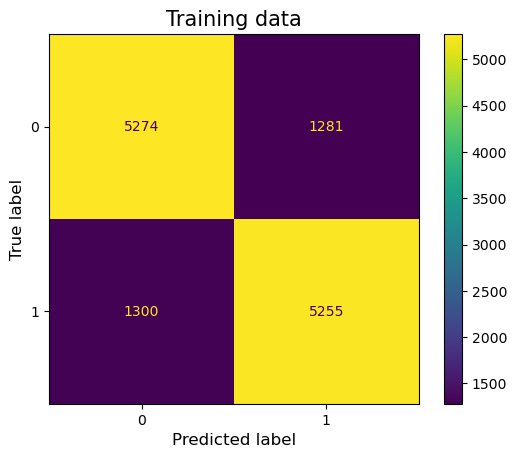

In [ ]:
plot_confusion_matrix(Logit_model_SM, X_train_res, y_train_res)
plt.title('Training data', fontsize = 15)
plt.xlabel('Predicted label', fontsize = 12)
plt.ylabel('True label', fontsize = 12)
plt.show();

In [ ]:
#Confusion matrix for test data
confusion_matrix(y_test, y_test_predict_Logit_SM)

array([[2266,  543],
       [ 117,  452]], dtype=int64)

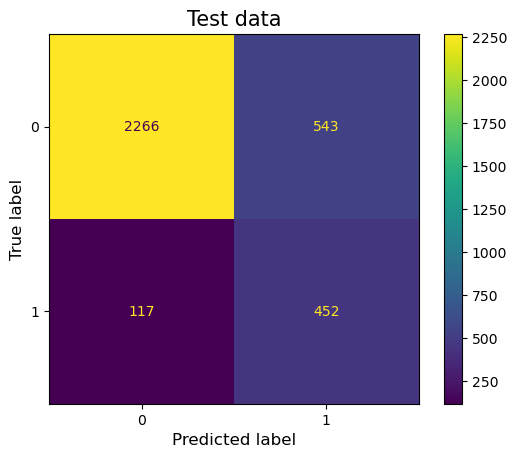

In [ ]:
plot_confusion_matrix(Logit_model_SM, X_test, y_test)
plt.title('Test data', fontsize = 15)
plt.xlabel('Predicted label', fontsize = 12)
plt.ylabel('True label', fontsize = 12)
plt.show();

In [ ]:
#Training data probability prediction
probs_train_Logit_SM = Logit_model_SM.predict_proba(X_train_res)

#Test data probability prediction
probs_test_Logit_SM = Logit_model_SM.predict_proba(X_test)

AUC for training data: 0.865
AUC for test data: 0.845


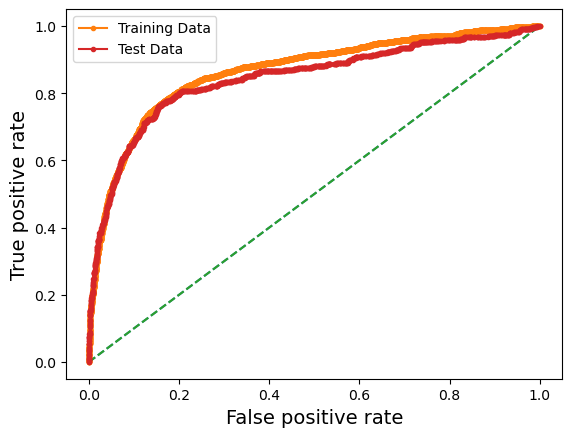

In [ ]:
#AUC and ROC for training data

#Calculate AUC
train_auc_Logit_SM = metrics.roc_auc_score(y_train_res, probs_train_Logit_SM[:,1])
print('AUC for training data: %.3f' %train_auc_Logit_SM)

#calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_res, probs_train_Logit_SM[:,1])
plt.plot([0,1], [0,1], linestyle='--')

#plot roc curve for the model
plt.plot(fpr, tpr, marker='.', label = 'Training Data')

#AUC and ROC for test data

#Calculate AUC
test_auc_Logit_SM = metrics.roc_auc_score(y_test, probs_test_Logit_SM[:,1])
print('AUC for test data: %.3f' %test_auc_Logit_SM)

#calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs_test_Logit_SM[:,1])
plt.plot([0,1], [0,1], linestyle='--')

#plot roc curve for the model
plt.plot(fpr, tpr, marker='.', label = 'Test Data')

#Labels
plt.xlabel('False positive rate', fontsize=14)
plt.ylabel('True positive rate', fontsize=14)

# show the plot
plt.legend(loc='best')
plt.show();

# Logistic model with hypertuning parameters

In [ ]:
param_grid = [
    {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver' : ['lbfgs', 'newton-cg', 'liblinear', 'sag'],
    'max_iter' : [100, 1000, 2500, 10000]}
]

In [ ]:
grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid,
                           cv = 3, n_jobs=-1, scoring='f1', verbose=True)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'max_iter': [100, 1000, 2500, 10000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear',
                                     'sag']}],
             scoring='f1', verbose=True)

In [ ]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'max_iter': 100, 'penalty': 'none', 'solver': 'lbfgs'} 

LogisticRegression(penalty='none')


In [ ]:
Logit_model_tuned = grid_search.best_estimator_

In [ ]:
print('Accuracy on training data: ', Logit_model_tuned.score(X_train, y_train))
print('Accuracy on test data: ', Logit_model_tuned.score(X_test, y_test))

Accuracy on training data:  0.8808678000507485
Accuracy on test data:  0.87951450562463


In [ ]:
np.round(Logit_model_tuned.intercept_,6)

array([-1.446972])

In [ ]:
Logit_model_tuned.coef_

array([[ 0.27137527,  0.06875458, -0.28544087, -0.09195852,  0.2667212 ,
        -0.55109379,  1.53303976,  0.2412347 ,  0.45690622, -1.24032258]])

In [ ]:
get_feature_importance(Logit_model_tuned, X_train.columns)

Variables  Coefficients
6              Complain_LY      1.533040
8             Login_Device      0.456906
0                City_Tier      0.271375
4           CC_Agent_Score      0.266721
7  Coupon_Used_For_Payment      0.241235
1                  Payment      0.068755
3          Account_Segment     -0.091959
2                   Gender     -0.285441
5           Marital_Status     -0.551094
9                 Tenure_T     -1.240323

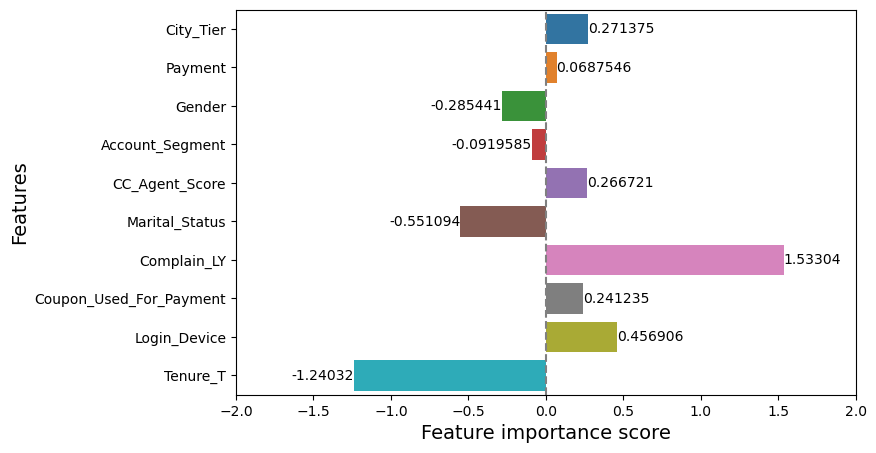

In [ ]:
plt.figure(figsize=(8,5))
feature_imp=pd.Series(Logit_model_tuned.coef_[0],
                         index=['City_Tier', 'Payment', 'Gender', 'Account_Segment', 'CC_Agent_Score',
       'Marital_Status', 'Complain_LY', 'Coupon_Used_For_Payment',
       'Login_Device', 'Tenure_T'])

bars_3 = sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature importance score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.axvline(x = 0, color = 'gray', linestyle = '--')
plt.xlim(-2,2)
bars_3.bar_label(bars_3.containers[0])
plt.show();

In [ ]:
#Making predictions
y_train_predict_Logit_tuned = Logit_model_tuned.predict(X_train)
y_test_predict_Logit_tuned = Logit_model_tuned.predict(X_test)

In [ ]:
print('Classification report for training data: \n\n', classification_report(y_train, y_train_predict_Logit_tuned), '\n')
print('Classification report for test data: \n\n', classification_report(y_test, y_test_predict_Logit_tuned))

Classification report for training data: 

               precision    recall  f1-score   support

           0       0.90      0.96      0.93      6555
           1       0.73      0.47      0.57      1327

    accuracy                           0.88      7882
   macro avg       0.81      0.72      0.75      7882
weighted avg       0.87      0.88      0.87      7882
 

Classification report for test data: 

               precision    recall  f1-score   support

           0       0.89      0.97      0.93      2809
           1       0.74      0.44      0.55       569

    accuracy                           0.88      3378
   macro avg       0.82      0.70      0.74      3378
weighted avg       0.87      0.88      0.87      3378



In [ ]:
#Condfusion matrix for training data
confusion_matrix(y_train, y_train_predict_Logit_tuned)

array([[6319,  236],
       [ 703,  624]], dtype=int64)

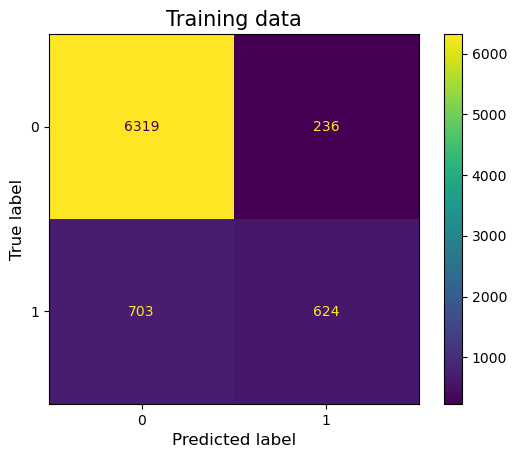

In [ ]:
plot_confusion_matrix(Logit_model_tuned, X_train, y_train)
plt.title('Training data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show();

In [ ]:
#Condfusion matrix for test data
confusion_matrix(y_test, y_test_predict_Logit_tuned)

array([[2723,   86],
       [ 321,  248]], dtype=int64)

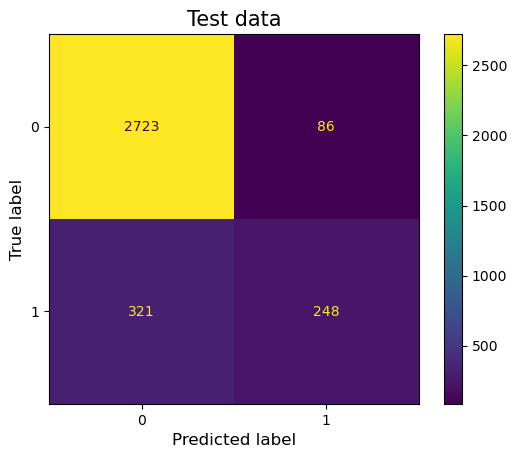

In [ ]:
plot_confusion_matrix(Logit_model_tuned,X_test,y_test)
plt.title('Test data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show();

In [ ]:
#Training data probability prediction
probs_train_Logit_tuned = Logit_model_tuned.predict_proba(X_train)

#Test data probability prediction
probs_test_Logit_tuned = Logit_model_tuned.predict_proba(X_test)

AUC for training data: 0.864
AUC for test data: 0.850


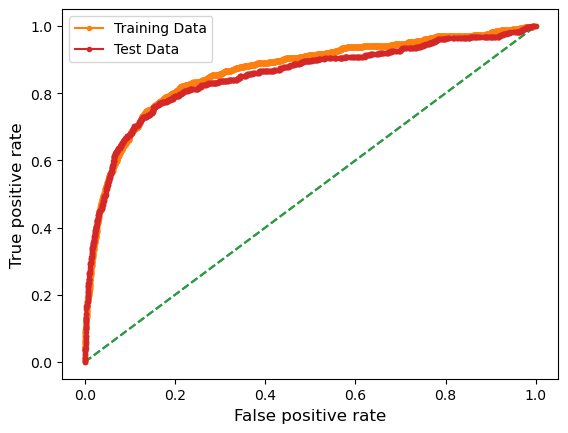

In [ ]:
#AUC and ROC for training data

#Calculate AUC
train_auc_Logit_tuned = metrics.roc_auc_score(y_train, probs_train_Logit_tuned[:,1])
print('AUC for training data: %.3f' %train_auc_Logit_tuned)

#calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train, probs_train_Logit_tuned[:,1])
plt.plot([0,1], [0,1], linestyle='--')

#plot roc curve for the model
plt.plot(fpr, tpr, marker='.', label = 'Training Data')

#AUC and ROC for test data

#Calculate AUC
test_auc_Logit_tuned = metrics.roc_auc_score(y_test, probs_test_Logit_tuned[:,1])
print('AUC for test data: %.3f' %test_auc_Logit_tuned)

#calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs_test_Logit_tuned[:,1])
plt.plot([0,1], [0,1], linestyle='--')

#plot roc curve for the model
plt.plot(fpr, tpr, marker='.', label = 'Test Data')

#Labels
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)

# show the plot
plt.legend(loc='best')
plt.show();

# LDA with unbalanced data

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
LDA = LinearDiscriminantAnalysis()

In [ ]:
LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
print('The intercept is', np.round(LDA.intercept_,6))

The intercept is [-1.121159]


In [ ]:
LDA.coef_

array([[ 0.25539491,  0.08929011, -0.19526943, -0.1004268 ,  0.25882584,
        -0.60132678,  1.82800777,  0.16185402,  0.43556483, -1.4243987 ]])

In [ ]:
get_feature_importance(LDA, X_train.columns)

Variables  Coefficients
6              Complain_LY      1.828008
8             Login_Device      0.435565
4           CC_Agent_Score      0.258826
0                City_Tier      0.255395
7  Coupon_Used_For_Payment      0.161854
1                  Payment      0.089290
3          Account_Segment     -0.100427
2                   Gender     -0.195269
5           Marital_Status     -0.601327
9                 Tenure_T     -1.424399

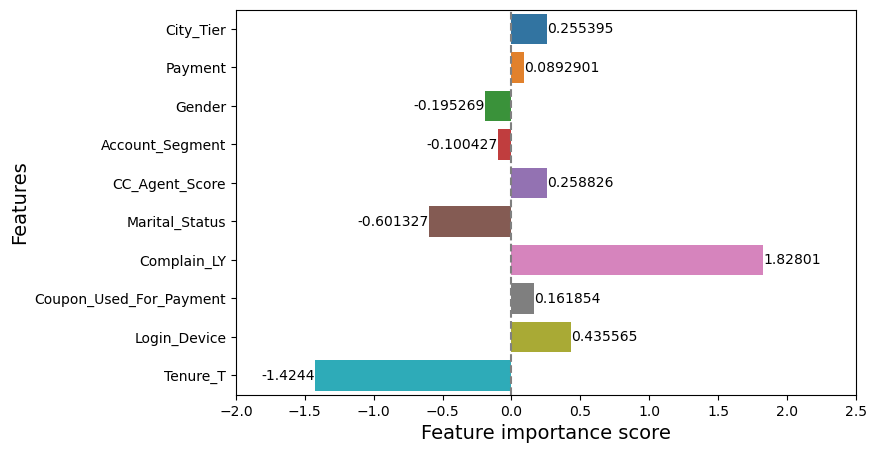

In [ ]:
plt.figure(figsize=(8,5))
feature_imp=pd.Series(LDA.coef_[0],
                         index = ['City_Tier', 'Payment', 'Gender', 'Account_Segment', 'CC_Agent_Score',
       'Marital_Status', 'Complain_LY', 'Coupon_Used_For_Payment',
       'Login_Device', 'Tenure_T'])

bars_4 = sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature importance score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.axvline(x = 0, color = 'gray', linestyle = '--')
plt.xlim(-2, 2.5)
bars_4.bar_label(bars_4.containers[0])
plt.show();

In [ ]:
#Training data class prediction with a cut-off value of 0.5
y_train_predict_LDA = LDA.predict(X_train)

#Test data class prediction with a cut-off value of 0.5
y_test_predict_LDA = LDA.predict(X_test)

In [ ]:
print('Classification report of training data: \n\n', classification_report(y_train, y_train_predict_LDA), '\n')
print('Classification report of test data: \n\n', classification_report(y_test, y_test_predict_LDA))

Classification report of training data: 

               precision    recall  f1-score   support

           0       0.91      0.95      0.93      6555
           1       0.69      0.52      0.59      1327

    accuracy                           0.88      7882
   macro avg       0.80      0.74      0.76      7882
weighted avg       0.87      0.88      0.87      7882
 

Classification report of test data: 

               precision    recall  f1-score   support

           0       0.90      0.96      0.93      2809
           1       0.70      0.50      0.58       569

    accuracy                           0.88      3378
   macro avg       0.80      0.73      0.76      3378
weighted avg       0.87      0.88      0.87      3378



In [ ]:
#Condfusion matrix for training data
confusion_matrix(y_train, y_train_predict_LDA)

array([[6246,  309],
       [ 637,  690]], dtype=int64)

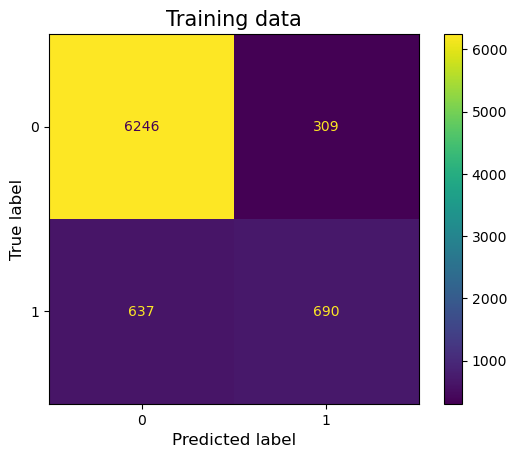

In [ ]:
plot_confusion_matrix(LDA, X_train, y_train)
plt.title('Training data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show();

In [ ]:
#Condfusion matrix for test data
confusion_matrix(y_test, y_test_predict_LDA)

array([[2690,  119],
       [ 286,  283]], dtype=int64)

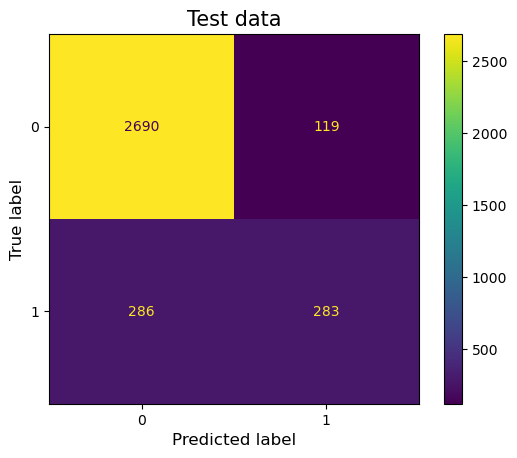

In [ ]:
plot_confusion_matrix(LDA, X_test, y_test)
plt.title('Test data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show();

In [ ]:
#Training data probability prediction
pred_prob_train = LDA.predict_proba(X_train)

#Test data probability prediction
pred_prob_test = LDA.predict_proba(X_test)

AUC for training data: 0.863
AUC for test data: 0.849


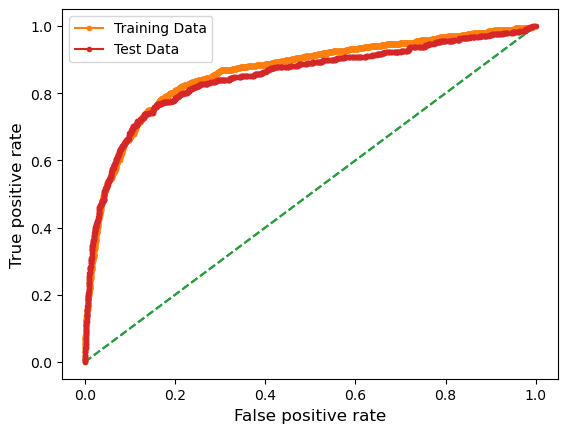

In [ ]:
#AUC and ROC for training data

#Calculate AUC
train_auc_LDA = metrics.roc_auc_score(y_train, pred_prob_train[:,1])
print('AUC for training data: %.3f' %train_auc_LDA)

#calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train, pred_prob_train[:,1])
plt.plot([0,1], [0,1], linestyle='--')

#plot roc curve for the model
plt.plot(fpr, tpr, marker='.', label = 'Training Data')

#AUC and ROC for test data

#Calculate AUC
test_auc_LDA = metrics.roc_auc_score(y_test, pred_prob_test[:,1])
print('AUC for test data: %.3f' %test_auc_LDA)

#calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob_test[:,1])
plt.plot([0,1], [0,1], linestyle='--')

#plot roc curve for the model
plt.plot(fpr, tpr, marker='.', label = 'Test Data')

#Labels
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)

# show the plot
plt.legend(loc='best')
plt.show();

# 2.4 LDA with balanced data

In [ ]:
LDA_SM = LinearDiscriminantAnalysis()
LDA_SM.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis()

In [ ]:
print('The intercept is', np.round(LDA_SM.intercept_,6))

The intercept is [0.994841]


In [ ]:
LDA_SM.coef_

array([[ 0.28001118,  0.06932289, -0.45109295, -0.0714135 ,  0.20055133,
        -0.75353513,  1.38435286,  0.17100642,  0.112427  , -1.38337441]])

In [ ]:
get_feature_importance(LDA_SM, X_train_res.columns)

Variables  Coefficients
6              Complain_LY      1.384353
0                City_Tier      0.280011
4           CC_Agent_Score      0.200551
7  Coupon_Used_For_Payment      0.171006
8             Login_Device      0.112427
1                  Payment      0.069323
3          Account_Segment     -0.071414
2                   Gender     -0.451093
5           Marital_Status     -0.753535
9                 Tenure_T     -1.383374

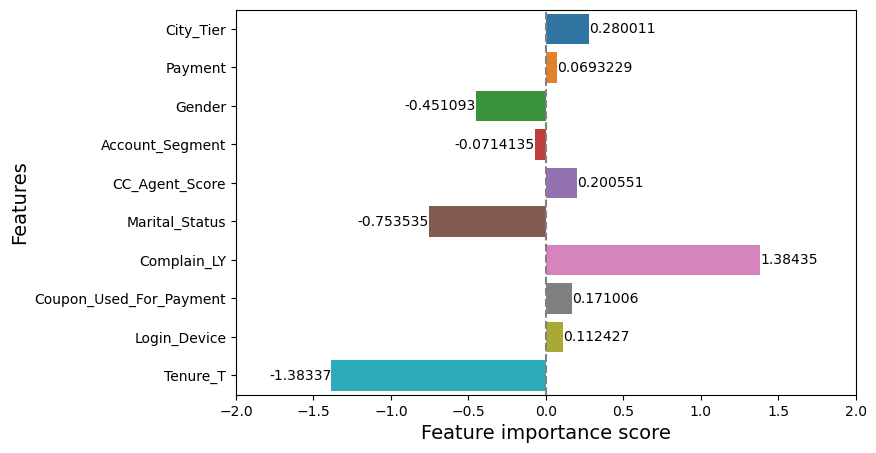

In [ ]:
plt.figure(figsize=(8,5))
feature_imp=pd.Series(LDA_SM.coef_[0],
                         index = ['City_Tier', 'Payment', 'Gender', 'Account_Segment', 'CC_Agent_Score',
       'Marital_Status', 'Complain_LY', 'Coupon_Used_For_Payment',
       'Login_Device', 'Tenure_T'])

bars_5 = sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature importance score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xlim(-2,2)
plt.axvline(x = 0, color = 'gray', linestyle = '--')
bars_5.bar_label(bars_5.containers[0])
plt.show();

In [ ]:
#Training data class prediction with a cut-off value of 0.5
y_train_predict_LDA_SM = LDA_SM.predict(X_train_res)

#Test data class prediction with a cut-off value of 0.5
y_test_predict_LDA_SM = LDA_SM.predict(X_test)

In [ ]:
print('Classification report of training data: \n\n', classification_report(y_train_res, y_train_predict_LDA_SM), '\n')
print('Classification report of test data: \n\n', classification_report(y_test, y_test_predict_LDA_SM))

Classification report of training data: 

               precision    recall  f1-score   support

           0       0.80      0.81      0.81      6555
           1       0.81      0.80      0.81      6555

    accuracy                           0.81     13110
   macro avg       0.81      0.81      0.81     13110
weighted avg       0.81      0.81      0.81     13110
 

Classification report of test data: 

               precision    recall  f1-score   support

           0       0.95      0.81      0.87      2809
           1       0.45      0.79      0.57       569

    accuracy                           0.80      3378
   macro avg       0.70      0.80      0.72      3378
weighted avg       0.87      0.80      0.82      3378



In [ ]:
#Confusion matrix for training data
confusion_matrix(y_train_res, y_train_predict_LDA_SM)

array([[5302, 1253],
       [1294, 5261]], dtype=int64)

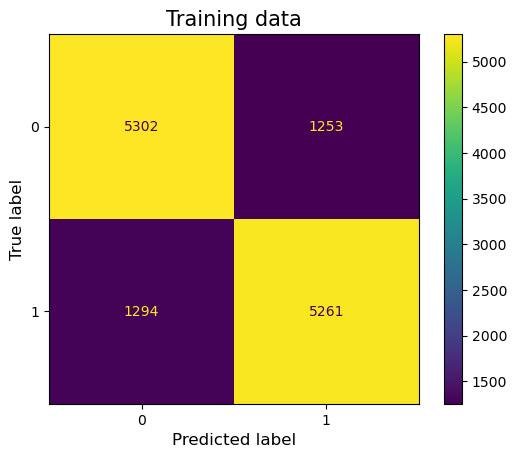

In [ ]:
plot_confusion_matrix(LDA_SM, X_train_res, y_train_res)
plt.title('Training data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show();

In [ ]:
#Confusion matrix for test data
confusion_matrix(y_test, y_test_predict_LDA_SM)

array([[2262,  547],
       [ 119,  450]], dtype=int64)

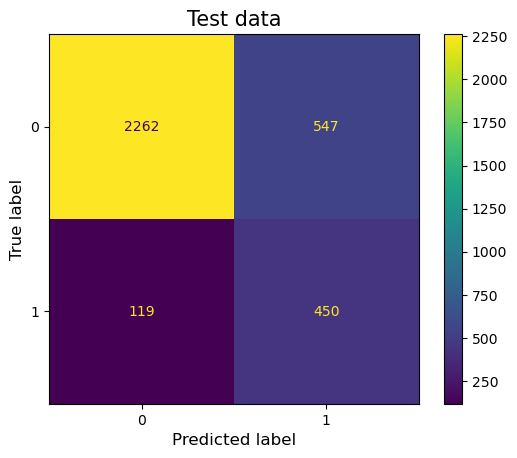

In [ ]:
plot_confusion_matrix(LDA_SM, X_test, y_test)
plt.title('Test data', fontsize = 15)
plt.xlabel('Predicted label', fontsize = 12)
plt.ylabel('True label', fontsize = 12)
plt.show();

In [ ]:
#Training data probability prediction
pred_prob_train_LDA_SM = LDA_SM.predict_proba(X_train_res)

#Test data probability prediction
pred_prob_test_LDA_SM = LDA_SM.predict_proba(X_test)

AUC for training data: 0.864
AUC for test data: 0.845


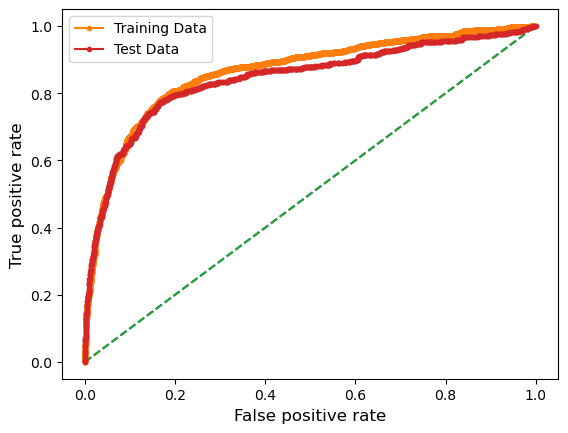

In [ ]:
#AUC and ROC for training data

#Calculate AUC
train_auc_LDA_SM = metrics.roc_auc_score(y_train_res, pred_prob_train_LDA_SM[:,1])
print('AUC for training data: %.3f' %train_auc_LDA_SM)

#calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_res, pred_prob_train_LDA_SM[:,1])
plt.plot([0,1], [0,1], linestyle='--')

#plot roc curve for the model
plt.plot(fpr, tpr, marker='.', label = 'Training Data')

#AUC and ROC for test data

#Calculate AUC
test_auc_LDA_SM = metrics.roc_auc_score(y_test, pred_prob_test_LDA_SM[:,1])
print('AUC for test data: %.3f' %test_auc_LDA_SM)

#calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob_test_LDA_SM[:,1])
plt.plot([0,1], [0,1], linestyle='--')

#plot roc curve for the model
plt.plot(fpr, tpr, marker='.', label = 'Test Data')

#Labels
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)

# show the plot
plt.legend(loc='best')
plt.show();

# LDA with hypertuning parameters

In [ ]:
param_grid = {'solver': ['svd', 'lsqr'],
              'shrinkage': ['None', 'auto'],
              'n_components': [None] + [2, 5, 8]
}

In [ ]:
grid_search = GridSearchCV(estimator=LinearDiscriminantAnalysis(), param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(),
             param_grid={'n_components': [None, 2, 5, 8],
                         'shrinkage': ['None', 'auto'],
                         'solver': ['svd', 'lsqr']},
             verbose=True)

In [ ]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'n_components': None, 'shrinkage': 'auto', 'solver': 'lsqr'} 

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')


In [ ]:
LDA_tuned = grid_search.best_estimator_

In [ ]:
np.round(LDA_tuned.intercept_,6)

array([-1.094651])

In [ ]:
LDA_tuned.coef_

array([[ 0.25521264,  0.09127395, -0.18814513, -0.10853465,  0.25740576,
        -0.60284852,  1.81826958,  0.15239148,  0.43429933, -1.42053144]])

In [ ]:
get_feature_importance(LDA_tuned, X_train.columns)

Variables  Coefficients
6              Complain_LY      1.818270
8             Login_Device      0.434299
4           CC_Agent_Score      0.257406
0                City_Tier      0.255213
7  Coupon_Used_For_Payment      0.152391
1                  Payment      0.091274
3          Account_Segment     -0.108535
2                   Gender     -0.188145
5           Marital_Status     -0.602849
9                 Tenure_T     -1.420531

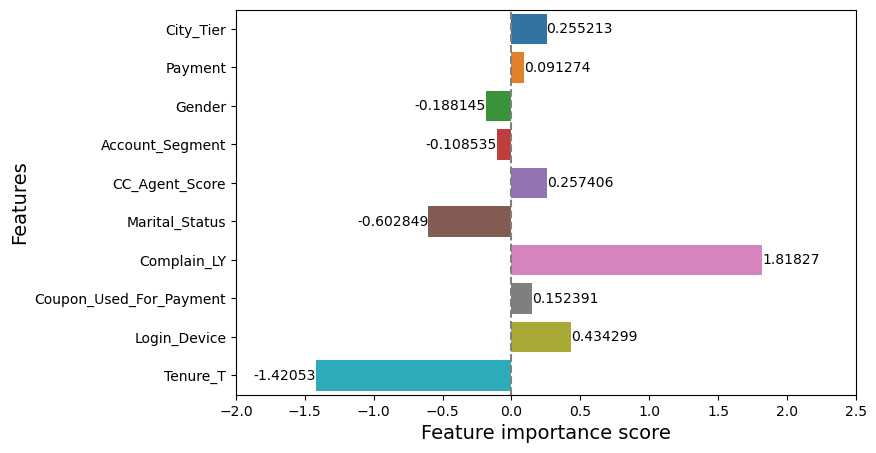

In [ ]:
plt.figure(figsize=(8,5))
feature_imp=pd.Series(LDA_tuned.coef_[0],
                         index = ['City_Tier', 'Payment', 'Gender', 'Account_Segment', 'CC_Agent_Score',
       'Marital_Status', 'Complain_LY', 'Coupon_Used_For_Payment',
       'Login_Device', 'Tenure_T'])

bars_6 = sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature importance score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.axvline(x = 0, color = 'gray', linestyle = '--')
plt.xlim(-2,2.5)
bars_6.bar_label(bars_6.containers[0])
plt.show();

In [ ]:
#Training data class prediction with a cut-off value of 0.5
y_train_predict_LDA_tuned = LDA_tuned.predict(X_train)

#Test data class prediction with a cut-off value of 0.5
y_test_predict_LDA_tuned = LDA_tuned.predict(X_test)

In [ ]:
print('Classification report of training data: \n\n', classification_report(y_train, y_train_predict_LDA_tuned), '\n')
print('Classification report of test data: \n\n', classification_report(y_test, y_test_predict_LDA_tuned))

Classification report of training data: 

               precision    recall  f1-score   support

           0       0.91      0.95      0.93      6555
           1       0.69      0.52      0.59      1327

    accuracy                           0.88      7882
   macro avg       0.80      0.74      0.76      7882
weighted avg       0.87      0.88      0.87      7882
 

Classification report of test data: 

               precision    recall  f1-score   support

           0       0.91      0.96      0.93      2809
           1       0.70      0.51      0.59       569

    accuracy                           0.88      3378
   macro avg       0.80      0.73      0.76      3378
weighted avg       0.87      0.88      0.87      3378



In [ ]:
cross_val_score(LDA_tuned, X_train, y_train, cv = 5)

array([0.87571338, 0.88332276, 0.88388325, 0.8680203 , 0.88007614])

In [ ]:
cross_val_score(LDA_tuned, X_train, y_train, cv = 5).mean()

0.8782031680019571

In [ ]:
#Condfusion matrix for training data
confusion_matrix(y_train, y_train_predict_LDA_tuned)

array([[6245,  310],
       [ 635,  692]], dtype=int64)

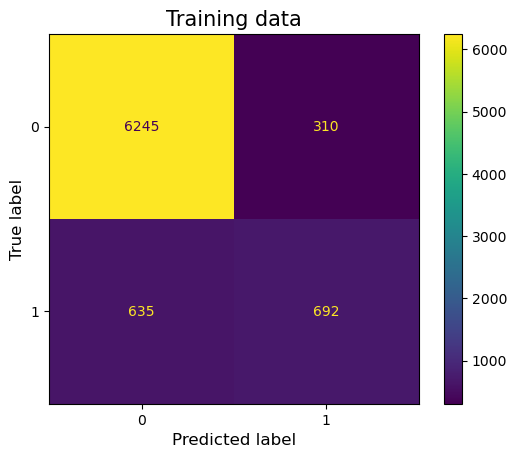

In [ ]:
plot_confusion_matrix(LDA_tuned, X_train, y_train)
plt.title('Training data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show();

In [ ]:
#Condfusion matrix for test data
confusion_matrix(y_test, y_test_predict_LDA_tuned)

array([[2688,  121],
       [ 281,  288]], dtype=int64)

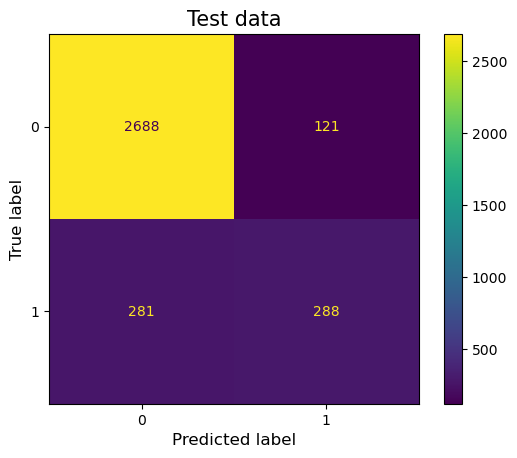

In [ ]:
plot_confusion_matrix(LDA_tuned, X_test, y_test)
plt.title('Test data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show();

In [ ]:
#Training data probability prediction
pred_prob_train_LDA_tuned = LDA_tuned.predict_proba(X_train)

#Test data probability prediction
pred_prob_test_LDA_tuned = LDA_tuned.predict_proba(X_test)

AUC for training data: 0.862
AUC for test data: 0.848


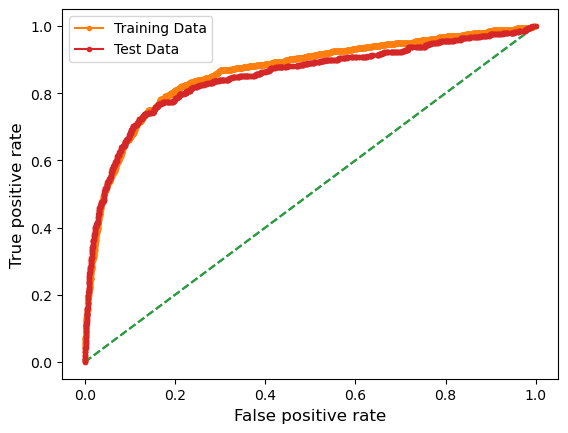

In [ ]:
#AUC and ROC for training data

#Calculate AUC
train_auc_LDA_tuned = metrics.roc_auc_score(y_train, pred_prob_train_LDA_tuned[:,1])
print('AUC for training data: %.3f' %train_auc_LDA_tuned)

#calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train, pred_prob_train_LDA_tuned[:,1])
plt.plot([0,1], [0,1], linestyle='--')

#plot roc curve for the model
plt.plot(fpr, tpr, marker='.', label = 'Training Data')

#AUC and ROC for test data

#Calculate AUC
test_auc_LDA_tuned = metrics.roc_auc_score(y_test, pred_prob_test_LDA_tuned[:,1])
print('AUC for test data: %.3f' %test_auc_LDA_tuned)

#calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob_test_LDA_tuned[:,1])
plt.plot([0,1], [0,1], linestyle='--')

#plot roc curve for the model
plt.plot(fpr, tpr, marker='.', label = 'Test Data')

#Labels
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)

# show the plot
plt.legend(loc='best')
plt.show();

# 2.5 Naïve Bayes Model with unbalanced data

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
#Prediction on training and test datasets
y_train_predict_NB = NB_model.predict(X_train)
y_test_predict_NB = NB_model.predict(X_test)

In [ ]:
print('Classification report for training data: \n\n', classification_report(y_train, y_train_predict_NB), '\n')
print('Classification report for test data: \n\n', classification_report(y_test, y_test_predict_NB))

Classification report for training data: 

               precision    recall  f1-score   support

           0       0.91      0.94      0.92      6555
           1       0.63      0.53      0.58      1327

    accuracy                           0.87      7882
   macro avg       0.77      0.73      0.75      7882
weighted avg       0.86      0.87      0.86      7882
 

Classification report for test data: 

               precision    recall  f1-score   support

           0       0.90      0.95      0.93      2809
           1       0.66      0.50      0.57       569

    accuracy                           0.87      3378
   macro avg       0.78      0.73      0.75      3378
weighted avg       0.86      0.87      0.87      3378



In [ ]:
#Confusion matrix for training data
confusion_matrix(y_train, y_train_predict_NB)

array([[6150,  405],
       [ 628,  699]], dtype=int64)

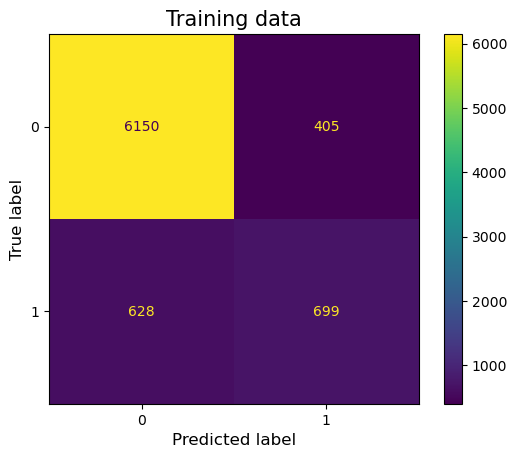

In [ ]:
plot_confusion_matrix(NB_model, X_train, y_train)
plt.title('Training data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show();

In [ ]:
#Confusion Matrix for test data
confusion_matrix(y_test, y_test_predict_NB)

array([[2664,  145],
       [ 283,  286]], dtype=int64)

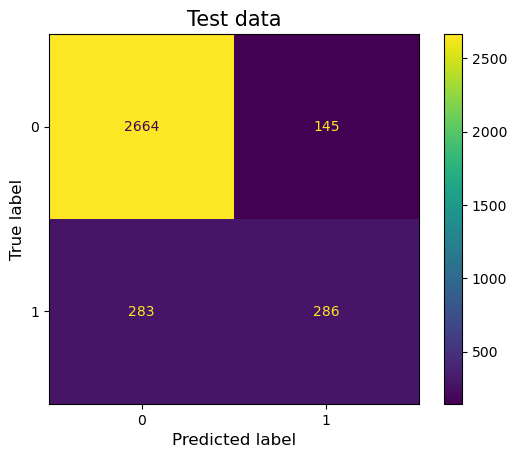

In [ ]:
plot_confusion_matrix(NB_model, X_test, y_test)
plt.title('Test data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show();

In [ ]:
#Training data prob prediction
predict_prob_train_NB = NB_model.predict_proba(X_train)

#Test data prob prediction
predict_prob_test_NB = NB_model.predict_proba(X_test)

AUC for training data: 0.857
AUC for test data: 0.840


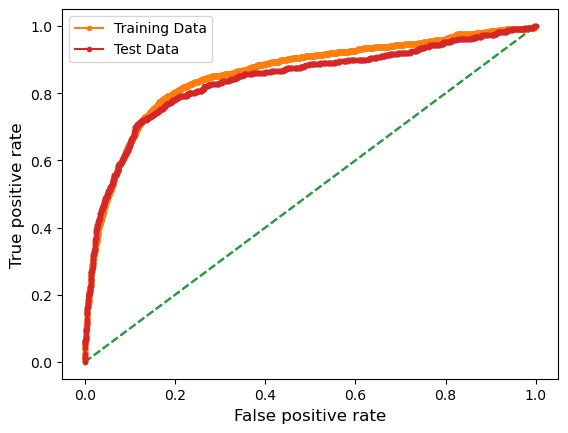

In [ ]:
#AUC and ROC for training data

#Calculate AUC
train_auc_NB = metrics.roc_auc_score(y_train, predict_prob_train_NB[:,1])
print('AUC for training data: %.3f' %train_auc_NB)

#calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train, predict_prob_train_NB[:,1])
plt.plot([0,1], [0,1], linestyle='--')

#plot roc curve for the model
plt.plot(fpr, tpr, marker='.', label='Training Data')

#Labels
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)

#AUC and ROC for test data

#Calculate AUC
test_auc_NB = metrics.roc_auc_score(y_test, predict_prob_test_NB[:,1])
print('AUC for test data: %.3f' %test_auc_NB)

#calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_prob_test_NB[:,1])
plt.plot([0,1], [0,1], linestyle='--')

#plot roc curve for the model
plt.plot(fpr, tpr, marker='.', label='Test Data')

#Labels
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)

plt.legend()
plt.show();

# 2.6 Naïve Bayes Model with balanced data

In [ ]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [ ]:
#Predictions on training and test data
y_train_predict_NB_SM = NB_SM_model.predict(X_train_res)
y_test_predict_NB_SM = NB_SM_model.predict(X_test)

In [ ]:
print('Classification report of training data: \n\n', classification_report(y_train_res, y_train_predict_NB_SM), '\n')
print('Classification report of test data: \n\n', classification_report(y_test, y_test_predict_NB_SM))

Classification report of training data: 

               precision    recall  f1-score   support

           0       0.80      0.80      0.80      6555
           1       0.80      0.80      0.80      6555

    accuracy                           0.80     13110
   macro avg       0.80      0.80      0.80     13110
weighted avg       0.80      0.80      0.80     13110
 

Classification report of test data: 

               precision    recall  f1-score   support

           0       0.94      0.80      0.87      2809
           1       0.44      0.77      0.56       569

    accuracy                           0.79      3378
   macro avg       0.69      0.78      0.71      3378
weighted avg       0.86      0.79      0.81      3378



In [ ]:
#Confusion matrix for training data
metrics.confusion_matrix(y_train_res, y_train_predict_NB_SM)

array([[5248, 1307],
       [1298, 5257]], dtype=int64)

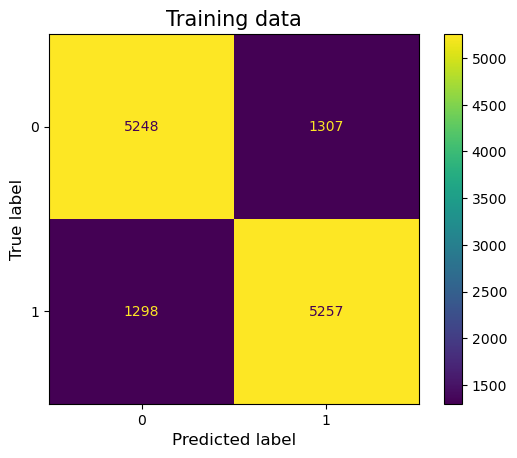

In [ ]:
plot_confusion_matrix(NB_SM_model, X_train_res, y_train_res)
plt.title('Training data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show();

In [ ]:
#Confusion matrix for test data
metrics.confusion_matrix(y_test, y_test_predict_NB_SM)

array([[2248,  561],
       [ 132,  437]], dtype=int64)

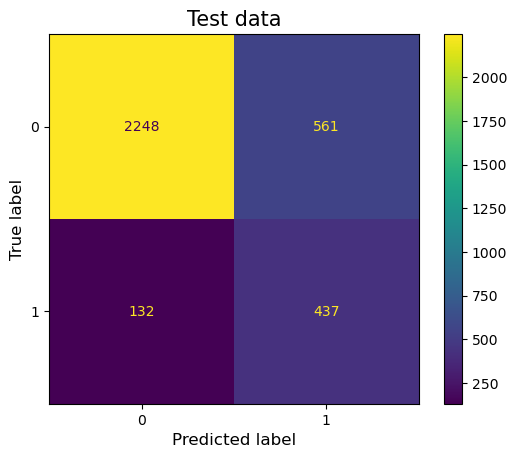

In [ ]:
plot_confusion_matrix(NB_SM_model, X_test, y_test)
plt.title('Test data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show();

In [ ]:
#Training data probability prediction
predict_prob_train_NB_SM = NB_SM_model.predict_proba(X_train_res)

#Test data probability prediction
predict_prob_test_NB_SM = NB_SM_model.predict_proba(X_test)

AUC for training data: 0.855
AUC for test data: 0.832


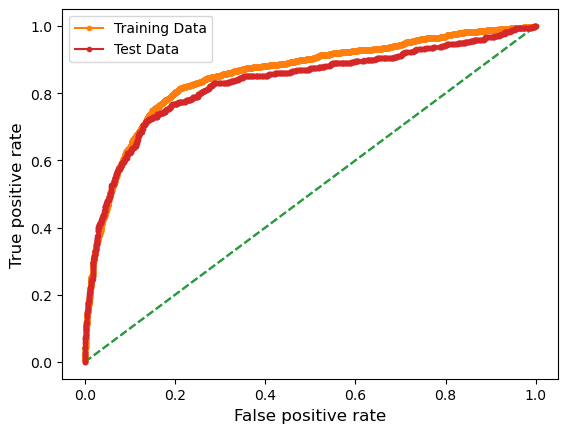

In [ ]:
#AUC and ROC for training data

#Calculate AUC
train_auc_NB_SM = metrics.roc_auc_score(y_train_res, predict_prob_train_NB_SM[:,1])
print('AUC for training data: %.3f' %train_auc_NB_SM)

#calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_res, predict_prob_train_NB_SM[:,1])
plt.plot([0,1], [0,1], linestyle='--')

#plot roc curve for the model
plt.plot(fpr, tpr, marker='.', label = 'Training Data')

#AUC and ROC for test data

#Calculate AUC
test_auc_NB_SM = metrics.roc_auc_score(y_test, predict_prob_test_NB_SM[:,1])
print('AUC for test data: %.3f' %test_auc_NB_SM)

#calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_prob_test_NB_SM[:,1])
plt.plot([0,1], [0,1], linestyle='--')

#plot roc curve for the model
plt.plot(fpr, tpr, marker='.', label = 'Test Data')

#Labels
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)

# show the plot
plt.legend(loc='best')
plt.show();

In [ ]:
cross_val_score(LDA_SM, X_train_res, y_train_res, cv=5)

array([0.79710145, 0.81350114, 0.81235698, 0.80091533, 0.80282227])

In [ ]:
cross_val_score(LDA_SM, X_train_res, y_train_res, cv=5).mean()

0.8053394355453852

# SVM with unbalanced data

In [ ]:
from sklearn import svm

In [ ]:
SVM = svm.SVC()
SVM.fit(X_train, y_train)

SVC()

In [ ]:
#Predictions on training and test data
y_train_predict_SVM = SVM.predict(X_train)
y_test_predict_SVM = SVM.predict(X_test)

In [ ]:
print('Classification report for training data: \n\n', classification_report(y_train, y_train_predict_SVM), '\n')
print('Classification report for test data: \n\n', classification_report(y_test, y_test_predict_SVM))

Classification report for training data: 

               precision    recall  f1-score   support

           0       0.91      0.97      0.94      6555
           1       0.81      0.53      0.64      1327

    accuracy                           0.90      7882
   macro avg       0.86      0.75      0.79      7882
weighted avg       0.89      0.90      0.89      7882
 

Classification report for test data: 

               precision    recall  f1-score   support

           0       0.91      0.98      0.94      2809
           1       0.83      0.49      0.62       569

    accuracy                           0.90      3378
   macro avg       0.87      0.74      0.78      3378
weighted avg       0.89      0.90      0.89      3378



In [ ]:
cross_val_score(SVM, X_train, y_train, cv=5)

array([0.88522511, 0.89473684, 0.89340102, 0.88705584, 0.89403553])

In [ ]:
cross_val_score(SVM, X_train, y_train, cv=5).mean()

0.8908908677724522

In [ ]:
#Confusion matrix for training data
confusion_matrix(y_train, y_train_predict_SVM)

array([[6387,  168],
       [ 628,  699]], dtype=int64)

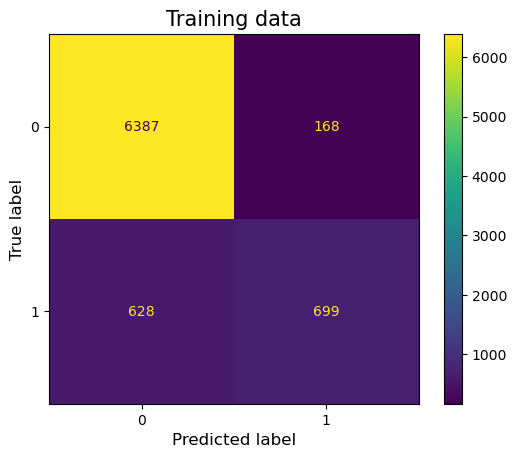

In [ ]:
plot_confusion_matrix(SVM, X_train, y_train)
plt.title('Training data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show();

In [ ]:
#Confustion matrix for test data
confusion_matrix(y_test, y_test_predict_SVM)

array([[2751,   58],
       [ 288,  281]], dtype=int64)

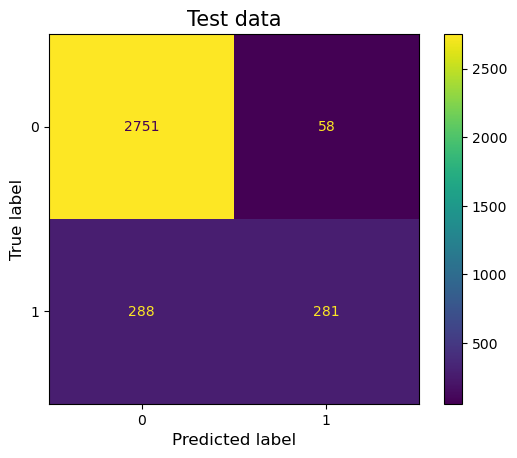

In [ ]:
plot_confusion_matrix(SVM, X_test, y_test)
plt.title('Test data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show();

In [ ]:
#Training data probability prediction
predict_prob_train_SVM = SVM.decision_function(X_train)

#Test data probability prediction
predict_prob_test_SVM = SVM.decision_function(X_test)

AUC for training data: 0.905
AUC for test data: 0.897


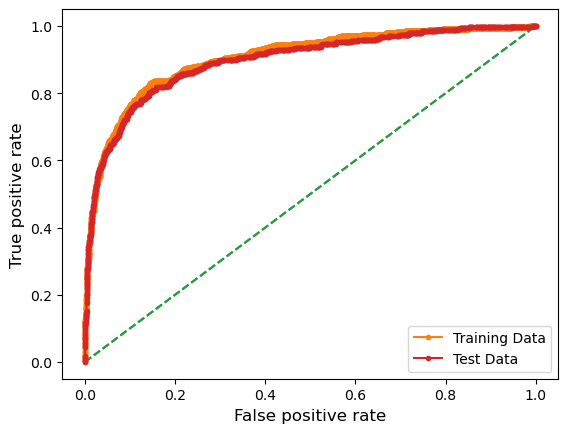

In [ ]:
#AUC and ROC for training data

#Calculate AUC
train_auc_SVM = metrics.roc_auc_score(y_train, predict_prob_train_SVM)
print('AUC for training data: %.3f' %train_auc_SVM)

#calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train, predict_prob_train_SVM)
plt.plot([0,1], [0,1], linestyle='--')

#plot roc curve for the model
plt.plot(fpr, tpr, marker='.', label = 'Training Data')

#AUC and ROC for test data

#Calculate AUC
test_auc_SVM = metrics.roc_auc_score(y_test, predict_prob_test_SVM)
print('AUC for test data: %.3f' %test_auc_SVM)

#calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_prob_test_SVM)
plt.plot([0,1], [0,1], linestyle='--')

#plot roc curve for the model
plt.plot(fpr, tpr, marker='.', label = 'Test Data')

#Labels
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)

# show the plot
plt.legend(loc='best')
plt.show();

# SVM with balanced data

In [ ]:
SVM.fit(X_train_res, y_train_res)

SVC()

In [ ]:
#Predictions on training and test data
y_train_predict_SVM_SM = SVM.predict(X_train_res)
y_test_predict_SVM_SM = SVM.predict(X_test)

In [ ]:
print('Classification report for training data: \n\n', classification_report(y_train_res, y_train_predict_SVM_SM), '\n')
print('Classification report for test data: \n\n', classification_report(y_test, y_test_predict_SVM_SM))

Classification report for training data: 

               precision    recall  f1-score   support

           0       0.88      0.85      0.86      6555
           1       0.85      0.88      0.87      6555

    accuracy                           0.87     13110
   macro avg       0.87      0.87      0.87     13110
weighted avg       0.87      0.87      0.87     13110
 

Classification report for test data: 

               precision    recall  f1-score   support

           0       0.96      0.86      0.90      2809
           1       0.54      0.82      0.65       569

    accuracy                           0.85      3378
   macro avg       0.75      0.84      0.78      3378
weighted avg       0.89      0.85      0.86      3378



In [ ]:
cross_val_score(SVM, X_train_res, y_train_res, cv=5)

array([0.84935164, 0.86536995, 0.86231884, 0.85774218, 0.85545385])

In [ ]:
cross_val_score(SVM, X_train_res, y_train_res, cv=5).mean()

0.8580472921434019

In [ ]:
#Confusion matrix for training data
confusion_matrix(y_train_res, y_train_predict_SVM_SM)

array([[5569,  986],
       [ 782, 5773]], dtype=int64)

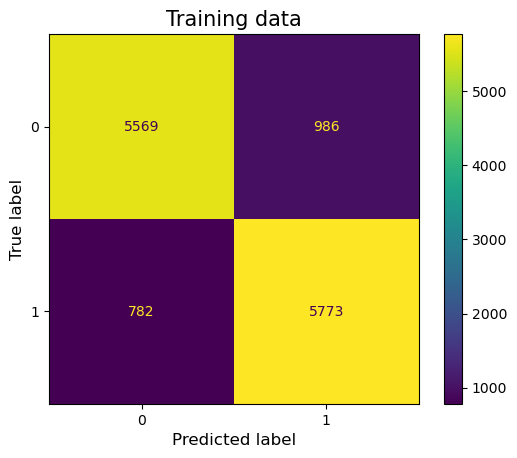

In [ ]:
plot_confusion_matrix(SVM, X_train_res, y_train_res)
plt.title('Training data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show();

In [ ]:
#Confusion matrix for test data
confusion_matrix(y_test, y_test_predict_SVM_SM)

array([[2404,  405],
       [ 101,  468]], dtype=int64)

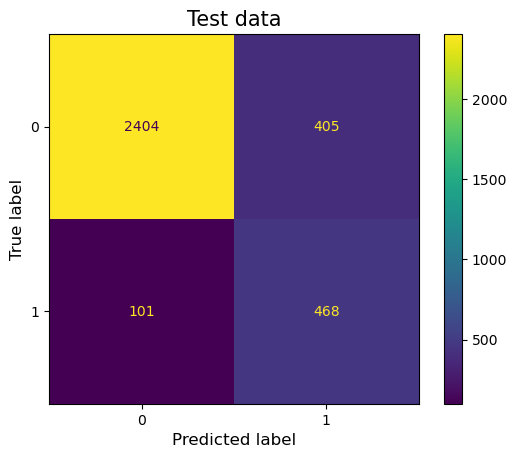

In [ ]:
plot_confusion_matrix(SVM, X_test, y_test)
plt.title('Test data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show();

In [ ]:
#Training data probability prediction
predict_prob_train_SVM_SM = SVM.decision_function(X_train_res)

#Test data probability prediction
predict_prob_test_SVM_SM = SVM.decision_function(X_test)

AUC for training data: 0.931
AUC for test data: 0.903


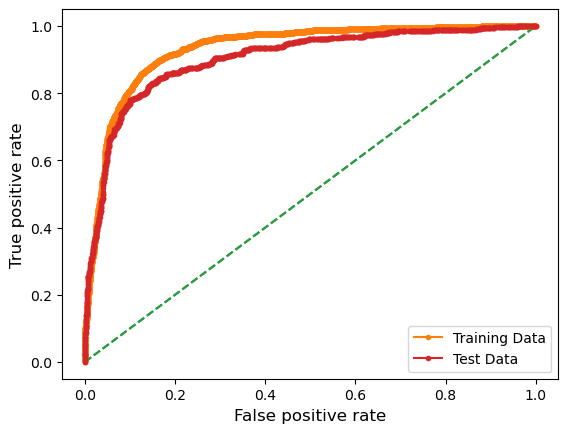

In [ ]:
#AUC and ROC for training data

#Calculate AUC
train_auc_SVM_SM = metrics.roc_auc_score(y_train_res, predict_prob_train_SVM_SM)
print('AUC for training data: %.3f' %train_auc_SVM_SM)

#calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_res, predict_prob_train_SVM_SM)
plt.plot([0,1], [0,1], linestyle='--')

#plot roc curve for the model
plt.plot(fpr, tpr, marker='.', label = 'Training Data')

#AUC and ROC for test data

#Calculate AUC
test_auc_SVM_SM = metrics.roc_auc_score(y_test, predict_prob_test_SVM_SM)
print('AUC for test data: %.3f' %test_auc_SVM_SM)

#calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_prob_test_SVM_SM)
plt.plot([0,1], [0,1], linestyle='--')

#plot roc curve for the model
plt.plot(fpr, tpr, marker='.', label = 'Test Data')

#Labels
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)

# show the plot
plt.legend(loc='best')
plt.show();

# KNN model with unbalanced data

**For non-parametric models such as KNN, Random Forest and Decision Tree, all variables will be used.**

In [ ]:
df_3.head()

Churn  City_Tier  Payment  Gender  Service_Score  Account_Segment  \
0      1          3        0       1              3                2   
1      1          1        1       0              3                1   
2      1          1        0       0              2                1   
3      1          3        0       0              2                2   
4      1          1        2       0              2                1   

   CC_Agent_Score  Marital_Status  Complain_LY  Rev_Growth_YoY  \
0               2               0            1            11.0   
1               3               0            1            15.0   
2               3               0            1            14.0   
3               5               0            0            23.0   
4               5               0            0            11.0   

   Coupon_Used_For_Payment  Login_Device  Tenure_T  CC_Contacted_LY_T  \
0                      1.0             0  1.609438           1.791759   
1                      0.0             0  0.000000           2.079442   
2                      0.0             0  0.000000           3.401197   
3                      0.0             0  0.000000           2.708050   
4                      1.0             0  0.000000           2.484907   

   Account_User_Count_T  Rev_Per_Month_T  Day_Since_CC_Connect_T  Cashback_T  
0              1.098612         2.197225                1.791759    5.080969  
1              1.386294         1.945910                0.000000    4.803201  
2              1.386294         1.791759                1.386294    5.113493  
3              1.386294         2.079442                1.386294    4.905793  
4              1.098612         1.098612                1.386294    4.872139

In [ ]:
X_1 = df_3.drop('Churn', axis = 1)
y_1 = df_3['Churn']

In [ ]:
print('The shape of matric X is', X_1.shape)
print('Size of y is', len(y_1))

The shape of matric X is (11260, 17)
Size of y is 11260


In [ ]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size = 0.30,
                                                            random_state = 1, stratify = df_3['Churn'])

In [ ]:
X_1_train.head()

City_Tier  Payment  Gender  Service_Score  Account_Segment  \
799           1        0       0              3                1   
7530          3        4       0              2                1   
6908          3        4       0              3                3   
3251          3        4       0              3                3   
5553          3        4       0              3                2   

      CC_Agent_Score  Marital_Status  Complain_LY  Rev_Growth_YoY  \
799                3               2            1            14.0   
7530               4               1            0            15.0   
6908               5               0            0            13.0   
3251               5               2            0            12.0   
5553               1               0            0            15.0   

      Coupon_Used_For_Payment  Login_Device  Tenure_T  CC_Contacted_LY_T  \
799                       1.0             0  2.197225           2.484907   
7530                      2.0             0  1.098612           2.944439   
6908                      3.5             0  2.564949           3.258097   
3251                      2.0             0  3.295837           2.302585   
5553                      2.0             0  0.693147           2.772589   

      Account_User_Count_T  Rev_Per_Month_T  Day_Since_CC_Connect_T  \
799               1.098612         0.000000                1.098612   
7530              1.098612         1.098612                1.098612   
6908              1.098612         1.609438                2.397895   
3251              1.386294         1.609438                2.890372   
5553              1.386294         1.098612                2.197225   

      Cashback_T  
799     4.913096  
7530    4.843951  
6908    5.482346  
3251    5.685483  
5553    5.118293

In [ ]:
print('TRAINING SET')
print('No. of rows:', X_1_train.shape[0])
print('No. of columns:', X_1_train.shape[1])

TRAINING SET
No. of rows: 7882
No. of columns: 17


In [ ]:
X_1_test.head()

City_Tier  Payment  Gender  Service_Score  Account_Segment  \
6888          1        0       0              3                1   
467           1        1       1              2                3   
2347          1        0       0              2                4   
1794          1        0       1              2                1   
3125          1        2       0              3                4   

      CC_Agent_Score  Marital_Status  Complain_LY  Rev_Growth_YoY  \
6888               4               1            0            24.0   
467                2               2            1            11.0   
2347               1               0            0            11.0   
1794               3               1            0            11.0   
3125               3               2            1            13.0   

      Coupon_Used_For_Payment  Login_Device  Tenure_T  CC_Contacted_LY_T  \
6888                      1.0             1  2.302585           2.995732   
467                       3.0             0  3.044522           2.079442   
2347                      2.0             1  2.197225           3.178054   
1794                      1.0             1  2.564949           2.639057   
3125                      1.0             0  0.693147           3.091042   

      Account_User_Count_T  Rev_Per_Month_T  Day_Since_CC_Connect_T  \
6888              0.667089         0.693147                1.098612   
467               1.098612         0.693147                0.000000   
2347              1.098612         1.098612                1.098612   
1794              1.098612         0.693147                2.079442   
3125              1.386294         2.197225                2.197225   

      Cashback_T  
6888    5.113493  
467     5.592925  
2347    5.271049  
1794    4.931231  
3125    5.568726

In [ ]:
print('Test SET')
print('No. of rows:', X_1_test.shape[0])
print('No. of columns:', X_1_test.shape[1])

Test SET
No. of rows: 3378
No. of columns: 17


In [ ]:
y_1_train.value_counts(1)

0    0.831642
1    0.168358
Name: Churn, dtype: float64

In [ ]:
y_1_test.value_counts(1)

0    0.831557
1    0.168443
Name: Churn, dtype: float64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_1_train, y_1_train)

KNeighborsClassifier()

In [ ]:
y_train_predict_KNN = KNN_model.predict(X_1_train)
y_test_predict_KNN = KNN_model.predict(X_1_test)

In [ ]:
print('Classification report of training data: \n\n', classification_report(y_1_train, y_train_predict_KNN))
print('Classification report of test data: \n\n', classification_report(y_1_test, y_test_predict_KNN))

Classification report of training data: 

               precision    recall  f1-score   support

           0       0.97      0.99      0.98      6555
           1       0.96      0.87      0.91      1327

    accuracy                           0.97      7882
   macro avg       0.97      0.93      0.95      7882
weighted avg       0.97      0.97      0.97      7882

Classification report of test data: 

               precision    recall  f1-score   support

           0       0.96      0.99      0.97      2809
           1       0.92      0.77      0.84       569

    accuracy                           0.95      3378
   macro avg       0.94      0.88      0.91      3378
weighted avg       0.95      0.95      0.95      3378



In [ ]:
#Confusion matrix for training data
confusion_matrix(y_1_train, y_train_predict_KNN)

array([[6502,   53],
       [ 172, 1155]], dtype=int64)

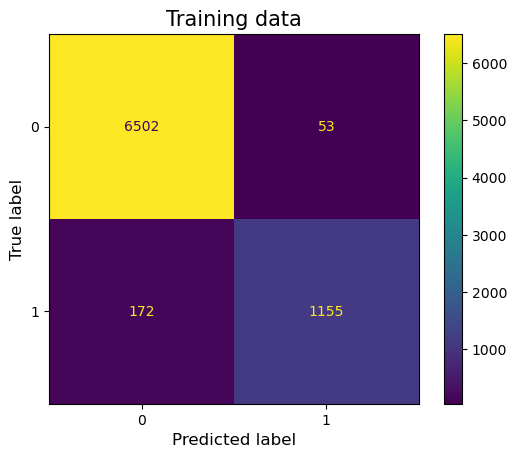

In [ ]:
plot_confusion_matrix(KNN_model, X_1_train, y_1_train)
plt.title('Training data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show();

In [ ]:
#Confusion matrix for test data
confusion_matrix(y_1_test, y_test_predict_KNN)

array([[2772,   37],
       [ 130,  439]], dtype=int64)

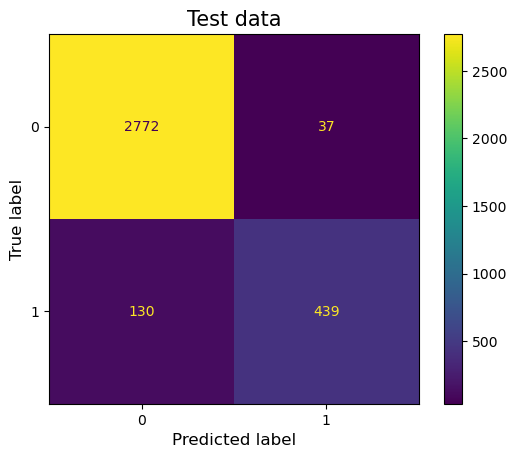

In [ ]:
plot_confusion_matrix(KNN_model, X_1_test, y_1_test)
plt.title('Test data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show();

In [ ]:
#Training data probability prediction
predict_prob_train_KNN = KNN_model.predict_proba(X_1_train)

#Test data probability prediction
predict_prob_test_KNN = KNN_model.predict_proba(X_1_test)

AUC for training data: 0.994
AUC for test data: 0.971


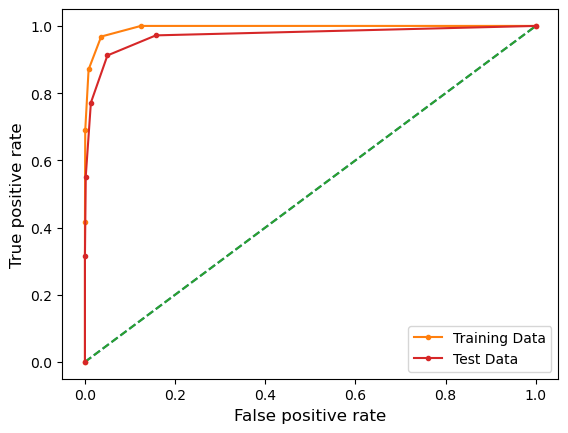

In [ ]:
#AUC and ROC for training data

#Calculate AUC
train_auc_KNN = metrics.roc_auc_score(y_train, predict_prob_train_KNN[:,1])
print('AUC for training data: %.3f' %train_auc_KNN)

#calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train, predict_prob_train_KNN[:,1])
plt.plot([0,1], [0,1], linestyle='--')

#plot roc curve for the model
plt.plot(fpr, tpr, marker='.', label = 'Training Data')

#AUC and ROC for test data

#Calculate AUC
test_auc_KNN = metrics.roc_auc_score(y_test, predict_prob_test_KNN[:,1])
print('AUC for test data: %.3f' %test_auc_KNN)

#calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_prob_test_KNN[:,1])
plt.plot([0,1], [0,1], linestyle='--')

#plot roc curve for the model
plt.plot(fpr, tpr, marker='.', label = 'Test Data')

#Labels
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)

# show the plot
plt.legend(loc='best')
plt.show();

# KNN with hypertuning parameteres

Run the KNN with no of neighbours to be 1, 3, 5...19

Find the optimal number of neighbours from K = 1, 3, 5, 7...19 using the misclassification error

In [ ]:
# Empty list that will hold accuracy scores
ac_scores = []

# Perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_1_train, y_1_train)
    #Evaluate test accuracy
        score = knn.score(X_1_test, y_1_test)
        ac_scores.append(score)
#Changing to misclassification error

MCE = [1-x for x in ac_scores]
np.round(MCE, 5)

array([0.03079, 0.03641, 0.04944, 0.0598 , 0.07401, 0.08585, 0.09059,
       0.09739, 0.09888, 0.1045 ])

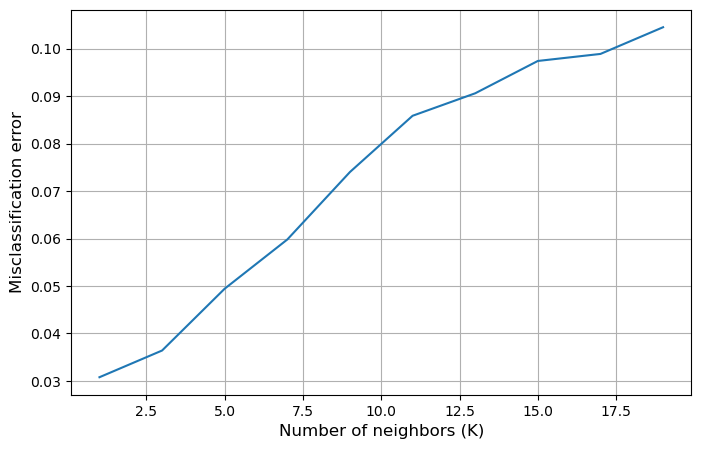

In [ ]:
# Plot misclassification error vs k
plt.figure(figsize=(8,5))
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of neighbors (K)', fontsize=12)
plt.ylabel('Misclassification error', fontsize=12)
plt.grid()
plt.show()

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    pred_train = model.predict(X_1_train)
    pred_test = model.predict(X_1_test)

    train_acc = model.score(X_1_train,y_1_train)
    test_acc = model.score(X_1_test,y_1_test)

    train_recall = metrics.recall_score(y_1_train,pred_train)
    test_recall = metrics.recall_score(y_1_test,pred_test)

    train_precision = metrics.precision_score(y_1_train,pred_train)
    test_precision = metrics.precision_score(y_1_test,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",np.round(model.score(X_1_train,y_1_train),4))
        print("Accuracy on test set : ", np.round(model.score(X_1_test,y_1_test),4))
        print("Recall on training set : ",np.round(metrics.recall_score(y_1_train,pred_train),4))
        print("Recall on test set : ",np.round(metrics.recall_score(y_1_test,pred_test),4))
        print("Precision on training set : ",np.round(metrics.precision_score(y_1_train,pred_train),4))
        print("Precision on test set : ",np.round(metrics.precision_score(y_1_test,pred_test),4))

    return score_list # returning the list with train and test scores

In [ ]:
KNN_model_1 = KNeighborsClassifier(n_neighbors = 3)
KNN_model_1.fit(X_1_train, y_1_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
KNN_model_1_scores = get_metrics_score(KNN_model_1)

Accuracy on training set :  0.983
Accuracy on test set :  0.9636
Recall on training set :  0.9322
Recall on test set :  0.8366
Precision on training set :  0.9657
Precision on test set :  0.9407


In [ ]:
KNN_model_2=KNeighborsClassifier(n_neighbors=2)
KNN_model_2.fit(X_1_train, y_1_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
KNN_model_2_scores = get_metrics_score(KNN_model_2)

Accuracy on training set :  0.9816
Accuracy on test set :  0.9559
Recall on training set :  0.8907
Recall on test set :  0.7557
Precision on training set :  1.0
Precision on test set :  0.9773


In [ ]:
KNN_model_3=KNeighborsClassifier(n_neighbors=7)
KNN_model_3.fit(X_1_train, y_1_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
KNN_model_3_scores = get_metrics_score(KNN_model_3)

Accuracy on training set :  0.9581
Accuracy on test set :  0.9402
Recall on training set :  0.7928
Recall on test set :  0.71
Precision on training set :  0.9503
Precision on test set :  0.9161


In [ ]:
param_grid = {'weights': ['uniform','distance'],
             'metric' : ['minkowski','euclidean','manhattan'],
             'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'p': [1, 2]}

In [ ]:
grid_search = GridSearchCV(estimator = KNeighborsClassifier(),
                           param_grid = param_grid, cv = 3, scoring = 'accuracy', n_jobs = -1, verbose = True)
grid_search.fit(X_1_train, y_1_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=True)

In [ ]:
print(grid_search.best_params_, '\n')
print(grid_search.best_estimator_)

{'algorithm': 'auto', 'metric': 'minkowski', 'p': 1, 'weights': 'distance'} 

KNeighborsClassifier(p=1, weights='distance')


In [ ]:
KNN_tuned = grid_search.best_estimator_

In [ ]:
y_train_predict_KNN_tuned = KNN_tuned.predict(X_1_train)
y_test_predict_KNN_tuned = KNN_tuned.predict(X_1_test)

In [ ]:
print('Classification report of training data: \n\n', classification_report(y_1_train, y_train_predict_KNN_tuned), '\n')
print('Classification report of test data: \n\n', classification_report(y_1_test, y_test_predict_KNN_tuned))

Classification report of training data: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882
 

Classification report of test data: 

               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2809
           1       0.97      0.89      0.93       569

    accuracy                           0.98      3378
   macro avg       0.98      0.94      0.96      3378
weighted avg       0.98      0.98      0.98      3378



In [ ]:
#Confusion matrix for training data
confusion_matrix(y_1_train, y_train_predict_KNN_tuned)

array([[6555,    0],
       [   0, 1327]], dtype=int64)

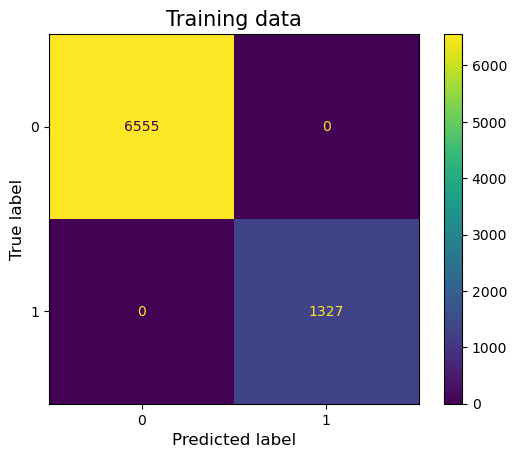

In [ ]:
plot_confusion_matrix(KNN_tuned, X_1_train, y_1_train)
plt.title('Training data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show();

In [ ]:
#Confusion matrix for test data
confusion_matrix(y_1_test, y_test_predict_KNN_tuned)

array([[2794,   15],
       [  60,  509]], dtype=int64)

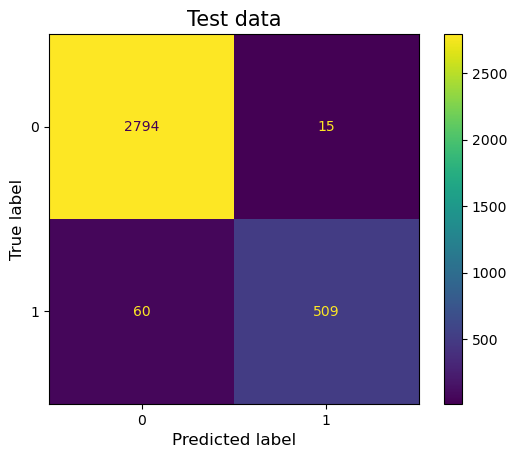

In [ ]:
plot_confusion_matrix(KNN_tuned, X_1_test, y_1_test)
plt.title('Test data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show();

In [ ]:
#Training data probability prediction
predict_prob_train_KNN_tuned = KNN_tuned.predict_proba(X_1_train)

#Test data probability prediction
predict_prob_test_KNN_tuned = KNN_tuned.predict_proba(X_1_test)

AUC for training data: 1.000
AUC for test data: 0.995


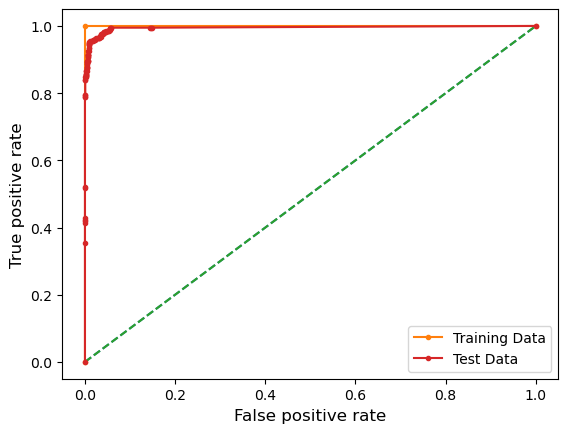

In [ ]:
#AUC and ROC for training data

#Calculate AUC
train_auc_KNN_tuned = metrics.roc_auc_score(y_1_train, predict_prob_train_KNN_tuned[:,1])
print('AUC for training data: %.3f' %train_auc_KNN_tuned)

#calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_train, predict_prob_train_KNN_tuned[:,1])
plt.plot([0,1], [0,1], linestyle='--')

#plot roc curve for the model
plt.plot(fpr, tpr, marker='.', label = 'Training Data')

#AUC and ROC for test data

#Calculate AUC
test_auc_KNN_tuned = metrics.roc_auc_score(y_1_test, predict_prob_test_KNN_tuned[:,1])
print('AUC for test data: %.3f' %test_auc_KNN_tuned)

#calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_test, predict_prob_test_KNN_tuned[:,1])
plt.plot([0,1], [0,1], linestyle='--')

#plot roc curve for the model
plt.plot(fpr, tpr, marker='.', label = 'Test Data')

#Labels
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)

# show the plot
plt.legend(loc='best')
plt.show();

# KNN model with balanced data

In [ ]:
X_1_train_res, y_1_train_res = sm.fit_resample(X_1_train, y_1_train)

In [ ]:
X_1_train_res.shape

(13110, 17)

In [ ]:
y_1_train_res.value_counts()

0    6555
1    6555
Name: Churn, dtype: int64

In [ ]:
KNN_SM_model = KNeighborsClassifier()
KNN_SM_model.fit(X_1_train_res, y_1_train_res)

KNeighborsClassifier()

In [ ]:
y_train_predict_KNN_SM = KNN_SM_model.predict(X_1_train_res)
y_test_predict_KNN_SM = KNN_SM_model.predict(X_1_test)

In [ ]:
print('Classification report of training data: \n\n', classification_report(y_1_train_res, y_train_predict_KNN_SM), '\n')
print('Classification report of test data: \n\n', classification_report(y_1_test, y_test_predict_KNN_SM))

Classification report of training data: 

               precision    recall  f1-score   support

           0       1.00      0.95      0.97      6555
           1       0.95      1.00      0.98      6555

    accuracy                           0.98     13110
   macro avg       0.98      0.98      0.98     13110
weighted avg       0.98      0.98      0.98     13110
 

Classification report of test data: 

               precision    recall  f1-score   support

           0       0.99      0.92      0.95      2809
           1       0.70      0.96      0.81       569

    accuracy                           0.92      3378
   macro avg       0.85      0.94      0.88      3378
weighted avg       0.94      0.92      0.93      3378



In [ ]:
#Confusion matrix for training data
confusion_matrix(y_1_train_res, y_train_predict_KNN_SM)

array([[6240,  315],
       [   8, 6547]], dtype=int64)

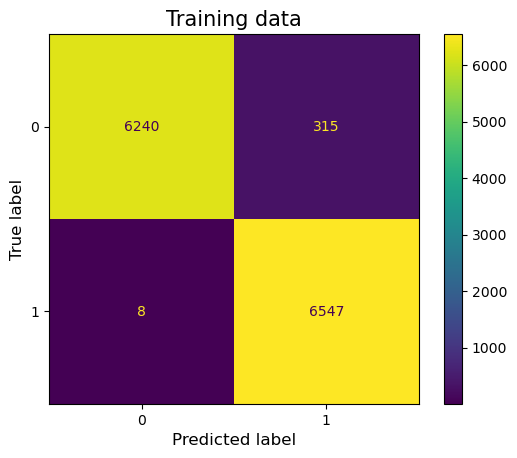

In [ ]:
plot_confusion_matrix(KNN_SM_model, X_1_train_res, y_1_train_res)
plt.title('Training data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show();

In [ ]:
#Confusion matrix for test data
confusion_matrix(y_1_test, y_test_predict_KNN_SM)

array([[2580,  229],
       [  25,  544]], dtype=int64)

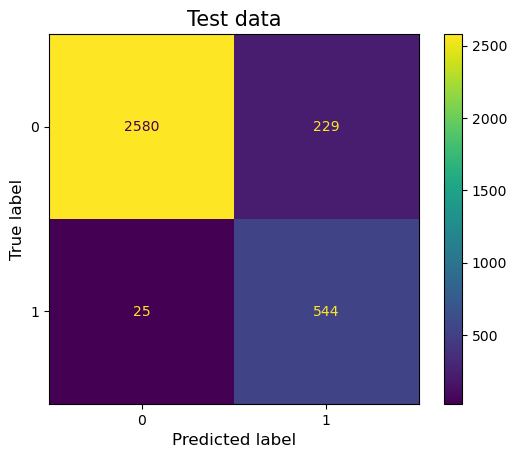

In [ ]:
plot_confusion_matrix(KNN_SM_model, X_1_test, y_1_test)
plt.title('Test data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show();

In [ ]:
#Training data probability prediction
predict_prob_train_KNN_SM = KNN_SM_model.predict_proba(X_1_train_res)

#Test data probability prediction
predict_prob_test_KNN_SM = KNN_SM_model.predict_proba(X_1_test)

AUC for training data: 1.000
AUC for training data: 0.977


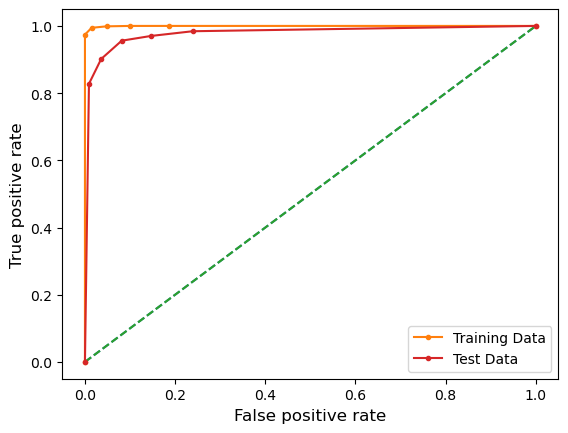

In [ ]:
#AUC and ROC for training data

#Calculate AUC
train_auc_KNN_SM = metrics.roc_auc_score(y_1_train_res, predict_prob_train_KNN_SM[:,1])
print('AUC for training data: %.3f' %train_auc_KNN_SM)

#calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_train_res, predict_prob_train_KNN_SM[:,1])
plt.plot([0,1], [0,1], linestyle='--')

#plot roc curve for the model
plt.plot(fpr, tpr, marker='.', label = 'Training Data')

#AUC and ROC for test data

#Calculate AUC
test_auc_KNN_SM = metrics.roc_auc_score(y_1_test, predict_prob_test_KNN_SM[:,1])
print('AUC for training data: %.3f' %test_auc_KNN_SM)

#calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_test, predict_prob_test_KNN_SM[:,1])
plt.plot([0,1], [0,1], linestyle='--')

#plot roc curve for the model
plt.plot(fpr, tpr, marker='.', label = 'Test Data')

#Labels
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)

# show the plot
plt.legend(loc='best')
plt.show();

# Random Forest with unbalanced data

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier(random_state=1, oob_score=True)
RF.fit(X_1_train, y_1_train)

RandomForestClassifier(oob_score=True, random_state=1)

In [ ]:
y_train_predict_RF = RF.predict(X_1_train)
y_test_predict_RF = RF.predict(X_1_test)

In [ ]:
print('Classification report for training data: \n\n', classification_report(y_1_train, y_train_predict_RF), '\n')
print('Classification report for test data: \n\n', classification_report(y_1_test, y_test_predict_RF))

Classification report for training data: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882
 

Classification report for test data: 

               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2809
           1       0.98      0.86      0.91       569

    accuracy                           0.97      3378
   macro avg       0.97      0.93      0.95      3378
weighted avg       0.97      0.97      0.97      3378



In [ ]:
#Confusion matrix for training data
metrics.confusion_matrix(y_1_train, y_train_predict_RF)

array([[6555,    0],
       [   0, 1327]], dtype=int64)

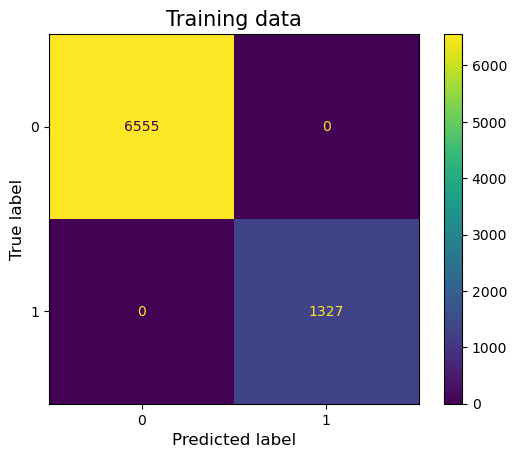

In [ ]:
plot_confusion_matrix(RF, X_1_train, y_1_train)
plt.title('Training data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show()

In [ ]:
#Confusion matrix for test data
confusion_matrix(y_1_test, y_test_predict_RF)

array([[2797,   12],
       [  82,  487]], dtype=int64)

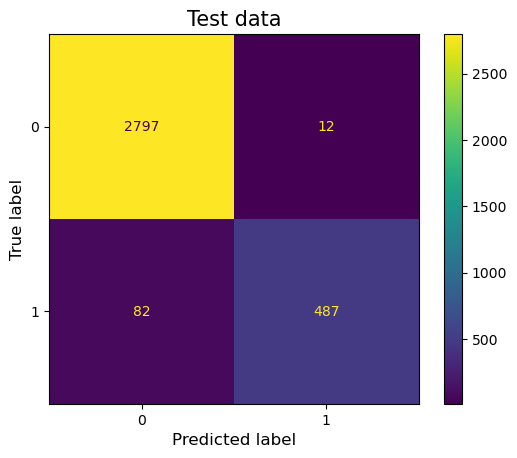

In [ ]:
plot_confusion_matrix(RF, X_1_test, y_1_test)
plt.title('Test data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show()

In [ ]:
#Training data prob prediction
predict_prob_train_RF = RF.predict_proba(X_1_train)

#Test data prob prediction
predict_prob_test_RF = RF.predict_proba(X_1_test)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.991


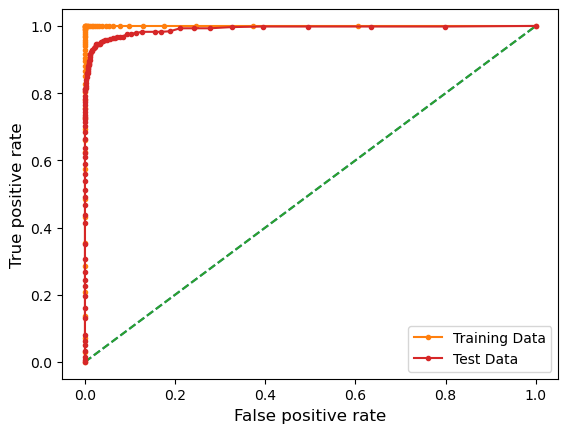

In [ ]:
# AUC and ROC for the training data

# calculate AUC
train_auc_RF = metrics.roc_auc_score(y_1_train,predict_prob_train_RF[:,1])
print('AUC for the Training Data: %.3f' % train_auc_RF)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_train,predict_prob_train_RF[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_RF = metrics.roc_auc_score(y_1_test,predict_prob_test_RF[:,1])
print('AUC for the Test Data: %.3f' % test_auc_RF)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_test,predict_prob_test_RF[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

#Labels
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)

# show the plot
plt.legend(loc='best')
plt.show();

In [ ]:
np.round(RF.oob_score_,4)

0.9675

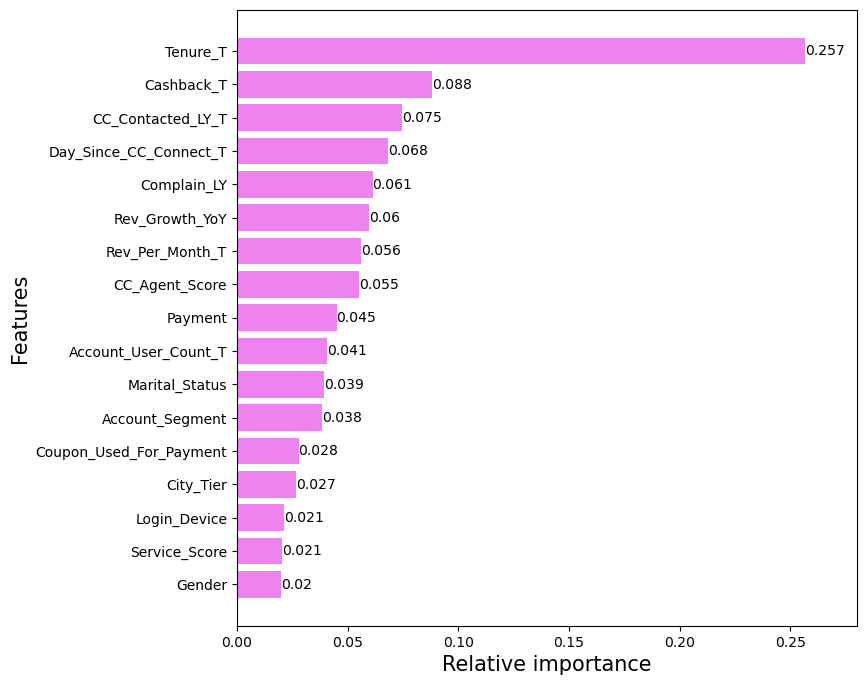

In [ ]:
importances = RF.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_1_train.columns)

plt.figure(figsize=(8,8))
bars_RF = plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative importance', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.xlim(0, 0.28)

for bar in bars_RF:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(bar.get_width(),3), va = 'center')

plt.show();

# Random Forest with hypertuning parameters

In [ ]:
rfcl = RandomForestClassifier(random_state=1, oob_score=True)

In [ ]:
param_grid = {
    'max_depth': [7, 10],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [301, 501]
}

In [ ]:
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)
grid_search.fit(X_1_train, y_1_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(oob_score=True, random_state=1),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [150, 300],
                         'n_estimators': [301, 501]})

In [ ]:
print(grid_search.best_params_)
print('\n')
print(grid_search.best_estimator_)

{'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 50, 'min_samples_split': 150, 'n_estimators': 301}


RandomForestClassifier(max_depth=7, max_features=6, min_samples_leaf=50,
                       min_samples_split=150, n_estimators=301, oob_score=True,
                       random_state=1)


In [ ]:
rfcl_tuned=RandomForestClassifier(max_depth=7, max_features=4, min_samples_leaf=50,
                       min_samples_split=150, n_estimators=501, oob_score=True,
                       random_state=1)

In [ ]:
rfcl_tuned.fit(X_1_train, y_1_train)

RandomForestClassifier(max_depth=7, max_features=4, min_samples_leaf=50,
                       min_samples_split=150, n_estimators=501, oob_score=True,
                       random_state=1)

In [ ]:
y_train_predict_RF_tuned = rfcl_tuned.predict(X_1_train)
y_test_predict_RF_tuned = rfcl_tuned.predict(X_1_test)

In [ ]:
print('Classification report for training data: \n\n', classification_report(y_1_train, y_train_predict_RF_tuned), '\n')
print('Classification report for test data: \n\n', classification_report(y_1_test, y_test_predict_RF_tuned))

Classification report for training data: 

               precision    recall  f1-score   support

           0       0.90      0.98      0.94      6555
           1       0.83      0.48      0.60      1327

    accuracy                           0.90      7882
   macro avg       0.87      0.73      0.77      7882
weighted avg       0.89      0.90      0.88      7882
 

Classification report for test data: 

               precision    recall  f1-score   support

           0       0.90      0.98      0.94      2809
           1       0.84      0.46      0.59       569

    accuracy                           0.89      3378
   macro avg       0.87      0.72      0.77      3378
weighted avg       0.89      0.89      0.88      3378



In [ ]:
#Confusion matrix for training data
confusion_matrix(y_1_train, y_train_predict_RF_tuned)

array([[6425,  130],
       [ 696,  631]], dtype=int64)

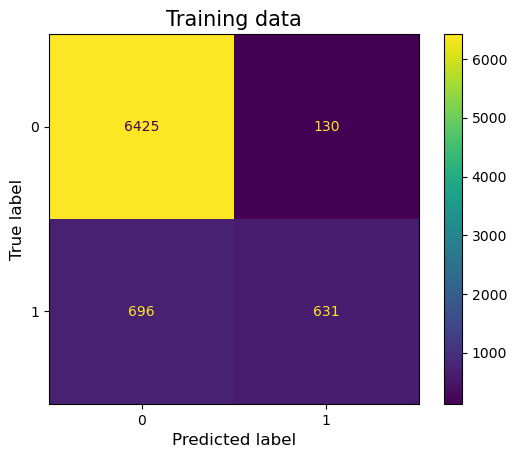

In [ ]:
plot_confusion_matrix(rfcl_tuned, X_1_train,y_1_train)
plt.title('Training data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show()

In [ ]:
#Confusion matrix for test data
confusion_matrix(y_1_test, y_test_predict_RF_tuned)

array([[2761,   48],
       [ 308,  261]], dtype=int64)

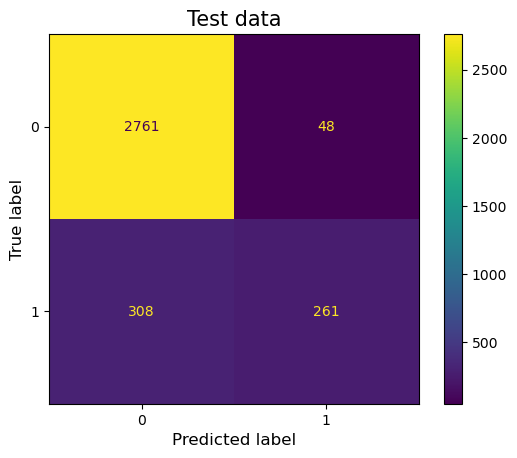

In [ ]:
plot_confusion_matrix(rfcl_tuned, X_1_test,y_1_test)
plt.title('Test data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show()

In [ ]:
#Training data prob prediction
predict_prob_train_RF_tuned = rfcl_tuned.predict_proba(X_1_train)

#Test data prob prediction
predict_prob_test_RF_tuned = rfcl_tuned.predict_proba(X_1_test)

AUC for the Training Data: 0.927
AUC for the Test Data: 0.911


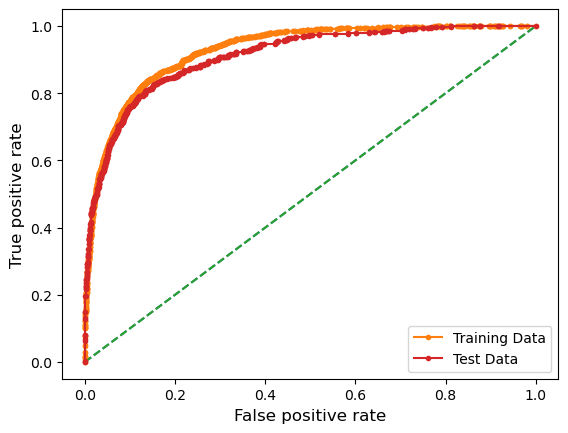

In [ ]:
# AUC and ROC for the training data

# calculate AUC
train_auc_RF_tuned = metrics.roc_auc_score(y_1_train, predict_prob_train_RF_tuned[:,1])
print('AUC for the Training Data: %.3f' % train_auc_RF_tuned)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_train, predict_prob_train_RF_tuned[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_RF_tuned = metrics.roc_auc_score(y_1_test, predict_prob_test_RF_tuned[:,1])
print('AUC for the Test Data: %.3f' % test_auc_RF_tuned)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_test, predict_prob_test_RF_tuned[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

#Labels
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)

# show the plot
plt.legend(loc='best')
plt.show();

In [ ]:
np.round(rfcl_tuned.oob_score_,4)

0.887

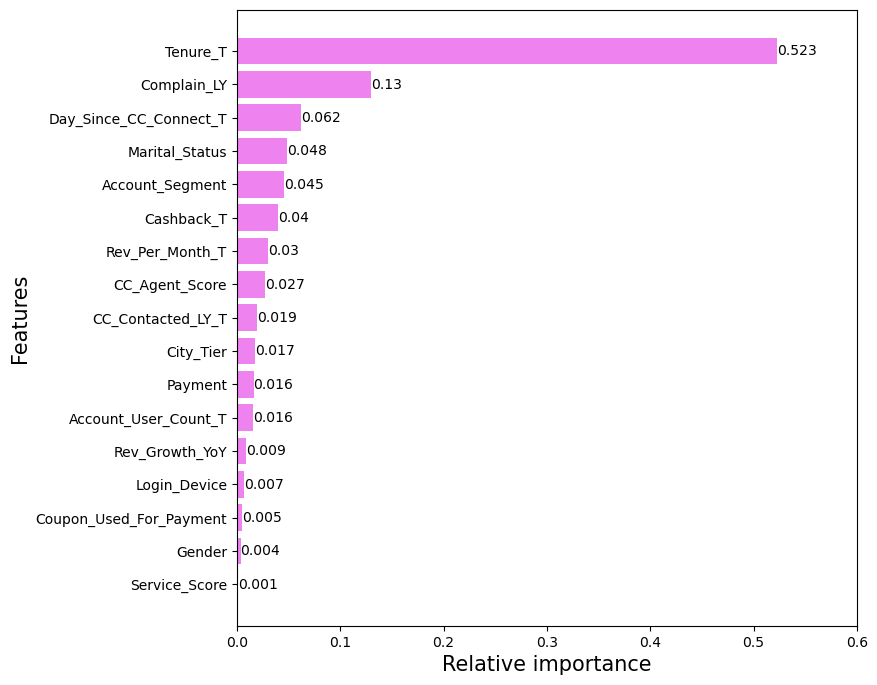

In [ ]:
importances = rfcl_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_1_train.columns)

plt.figure(figsize=(8,8))
bars_rfcl = plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative importance', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.xlim(0, 0.6)

for bar in bars_rfcl:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(bar.get_width(),3), va = 'center')

plt.show();

# Random Forest with balanced data

In [ ]:
RF_SM = RandomForestClassifier(random_state=1, oob_score=True)
RF_SM.fit(X_1_train_res, y_1_train_res)

RandomForestClassifier(oob_score=True, random_state=1)

In [ ]:
y_train_predict_RF_SM = RF_SM.predict(X_1_train_res)
y_test_predict_RF_SM = RF_SM.predict(X_1_test)

In [ ]:
print('Classification report for training data: \n\n', classification_report(y_1_train_res, y_train_predict_RF_SM), '\n')
print('Classification report for test data: \n\n', classification_report(y_1_test, y_test_predict_RF_SM))

Classification report for training data: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      6555

    accuracy                           1.00     13110
   macro avg       1.00      1.00      1.00     13110
weighted avg       1.00      1.00      1.00     13110
 

Classification report for test data: 

               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2809
           1       0.93      0.89      0.91       569

    accuracy                           0.97      3378
   macro avg       0.96      0.94      0.95      3378
weighted avg       0.97      0.97      0.97      3378



In [ ]:
#Confusion matrix for training data
confusion_matrix(y_1_train_res, y_train_predict_RF_SM)

array([[6555,    0],
       [   0, 6555]], dtype=int64)

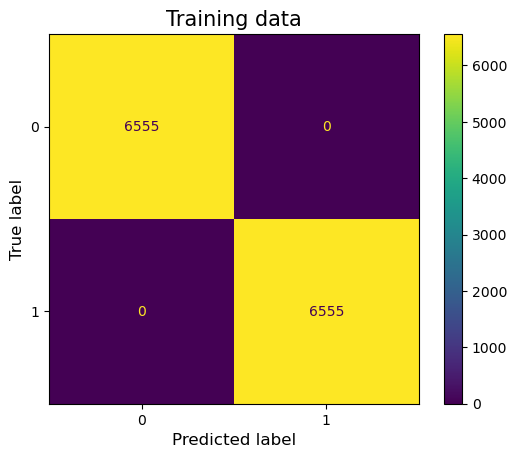

In [ ]:
plot_confusion_matrix(RF_SM, X_1_train_res, y_1_train_res)
plt.title('Training data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show()

In [ ]:
#Confusion matrix for test data
confusion_matrix(y_1_test, y_test_predict_RF_SM)

array([[2773,   36],
       [  64,  505]], dtype=int64)

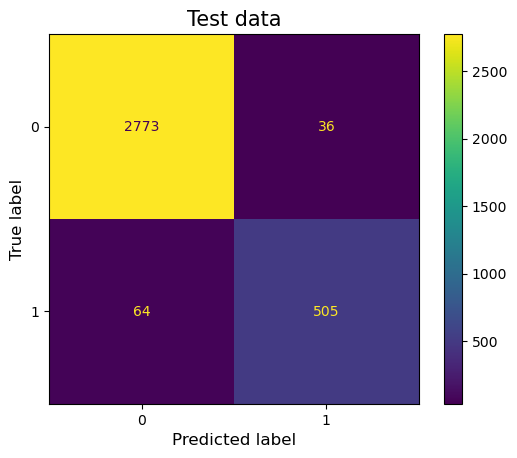

In [ ]:
plot_confusion_matrix(RF_SM, X_1_test, y_1_test)
plt.title('Test data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show()

In [ ]:
#Training data prob prediction
predict_prob_train_RF_SM = RF_SM.predict_proba(X_1_train_res)

#Test data prob prediction
predict_prob_test_RF_SM = RF_SM.predict_proba(X_1_test)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.991


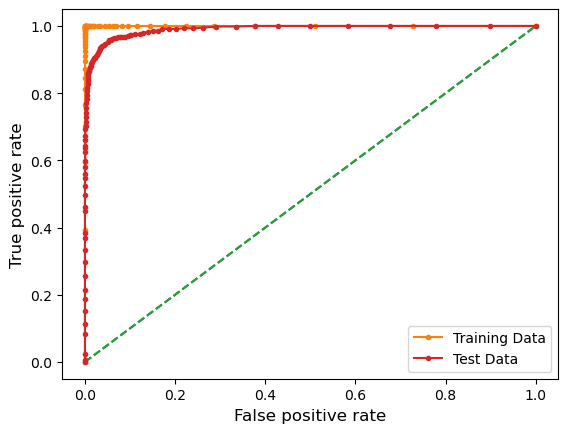

In [ ]:
# AUC and ROC for the training data

# calculate AUC
train_auc_RF_SM = metrics.roc_auc_score(y_1_train_res, predict_prob_train_RF_SM[:,1])
print('AUC for the Training Data: %.3f' % train_auc_RF_SM)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_train_res, predict_prob_train_RF_SM[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_RF_SM = metrics.roc_auc_score(y_1_test, predict_prob_test_RF_SM[:,1])
print('AUC for the Test Data: %.3f' % test_auc_RF_SM)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_test, predict_prob_test_RF_SM[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

#Labels
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)

# show the plot
plt.legend(loc='best')
plt.show();

In [ ]:
np.round(RF_SM.oob_score_,4)

0.9804

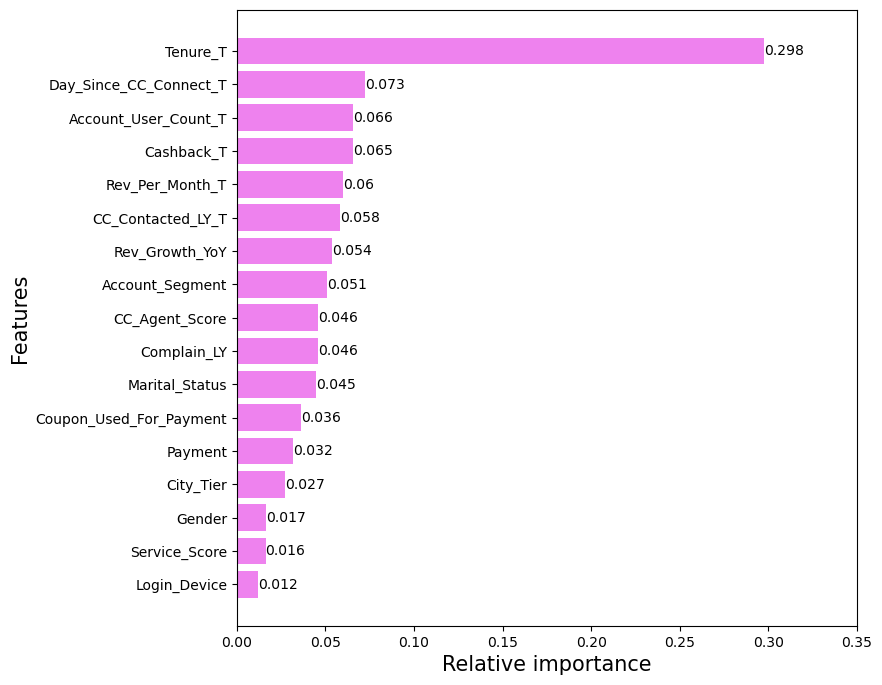

In [ ]:
importances = RF_SM.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_1_train_res.columns)

plt.figure(figsize=(8,8))
bars_RF_SM = plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative importance', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.xlim(0, 0.35)

for bar in bars_RF_SM:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(bar.get_width(),3), va = 'center')

plt.show();

# ADA Boost with unbalanced data

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [ ]:
ADB_model = AdaBoostClassifier(random_state=1)
ADB_model.fit(X_1_train, y_1_train)

AdaBoostClassifier(random_state=1)

In [ ]:
y_train_predict_ADB = ADB_model.predict(X_1_train)
y_test_predict_ADB = ADB_model.predict(X_1_test)

In [ ]:
print('Classification report for training data: \n\n', classification_report(y_1_train, y_train_predict_ADB), '\n')
print('Classification report for test data: \n\n', classification_report(y_1_test, y_test_predict_ADB))

Classification report for training data: 

               precision    recall  f1-score   support

           0       0.92      0.96      0.94      6555
           1       0.76      0.59      0.66      1327

    accuracy                           0.90      7882
   macro avg       0.84      0.77      0.80      7882
weighted avg       0.89      0.90      0.89      7882
 

Classification report for test data: 

               precision    recall  f1-score   support

           0       0.92      0.96      0.94      2809
           1       0.77      0.59      0.67       569

    accuracy                           0.90      3378
   macro avg       0.85      0.78      0.81      3378
weighted avg       0.90      0.90      0.90      3378



In [ ]:
#Confusion matrix for training data
confusion_matrix(y_1_train, y_train_predict_ADB)

array([[6311,  244],
       [ 548,  779]], dtype=int64)

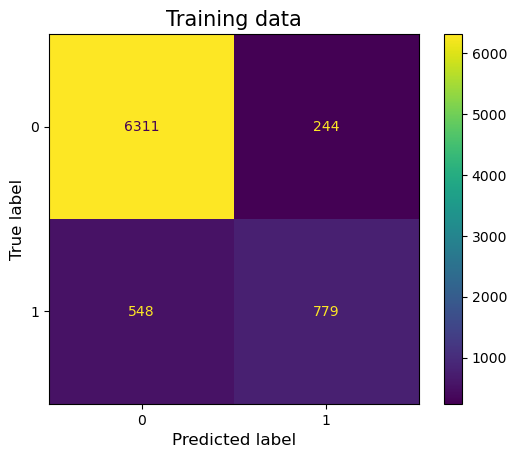

In [ ]:
plot_confusion_matrix(ADB_model, X_1_train, y_1_train)
plt.title('Training data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show()

In [ ]:
#Confusion matrix for test data
confusion_matrix(y_1_test, y_test_predict_ADB)

array([[2708,  101],
       [ 231,  338]], dtype=int64)

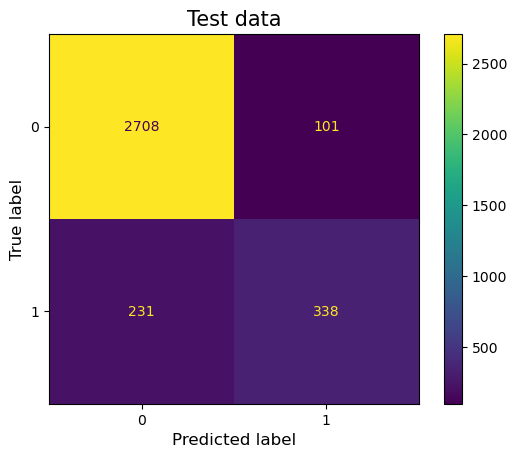

In [ ]:
plot_confusion_matrix(ADB_model, X_1_test, y_1_test)
plt.title('Test data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show()

In [ ]:
#Training data prob prediction
predict_prob_train_ADB = ADB_model.predict_proba(X_1_train)

#Test data prob prediction
predict_prob_test_ADB = ADB_model.predict_proba(X_1_test)

AUC for the Training Data: 0.918
AUC for the Test Data: 0.907


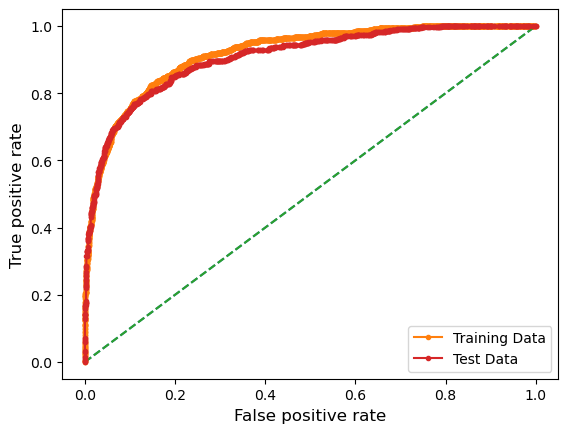

In [ ]:
# AUC and ROC for the training data

# calculate AUC
train_auc_ADB = metrics.roc_auc_score(y_1_train, predict_prob_train_ADB[:,1])
print('AUC for the Training Data: %.3f' % train_auc_ADB)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_train, predict_prob_train_ADB[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_ADB = metrics.roc_auc_score(y_1_test, predict_prob_test_ADB[:,1])
print('AUC for the Test Data: %.3f' % test_auc_ADB)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_test, predict_prob_test_ADB[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

#Labels
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)

# show the plot
plt.legend(loc='best')
plt.show();

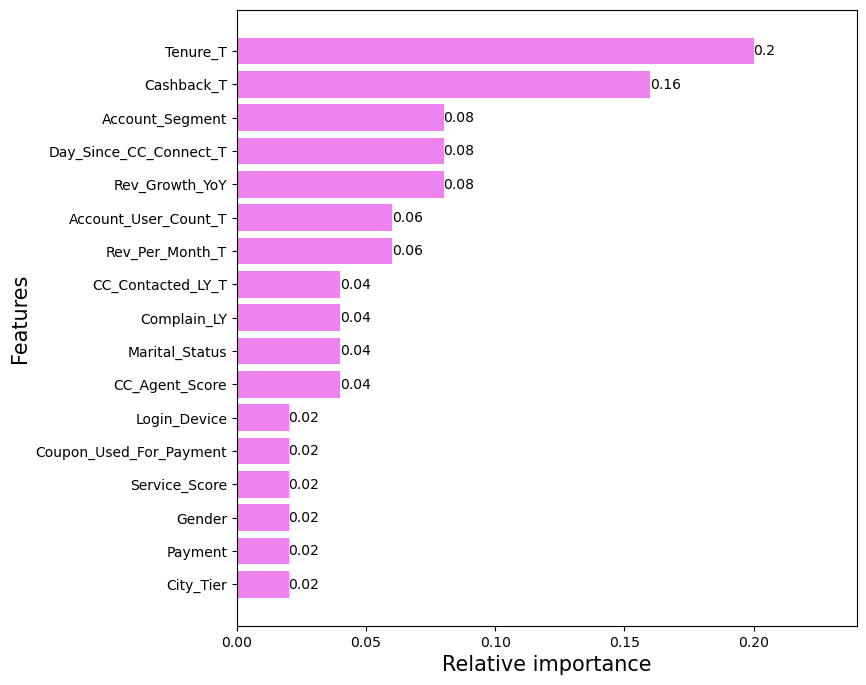

In [ ]:
importances = ADB_model.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_1_train.columns)

plt.figure(figsize=(8,8))
bars_ADB = plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative importance', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.xlim(0, 0.240)

for bar in bars_ADB:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(bar.get_width(),3), va = 'center')

plt.show();

# ADA Boost with hyptertuning parameters

In [ ]:
ADB_model = AdaBoostClassifier(random_state=1)

In [ ]:
grid = [
    {'n_estimators': [10, 50, 100, 500],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
    'algorithm': ['SAMME', 'SAMME.R']}

]

In [ ]:
grid_search = GridSearchCV(estimator=ADB_model, param_grid=grid, cv=3, n_jobs=-1, verbose=True)

In [ ]:
grid_search.fit(X_1_train, y_1_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=1), n_jobs=-1,
             param_grid=[{'algorithm': ['SAMME', 'SAMME.R'],
                          'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
                          'n_estimators': [10, 50, 100, 500]}],
             verbose=True)

In [ ]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 50} 

AdaBoostClassifier(algorithm='SAMME', learning_rate=1, random_state=1)


In [ ]:
ADB_model_tuned = grid_search.best_estimator_

In [ ]:
y_train_predict_ADB_tuned = ADB_model_tuned.predict(X_1_train)
y_test_predict_ADB_tuned = ADB_model_tuned.predict(X_1_test)

In [ ]:
print('Classification report for training data: \n\n', classification_report(y_1_train, y_train_predict_ADB_tuned), '\n')
print('Classification report for test data: \n\n', classification_report(y_1_test, y_test_predict_ADB_tuned))

Classification report for training data: 

               precision    recall  f1-score   support

           0       0.92      0.96      0.94      6555
           1       0.75      0.58      0.65      1327

    accuracy                           0.90      7882
   macro avg       0.83      0.77      0.80      7882
weighted avg       0.89      0.90      0.89      7882
 

Classification report for test data: 

               precision    recall  f1-score   support

           0       0.92      0.96      0.94      2809
           1       0.76      0.56      0.65       569

    accuracy                           0.90      3378
   macro avg       0.84      0.76      0.79      3378
weighted avg       0.89      0.90      0.89      3378



In [ ]:
#Confusion matrix for training data
confusion_matrix(y_1_train, y_train_predict_ADB_tuned)

array([[6293,  262],
       [ 554,  773]], dtype=int64)

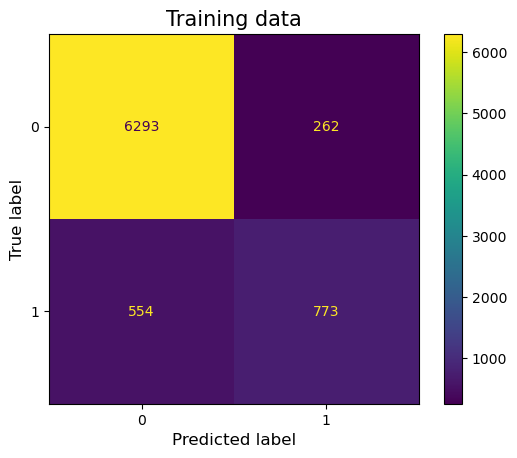

In [ ]:
plot_confusion_matrix(ADB_model_tuned, X_1_train, y_1_train)
plt.title('Training data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show()

In [ ]:
#Confusion matrix for test data
confusion_matrix(y_1_test, y_test_predict_ADB_tuned)

array([[2710,   99],
       [ 249,  320]], dtype=int64)

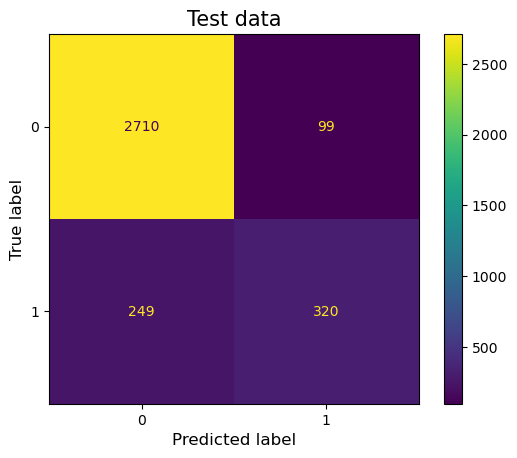

In [ ]:
plot_confusion_matrix(ADB_model_tuned, X_1_test, y_1_test)
plt.title('Test data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show()

In [ ]:
#Training data prob prediction
predict_prob_train_ADB_tuned = ADB_model_tuned.predict_proba(X_1_train)

#Test data prob prediction
predict_prob_test_ADB_tuned = ADB_model_tuned.predict_proba(X_1_test)

AUC for the Training Data: 0.903
AUC for the Test Data: 0.894


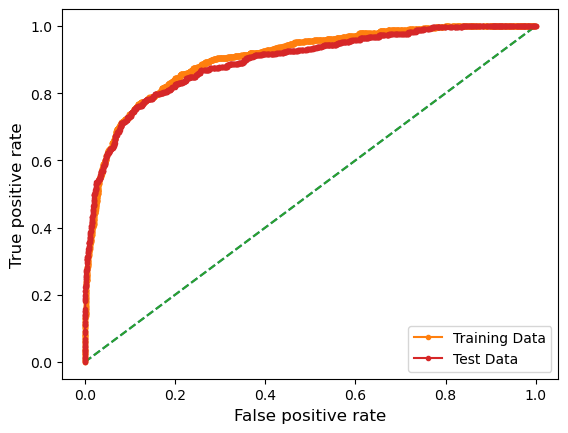

In [ ]:
# AUC and ROC for the training data

# calculate AUC
train_auc_ADB_tuned = metrics.roc_auc_score(y_1_train,predict_prob_train_ADB_tuned[:,1])
print('AUC for the Training Data: %.3f' % train_auc_ADB_tuned)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_train,predict_prob_train_ADB_tuned[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_ADB_tuned = metrics.roc_auc_score(y_1_test,predict_prob_test_ADB_tuned[:,1])
print('AUC for the Test Data: %.3f' % test_auc_ADB_tuned)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_test,predict_prob_test_ADB_tuned[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

#Labels
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)

# show the plot
plt.legend(loc='best')
plt.show();

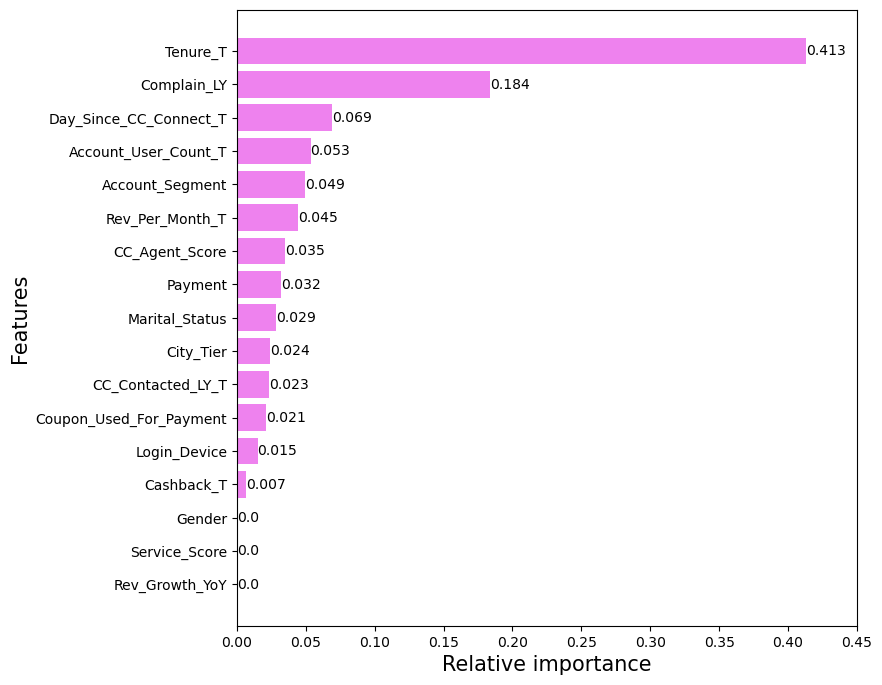

In [ ]:
importances = ADB_model_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_1_train.columns)

plt.figure(figsize=(8,8))
bars_ADB_tuned = plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative importance', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.xlim(0, 0.45)

for bar in bars_ADB_tuned:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(bar.get_width(),3), va = 'center')

plt.show();

# ADA Boost with balanced data

In [ ]:
ADB_model_SM = AdaBoostClassifier(random_state=1)
ADB_model_SM.fit(X_1_train_res, y_1_train_res)

AdaBoostClassifier(random_state=1)

In [ ]:
y_train_predict_ADB_SM = ADB_model_SM.predict(X_1_train_res)
y_test_predict_ADB_SM = ADB_model_SM.predict(X_1_test)

In [ ]:
print('Classification report for training data: \n\n', classification_report(y_1_train_res, y_train_predict_ADB_SM), '\n')
print('Classification report for test data: \n\n', classification_report(y_1_test, y_test_predict_ADB_SM))

Classification report for training data: 

               precision    recall  f1-score   support

           0       0.87      0.88      0.87      6555
           1       0.88      0.87      0.87      6555

    accuracy                           0.87     13110
   macro avg       0.87      0.87      0.87     13110
weighted avg       0.87      0.87      0.87     13110
 

Classification report for test data: 

               precision    recall  f1-score   support

           0       0.94      0.88      0.91      2809
           1       0.56      0.75      0.64       569

    accuracy                           0.86      3378
   macro avg       0.75      0.81      0.78      3378
weighted avg       0.88      0.86      0.87      3378



In [ ]:
#Confusion matrix for training data
confusion_matrix(y_1_train_res, y_train_predict_ADB_SM)

array([[5755,  800],
       [ 868, 5687]], dtype=int64)

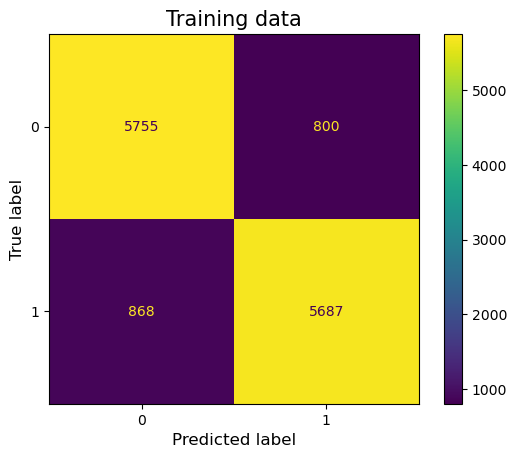

In [ ]:
plot_confusion_matrix(ADB_model_SM, X_1_train_res, y_1_train_res)
plt.title('Training data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show()

In [ ]:
#Confusion matrix for test data
confusion_matrix(y_1_test, y_test_predict_ADB_SM)

array([[2475,  334],
       [ 145,  424]], dtype=int64)

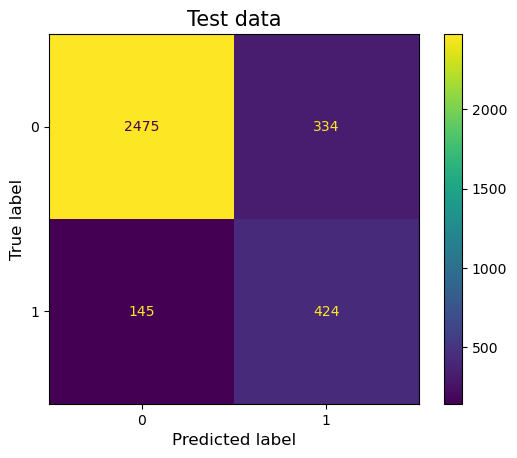

In [ ]:
plot_confusion_matrix(ADB_model_SM, X_1_test, y_1_test)
plt.title('Test data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show()

In [ ]:
#Training data prob prediction
predict_prob_train_ADB_SM = ADB_model_SM.predict_proba(X_1_train_res)

#Test data prob prediction
predict_prob_test_ADB_SM = ADB_model_SM.predict_proba(X_1_test)

AUC for the Training Data: 0.948
AUC for the Test Data: 0.889


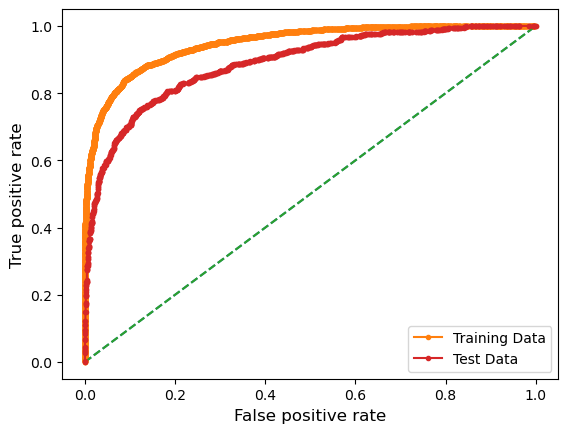

In [ ]:
# AUC and ROC for the training data

# calculate AUC
train_auc_ADB_SM = metrics.roc_auc_score(y_1_train_res, predict_prob_train_ADB_SM[:,1])
print('AUC for the Training Data: %.3f' % train_auc_ADB_SM)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_train_res, predict_prob_train_ADB_SM[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_ADB_SM = metrics.roc_auc_score(y_1_test, predict_prob_test_ADB_SM[:,1])
print('AUC for the Test Data: %.3f' % test_auc_ADB_SM)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_test, predict_prob_test_ADB_SM[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

#Labels
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)

# show the plot
plt.legend(loc='best')
plt.show();

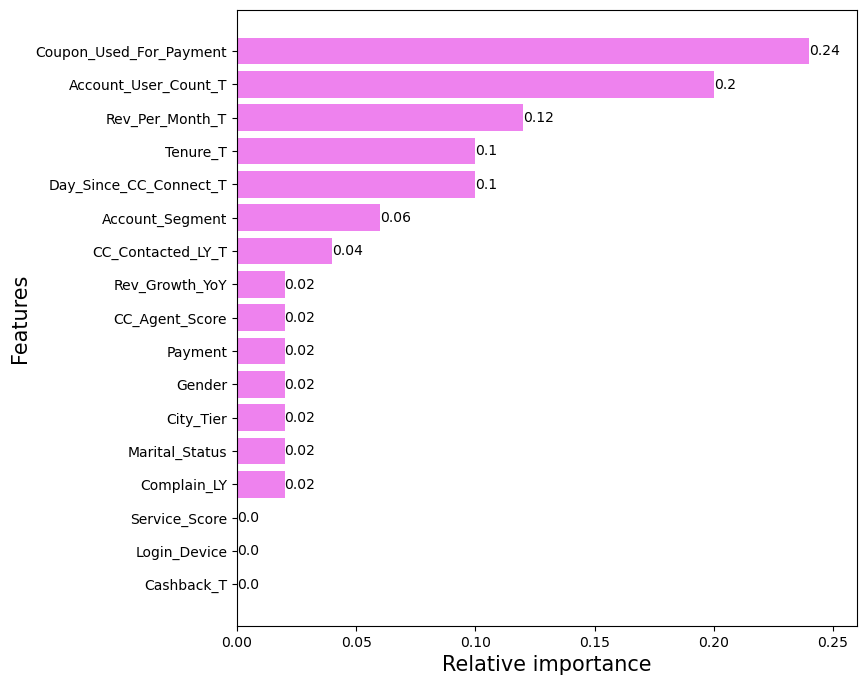

In [ ]:
importances = ADB_model_SM.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_1_train_res.columns)

plt.figure(figsize=(8,8))
bars_ADB_SM = plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative importance', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.xlim(0, 0.26)

for bar in bars_ADB_SM:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(bar.get_width(),3), va = 'center')

plt.show();

# Gradient Boost with imbalanced data

In [ ]:
GBC = GradientBoostingClassifier(random_state=1)
GBC.fit(X_1_train, y_1_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
y_train_predict_GBC = GBC.predict(X_1_train)
y_test_predict_GBC = GBC.predict(X_1_test)

In [ ]:
print('Classification report for training data: \n\n', classification_report(y_1_train, y_train_predict_GBC), '\n')
print('Classification report for test data: \n\n', classification_report(y_1_test, y_test_predict_GBC))

Classification report for training data: 

               precision    recall  f1-score   support

           0       0.93      0.98      0.95      6555
           1       0.85      0.64      0.73      1327

    accuracy                           0.92      7882
   macro avg       0.89      0.81      0.84      7882
weighted avg       0.92      0.92      0.92      7882
 

Classification report for test data: 

               precision    recall  f1-score   support

           0       0.92      0.98      0.95      2809
           1       0.83      0.60      0.70       569

    accuracy                           0.91      3378
   macro avg       0.88      0.79      0.82      3378
weighted avg       0.91      0.91      0.91      3378



In [ ]:
#Confusion matrix for training data
confusion_matrix(y_1_train, y_train_predict_GBC)

array([[6402,  153],
       [ 479,  848]], dtype=int64)

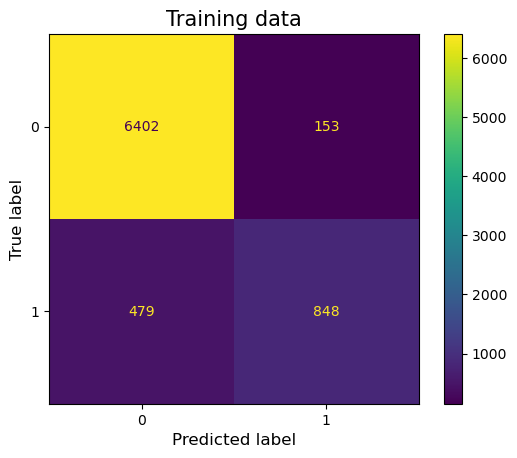

In [ ]:
plot_confusion_matrix(GBC, X_1_train, y_1_train)
plt.title('Training data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show()

In [ ]:
#Confusion matrix for test data
confusion_matrix(y_1_test, y_test_predict_GBC)

array([[2739,   70],
       [ 226,  343]], dtype=int64)

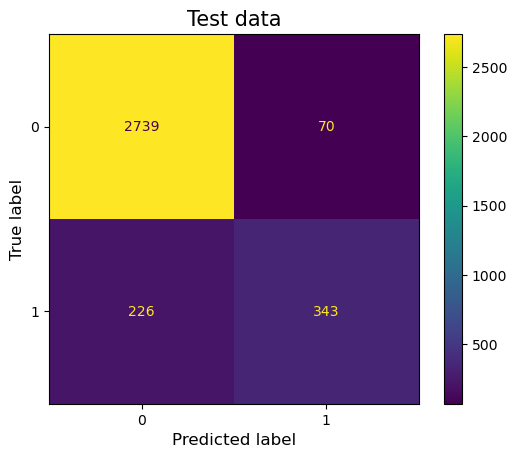

In [ ]:
plot_confusion_matrix(GBC, X_1_test, y_1_test)
plt.title('Test data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show()

In [ ]:
#Training data prob prediction
predict_prob_train_GBC = GBC.predict_proba(X_1_train)

#Test data prob prediction
predict_prob_test_GBC = GBC.predict_proba(X_1_test)

AUC for the Training Data: 0.950
AUC for the Test Data: 0.931


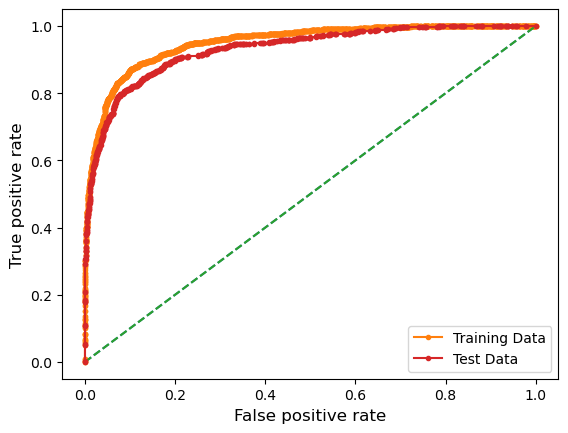

In [ ]:
# AUC and ROC for the training data

# calculate AUC
train_auc_GBC = metrics.roc_auc_score(y_1_train, predict_prob_train_GBC[:,1])
print('AUC for the Training Data: %.3f' % train_auc_GBC)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_train, predict_prob_train_GBC[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_GBC = metrics.roc_auc_score(y_1_test, predict_prob_test_GBC[:,1])
print('AUC for the Test Data: %.3f' % test_auc_GBC)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_test, predict_prob_test_GBC[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

#Labels
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)

# show the plot
plt.legend(loc='best')
plt.show();

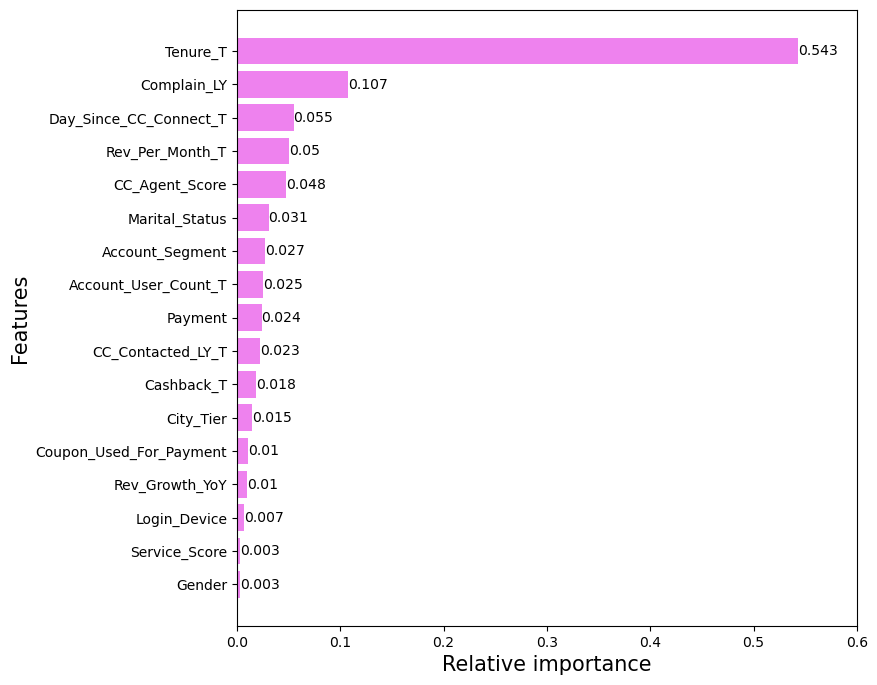

In [ ]:
importances = GBC.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_1_train.columns)

plt.figure(figsize=(8,8))
bars_GBC = plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative importance', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.xlim(0, 0.6)

for bar in bars_GBC:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(bar.get_width(),3), va = 'center')

plt.show();

# Gradient Boost with balanced data

In [ ]:
GBC_SM = GradientBoostingClassifier(random_state=1)
GBC_SM.fit(X_1_train_res, y_1_train_res)

GradientBoostingClassifier(random_state=1)

In [ ]:
y_train_predict_GBC_SM = GBC_SM.predict(X_1_train_res)
y_test_predict_GBC_SM = GBC_SM.predict(X_1_test)

In [ ]:
print('Classification report for training data: \n\n', classification_report(y_1_train_res, y_train_predict_GBC_SM), '\n')
print('Classification report for test data: \n\n', classification_report(y_1_test, y_test_predict_GBC_SM))

Classification report for training data: 

               precision    recall  f1-score   support

           0       0.91      0.93      0.92      6555
           1       0.93      0.91      0.92      6555

    accuracy                           0.92     13110
   macro avg       0.92      0.92      0.92     13110
weighted avg       0.92      0.92      0.92     13110
 

Classification report for test data: 

               precision    recall  f1-score   support

           0       0.94      0.93      0.94      2809
           1       0.67      0.73      0.70       569

    accuracy                           0.89      3378
   macro avg       0.81      0.83      0.82      3378
weighted avg       0.90      0.89      0.90      3378



In [ ]:
#Confusion matrix for training data
confusion_matrix(y_1_train_res, y_train_predict_GBC_SM)

array([[6092,  463],
       [ 587, 5968]], dtype=int64)

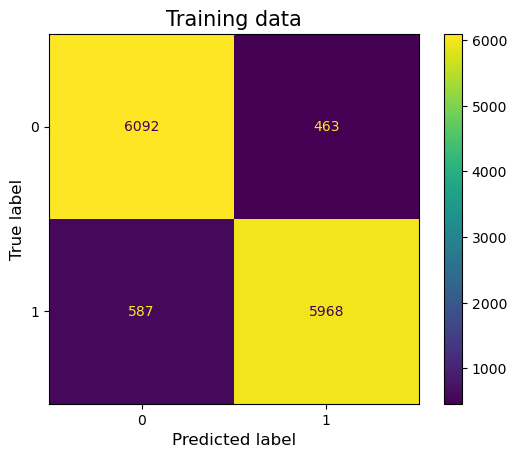

In [ ]:
plot_confusion_matrix(GBC_SM, X_1_train_res, y_1_train_res)
plt.title('Training data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show()

In [ ]:
#Confusion matrix for test data
confusion_matrix(y_1_test, y_test_predict_GBC_SM)

array([[2604,  205],
       [ 153,  416]], dtype=int64)

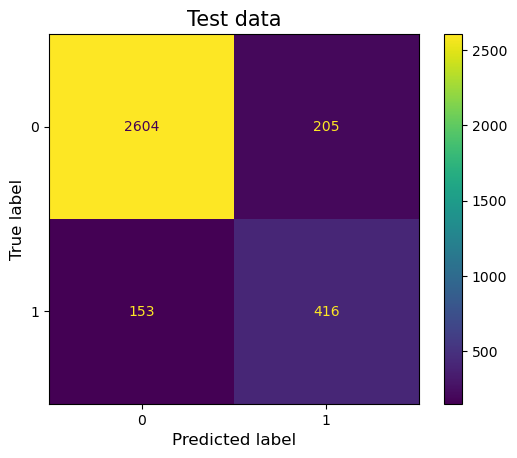

In [ ]:
plot_confusion_matrix(GBC_SM, X_1_test, y_1_test)
plt.title('Test data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show()

In [ ]:
#Training data prob prediction
predict_prob_train_GBC_SM = GBC_SM.predict_proba(X_1_train_res)

#Test data prob prediction
predict_prob_test_GBC_SM = GBC_SM.predict_proba(X_1_test)

AUC for the Training Data: 0.978
AUC for the Test Data: 0.920


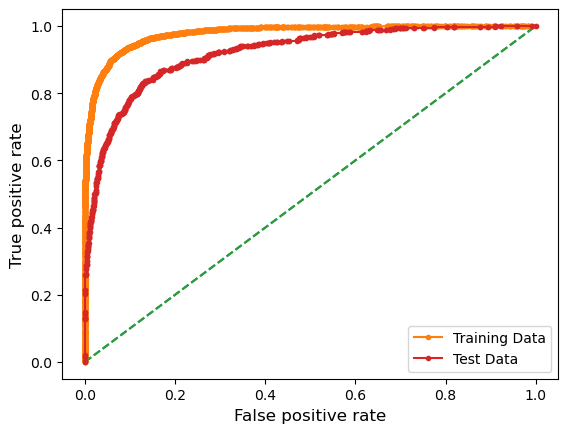

In [ ]:
# AUC and ROC for the training data

# calculate AUC
train_auc_GBC_SM = metrics.roc_auc_score(y_1_train_res, predict_prob_train_GBC_SM[:,1])
print('AUC for the Training Data: %.3f' % train_auc_GBC_SM)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_train_res, predict_prob_train_GBC_SM[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_GBC_SM = metrics.roc_auc_score(y_1_test, predict_prob_test_GBC_SM[:,1])
print('AUC for the Test Data: %.3f' % test_auc_GBC_SM)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_test, predict_prob_test_GBC_SM[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

#Labels
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)

# show the plot
plt.legend(loc='best')
plt.show();

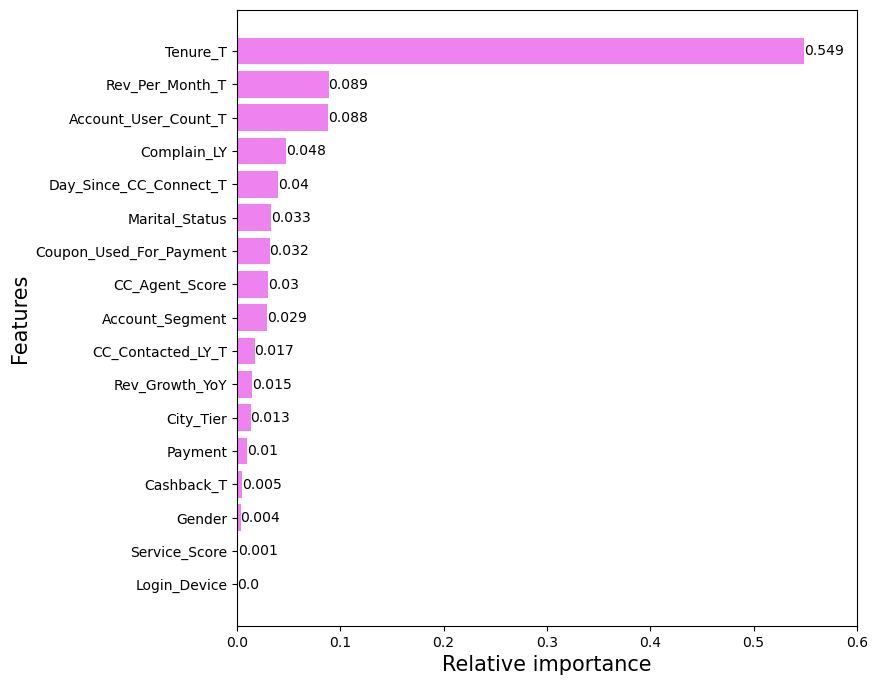

In [ ]:
importances = GBC_SM.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_1_train_res.columns)

plt.figure(figsize=(8,8))
bars_GBC_SM = plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative importance', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.xlim(0, 0.6)

for bar in bars_GBC_SM:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(bar.get_width(),3), va = 'center')

plt.show();

# Gradient Boost with hypertuning parameters

In [ ]:
GBC_tuned = GradientBoostingClassifier(random_state=1)

In [ ]:
parameters = {
    "n_estimators": [100,150,200],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1],
    "learning_rate":[0.0001, 0.001, 0.01, 0.1]
}

In [ ]:
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(GBC_tuned, parameters, scoring = acc_scorer, cv = 3)
grid_obj = grid_obj.fit(X_1_train, y_1_train)

In [ ]:
print(grid_obj.best_params_, '\n')
print(grid_obj.best_estimator_)

{'learning_rate': 0.1, 'max_features': 0.8, 'n_estimators': 200, 'subsample': 0.9} 

GradientBoostingClassifier(max_features=0.8, n_estimators=200, random_state=1,
                           subsample=0.9)


In [ ]:
gbc_tuned=grid_obj.best_estimator_

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9347
Accuracy on test set :  0.9192
Recall on training set :  0.7121
Recall on test set :  0.6432
Precision on training set :  0.8766
Precision on test set :  0.8394


In [ ]:
# Choose the type of classifier.
gbc_tuned_1 = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned_1, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_1_train, y_1_train)

# Set the clf to the best combination of parameters
gbc_tuned_2 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned_2.fit(X_1_train, y_1_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.9)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned_2)

Accuracy on training set :  0.9427
Accuracy on test set :  0.9227
Recall on training set :  0.7408
Recall on test set :  0.6555
Precision on training set :  0.901
Precision on test set :  0.8516


In [ ]:
y_train_predict_GBC_2 = gbc_tuned_2.predict(X_1_train)
y_test_predict_GBC_2 = gbc_tuned_2.predict(X_1_test)

In [ ]:
print('Classification report for training data: \n\n', classification_report(y_1_train, y_train_predict_GBC_2), '\n')
print('Classification report for test data: \n\n', classification_report(y_test, y_test_predict_GBC_2))

Classification report for training data: 

               precision    recall  f1-score   support

           0       0.95      0.98      0.97      6555
           1       0.90      0.74      0.81      1327

    accuracy                           0.94      7882
   macro avg       0.93      0.86      0.89      7882
weighted avg       0.94      0.94      0.94      7882
 

Classification report for test data: 

               precision    recall  f1-score   support

           0       0.93      0.98      0.95      2809
           1       0.85      0.66      0.74       569

    accuracy                           0.92      3378
   macro avg       0.89      0.82      0.85      3378
weighted avg       0.92      0.92      0.92      3378



In [ ]:
#Confusion matrix for training data
confusion_matrix(y_1_train, y_train_predict_GBC_2)

array([[6447,  108],
       [ 344,  983]], dtype=int64)

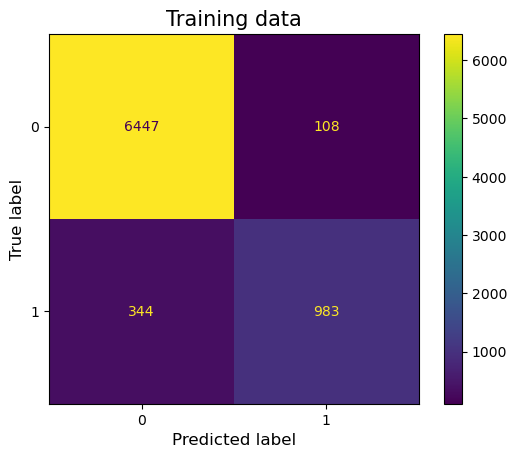

In [ ]:
plot_confusion_matrix(gbc_tuned_2, X_1_train, y_1_train)
plt.title('Training data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show()

In [ ]:
#Confusion matrix for test data
confusion_matrix(y_1_test, y_test_predict_GBC_2)

array([[2744,   65],
       [ 196,  373]], dtype=int64)

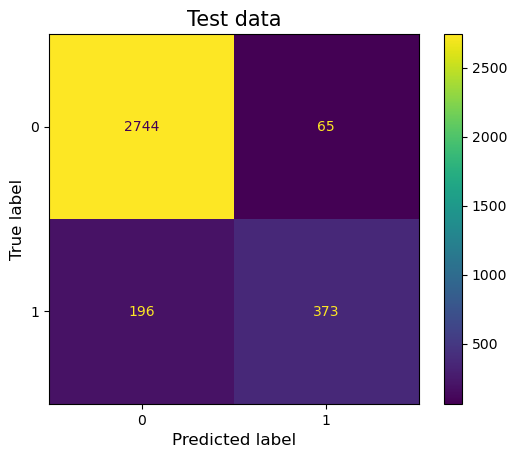

In [ ]:
plot_confusion_matrix(gbc_tuned_2, X_1_test, y_1_test)
plt.title('Test data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show()

In [ ]:
#Training data prob prediction
predict_prob_train_GBC_2 = gbc_tuned_2.predict_proba(X_1_train)

#Test data prob prediction
predict_prob_test_GBC_2 = gbc_tuned_2.predict_proba(X_1_test)

AUC for the Training Data: 0.974
AUC for the Test Data: 0.951


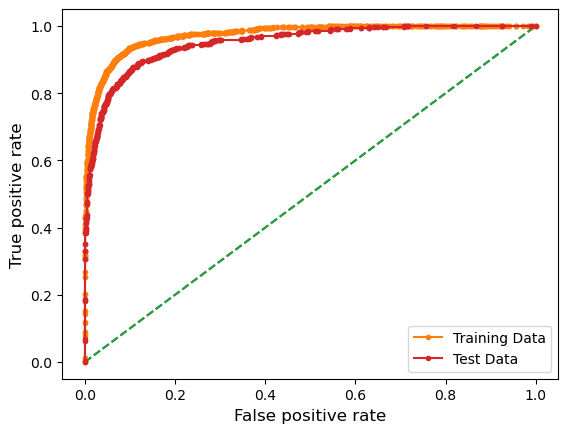

In [ ]:
# AUC and ROC for the training data

# calculate AUC
train_auc_GBC_2 = metrics.roc_auc_score(y_1_train, predict_prob_train_GBC_2[:,1])
print('AUC for the Training Data: %.3f' % train_auc_GBC_2)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_train, predict_prob_train_GBC_2[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_GBC_2 = metrics.roc_auc_score(y_1_test, predict_prob_test_GBC_2[:,1])
print('AUC for the Test Data: %.3f' % test_auc_GBC_2)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_test, predict_prob_test_GBC_2[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

#Labels
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)

# show the plot
plt.legend(loc='best')
plt.show();

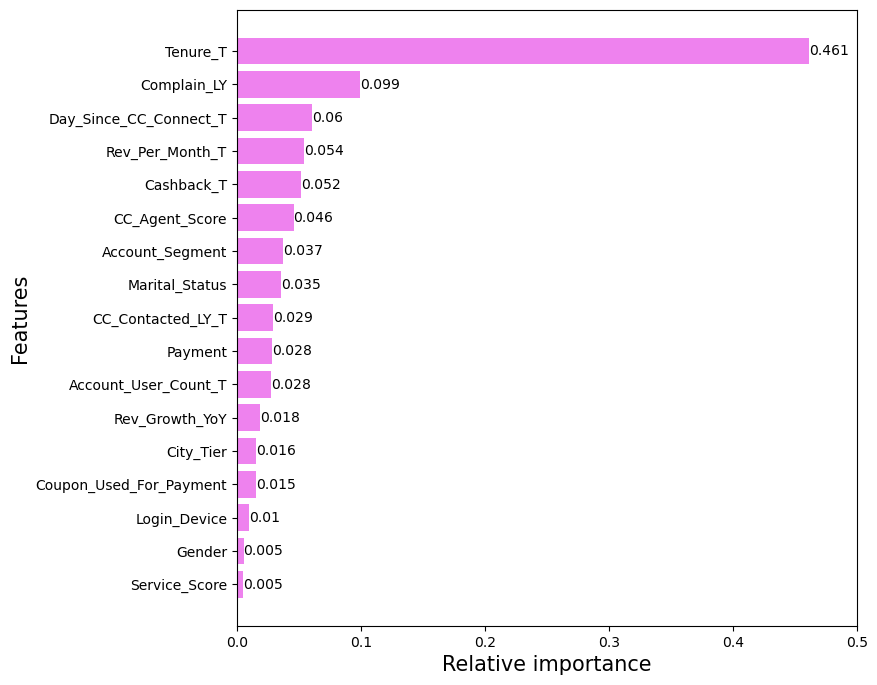

In [ ]:
importances = gbc_tuned_2.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_1_train.columns)

plt.figure(figsize=(8,8))
bars_gbc_tuned = plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative importance', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.xlim(0, 0.5)

for bar in bars_gbc_tuned:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(bar.get_width(),3), va = 'center')

plt.show();

# Bagging with unbalanced data

In [ ]:
BAG = BaggingClassifier(base_estimator=RF, random_state=1, oob_score=True)
BAG.fit(X_1_train, y_1_train)

BaggingClassifier(base_estimator=RandomForestClassifier(oob_score=True,
                                                        random_state=1),
                  oob_score=True, random_state=1)

In [ ]:
BAG.oob_score_

0.9536919563562548

In [ ]:
y_train_predict_BAG= BAG.predict(X_1_train)
y_test_predict_BAG = BAG.predict(X_1_test)

In [ ]:
print('Classification report for training data: \n\n', classification_report(y_1_train, y_train_predict_BAG), '\n')
print('Classification report for test data: \n\n', classification_report(y_1_test, y_test_predict_BAG))

Classification report for training data: 

               precision    recall  f1-score   support

           0       0.99      1.00      1.00      6555
           1       1.00      0.97      0.98      1327

    accuracy                           0.99      7882
   macro avg       1.00      0.98      0.99      7882
weighted avg       0.99      0.99      0.99      7882
 

Classification report for test data: 

               precision    recall  f1-score   support

           0       0.96      1.00      0.98      2809
           1       0.98      0.79      0.87       569

    accuracy                           0.96      3378
   macro avg       0.97      0.89      0.93      3378
weighted avg       0.96      0.96      0.96      3378



In [ ]:
#Confusion matrix for training data
confusion_matrix(y_1_train, y_train_predict_BAG)

array([[6555,    0],
       [  42, 1285]], dtype=int64)

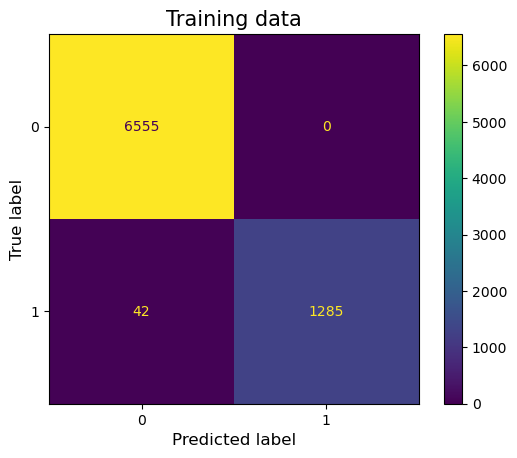

In [ ]:
plot_confusion_matrix(BAG, X_1_train,y_1_train)
plt.title('Training data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show()

In [ ]:
#Confusion matrix for test data
confusion_matrix(y_1_test, y_test_predict_BAG)

array([[2798,   11],
       [ 118,  451]], dtype=int64)

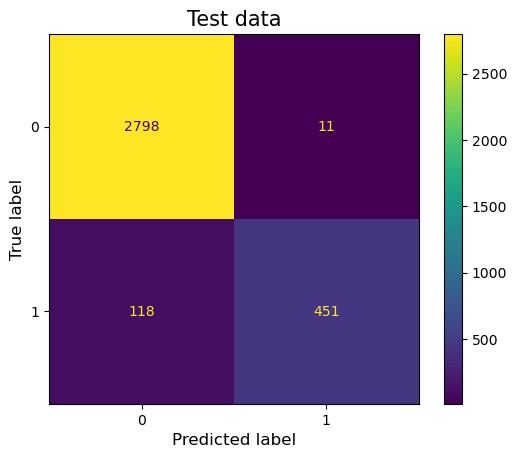

In [ ]:
plot_confusion_matrix(BAG, X_1_test, y_1_test)
plt.title('Test data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show()

In [ ]:
#Training data prob prediction
predict_prob_train_BAG = BAG.predict_proba(X_1_train)

#Test data prob prediction
predict_prob_test_BAG = BAG.predict_proba(X_1_test)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.988


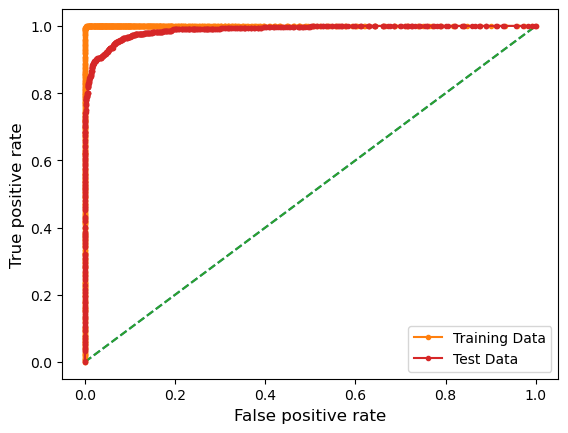

In [ ]:
# AUC and ROC for the training data

# calculate AUC
train_auc_BAG = metrics.roc_auc_score(y_1_train, predict_prob_train_BAG[:,1])
print('AUC for the Training Data: %.3f' % train_auc_BAG)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_train, predict_prob_train_BAG[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_BAG = metrics.roc_auc_score(y_1_test, predict_prob_test_BAG[:,1])
print('AUC for the Test Data: %.3f' % test_auc_BAG)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_test, predict_prob_test_BAG[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

#Labels
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)

# show the plot
plt.legend(loc='best')
plt.show();

# Bagging with balanced data

In [ ]:
BAG_SM = BaggingClassifier(base_estimator=RF, random_state=1, oob_score=True)
BAG_SM.fit(X_1_train_res, y_1_train_res)

BaggingClassifier(base_estimator=RandomForestClassifier(oob_score=True,
                                                        random_state=1),
                  oob_score=True, random_state=1)

In [ ]:
BAG_SM.oob_score_

0.9696414950419527

In [ ]:
y_train_predict_BAG_SM = BAG_SM.predict(X_1_train_res)
y_test_predict_BAG_SM = BAG_SM.predict(X_1_test)

In [ ]:
print('Classification report for training data: \n\n', classification_report(y_1_train_res, y_train_predict_BAG_SM), '\n')
print('Classification report for test data: \n\n', classification_report(y_1_test, y_test_predict_BAG_SM))

Classification report for training data: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      6555

    accuracy                           1.00     13110
   macro avg       1.00      1.00      1.00     13110
weighted avg       1.00      1.00      1.00     13110
 

Classification report for test data: 

               precision    recall  f1-score   support

           0       0.98      0.97      0.97      2809
           1       0.87      0.88      0.88       569

    accuracy                           0.96      3378
   macro avg       0.92      0.93      0.93      3378
weighted avg       0.96      0.96      0.96      3378



In [ ]:
#Confusion matrix for training data
confusion_matrix(y_1_train_res, y_train_predict_BAG_SM)

array([[6534,   21],
       [  19, 6536]], dtype=int64)

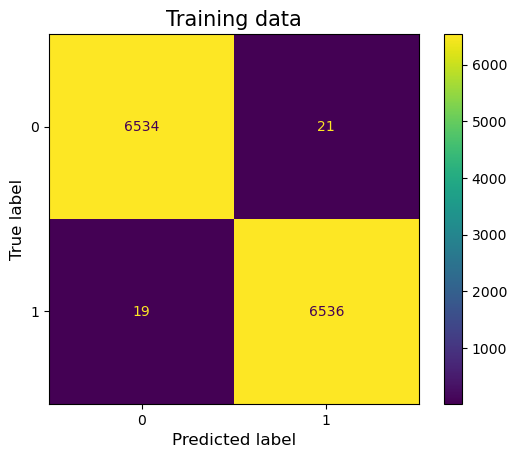

In [ ]:
plot_confusion_matrix(BAG_SM, X_1_train_res, y_1_train_res)
plt.title('Training data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show()

In [ ]:
#Confusion matrix for test data
confusion_matrix(y_1_test, y_test_predict_BAG_SM)

array([[2732,   77],
       [  66,  503]], dtype=int64)

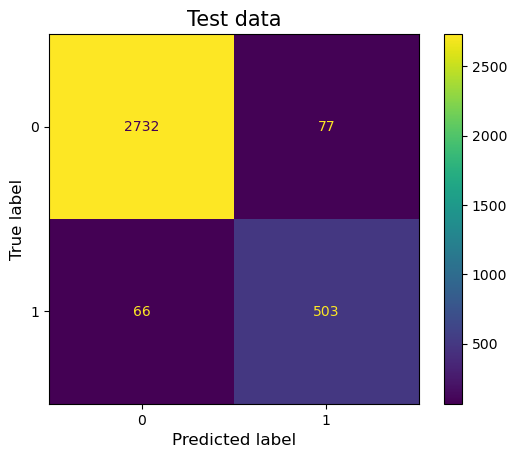

In [ ]:
plot_confusion_matrix(BAG_SM, X_1_test, y_1_test)
plt.title('Test data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show()

In [ ]:
#Training data prob prediction
predict_prob_train_BAG_SM = BAG_SM.predict_proba(X_1_train_res)

#Test data prob prediction
predict_prob_test_BAG_SM = BAG_SM.predict_proba(X_1_test)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.985


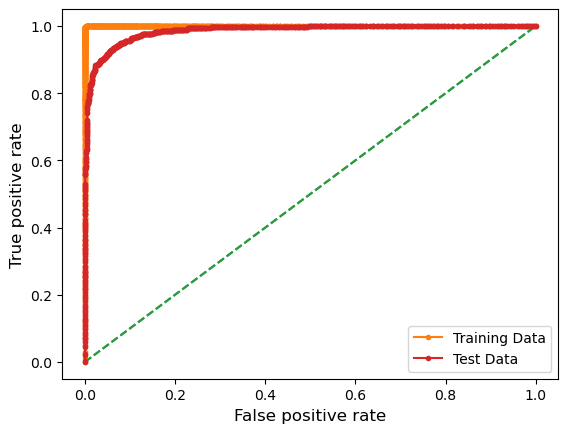

In [ ]:
# AUC and ROC for the training data

# calculate AUC
train_auc_BAG_SM = metrics.roc_auc_score(y_1_train_res, predict_prob_train_BAG_SM[:,1])
print('AUC for the Training Data: %.3f' % train_auc_BAG_SM)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_train_res, predict_prob_train_BAG_SM[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_BAG_SM = metrics.roc_auc_score(y_1_test, predict_prob_test_BAG_SM[:,1])
print('AUC for the Test Data: %.3f' % test_auc_BAG_SM)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_test, predict_prob_test_BAG_SM[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

#Labels
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)

# show the plot
plt.legend(loc='best')
plt.show();

# Bagging with hypertuning parameters  

In [ ]:
BAG_tuned = BaggingClassifier(base_estimator=rfcl_tuned, random_state=1, oob_score=True)
BAG_tuned.fit(X_1_train, y_1_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=7,
                                                        max_features=4,
                                                        min_samples_leaf=50,
                                                        min_samples_split=150,
                                                        n_estimators=501,
                                                        oob_score=True,
                                                        random_state=1),
                  oob_score=True, random_state=1)

In [ ]:
BAG_tuned.oob_score_

0.8788378584115707

In [ ]:
y_train_predict_BAG_tuned= BAG_tuned.predict(X_1_train)
y_test_predict_BAG_tuned = BAG_tuned.predict(X_1_test)

In [ ]:
print('Classification report for training data: \n\n', classification_report(y_1_train, y_train_predict_BAG_tuned), '\n')
print('Classification report for test data: \n\n', classification_report(y_1_test, y_test_predict_BAG_tuned))

Classification report for training data: 

               precision    recall  f1-score   support

           0       0.89      0.98      0.93      6555
           1       0.82      0.37      0.51      1327

    accuracy                           0.88      7882
   macro avg       0.85      0.68      0.72      7882
weighted avg       0.87      0.88      0.86      7882
 

Classification report for test data: 

               precision    recall  f1-score   support

           0       0.89      0.99      0.93      2809
           1       0.87      0.37      0.52       569

    accuracy                           0.88      3378
   macro avg       0.88      0.68      0.73      3378
weighted avg       0.88      0.88      0.86      3378



In [ ]:
#Confusion matrix for training data
confusion_matrix(y_1_train, y_train_predict_BAG_tuned)

array([[6446,  109],
       [ 832,  495]], dtype=int64)

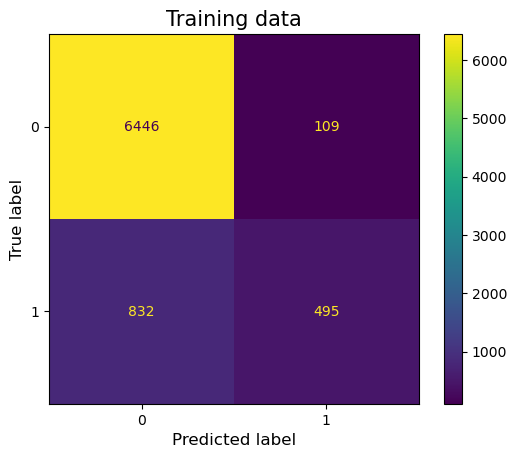

In [ ]:
plot_confusion_matrix(BAG_tuned, X_1_train,y_1_train)
plt.title('Training data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show()

In [ ]:
#Confusion matrix for test data
confusion_matrix(y_1_test, y_test_predict_BAG_tuned)

array([[2778,   31],
       [ 358,  211]], dtype=int64)

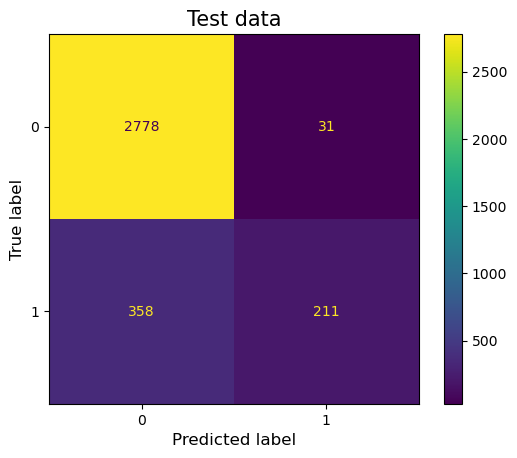

In [ ]:
plot_confusion_matrix(BAG_tuned, X_1_test,y_1_test)
plt.title('Test data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show()

In [ ]:
#Training data prob prediction
predict_prob_train_BAG_tuned = BAG_tuned.predict_proba(X_1_train)

#Test data prob prediction
predict_prob_test_BAG_tuned = BAG_tuned.predict_proba(X_1_test)

AUC for the Training Data: 0.916
AUC for the Test Data: 0.902


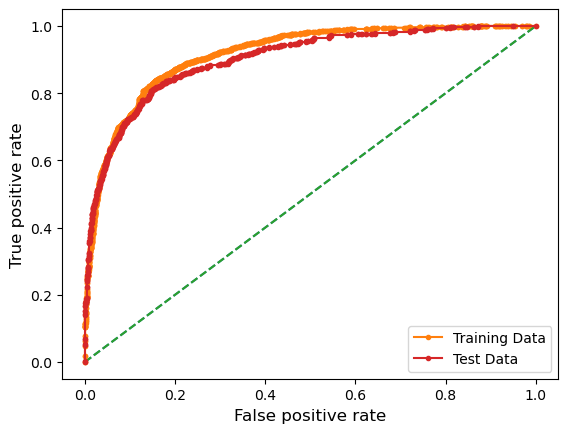

In [ ]:
# AUC and ROC for the training data

# calculate AUC
train_auc_BAG_tuned = metrics.roc_auc_score(y_1_train, predict_prob_train_BAG_tuned[:,1])
print('AUC for the Training Data: %.3f' % train_auc_BAG_tuned)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_train, predict_prob_train_BAG_tuned[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_BAG_tuned = metrics.roc_auc_score(y_1_test, predict_prob_test_BAG_tuned[:,1])
print('AUC for the Test Data: %.3f' % test_auc_BAG_tuned)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_test, predict_prob_test_BAG_tuned[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

#Labels
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)

# show the plot
plt.legend(loc='lower right')
plt.show();

# Decision Tree with unbalanced data

In [ ]:
DTree = DecisionTreeClassifier(random_state=1)
DTree.fit(X_1_train, y_1_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
y_train_predict_DTree = DTree.predict(X_1_train)
y_test_predict_DTree = DTree.predict(X_1_test)

In [ ]:
print('Classification report for training data: \n\n', classification_report(y_1_train, y_train_predict_DTree), '\n')
print('Classification report for test data: \n\n', classification_report(y_1_test, y_test_predict_DTree))

Classification report for training data: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882
 

Classification report for test data: 

               precision    recall  f1-score   support

           0       0.97      0.96      0.97      2809
           1       0.83      0.86      0.84       569

    accuracy                           0.95      3378
   macro avg       0.90      0.91      0.91      3378
weighted avg       0.95      0.95      0.95      3378



In [ ]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(DTree, out_file=Credit_Tree_File,
                                feature_names = list(X_1_train), class_names = list(train_char_label))
Credit_Tree_File.close()

In [ ]:
#Confusion matrix for training data
confusion_matrix(y_1_train, y_train_predict_DTree)

array([[6555,    0],
       [   0, 1327]], dtype=int64)

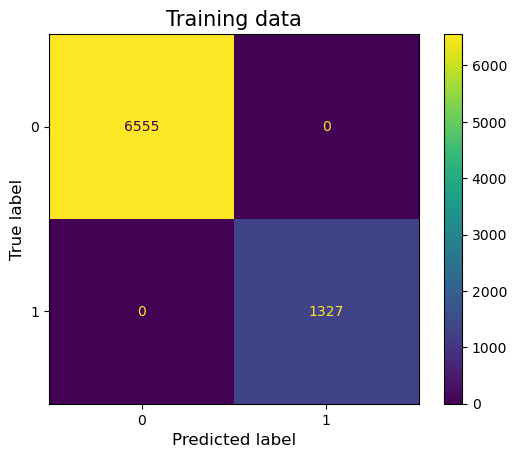

In [ ]:
plot_confusion_matrix(DTree, X_1_train,y_1_train)
plt.title('Training data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show();

In [ ]:
#Confusion matrix for test data
confusion_matrix(y_1_test, y_test_predict_DTree)

array([[2708,  101],
       [  80,  489]], dtype=int64)

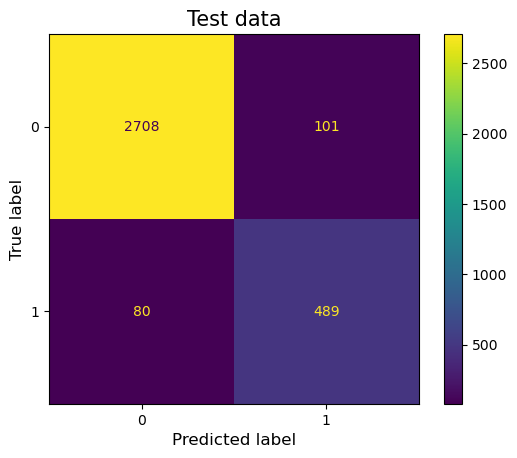

In [ ]:
plot_confusion_matrix(DTree, X_1_test, y_1_test)
plt.title('Test data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show();

In [ ]:
#Training data prob prediction
predict_prob_train_DTree = DTree.predict_proba(X_1_train)

#Test data prob prediction
predict_prob_test_DTree = DTree.predict_proba(X_1_test)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.912


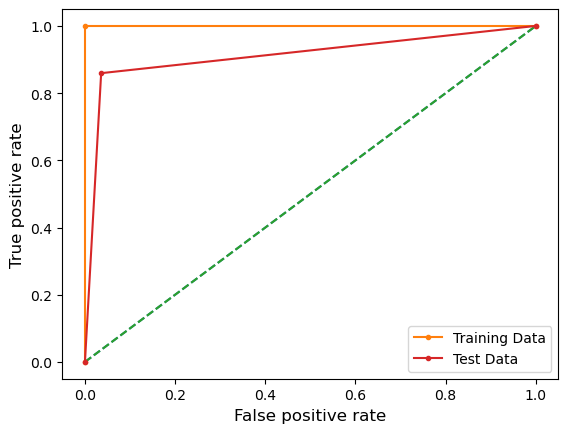

In [ ]:
# AUC and ROC for the training data

# calculate AUC
train_auc_DTree = metrics.roc_auc_score(y_1_train, predict_prob_train_DTree[:,1])
print('AUC for the Training Data: %.3f' % train_auc_DTree)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_train, predict_prob_train_DTree[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_DTree = metrics.roc_auc_score(y_1_test, predict_prob_test_DTree[:,1])
print('AUC for the Test Data: %.3f' % test_auc_DTree)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_test, predict_prob_test_DTree[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

#Labels
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)

# show the plot
plt.legend(loc='lower right')
plt.show();

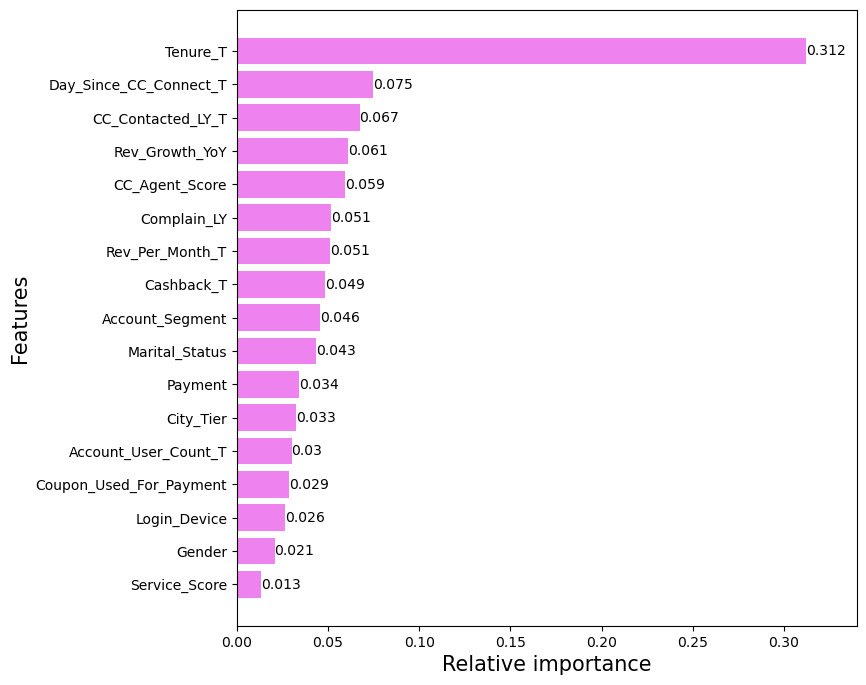

In [ ]:
importances = DTree.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_1_train.columns)

plt.figure(figsize=(8,8))
bars_DTree = plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative importance', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.xlim(0, 0.34)

for bar in bars_DTree:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(bar.get_width(),3), va = 'center')

plt.show();

# Decision Tree with balanced data

In [ ]:
DTree_SM = DecisionTreeClassifier(random_state = 1)
DTree_SM.fit(X_1_train_res, y_1_train_res)
print('Accuracy on train set:', DTree_SM.score(X_1_train_res, y_1_train_res))
print('Accuracy on test set:', DTree_SM.score(X_1_test, y_1_test))

Accuracy on train set: 1.0
Accuracy on test set: 0.9138543516873889


In [ ]:
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('credit_tree_SM.dot','w')
dot_data = tree.export_graphviz(DTree_SM, out_file=Credit_Tree_FileR,
                                feature_names = list(X_1_train_res), class_names = list(train_char_label))
Credit_Tree_FileR.close()

In [ ]:
y_train_predict_DTree_SM = DTree_SM.predict(X_1_train_res)
y_test_predict_DTree_SM = DTree_SM.predict(X_1_test)

In [ ]:
print('Classification report for training data: \n\n', classification_report(y_1_train_res, y_train_predict_DTree_SM), '\n')
print('Classification report for test data: \n\n', classification_report(y_1_test, y_test_predict_DTree_SM))

Classification report for training data: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      6555

    accuracy                           1.00     13110
   macro avg       1.00      1.00      1.00     13110
weighted avg       1.00      1.00      1.00     13110
 

Classification report for test data: 

               precision    recall  f1-score   support

           0       0.95      0.94      0.95      2809
           1       0.73      0.77      0.75       569

    accuracy                           0.91      3378
   macro avg       0.84      0.86      0.85      3378
weighted avg       0.92      0.91      0.91      3378



In [ ]:
#Confusion matrix for training data
confusion_matrix(y_1_train_res, y_train_predict_DTree_SM)

array([[6555,    0],
       [   0, 6555]], dtype=int64)

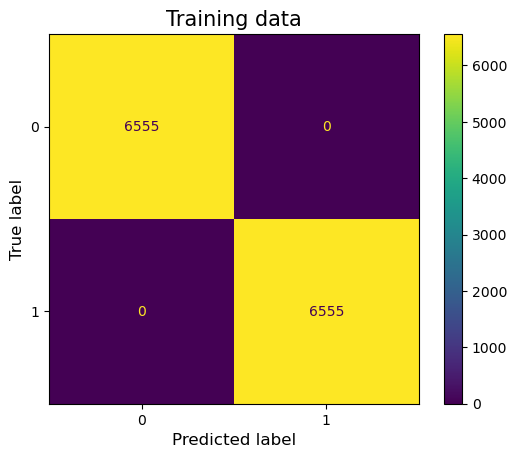

In [ ]:
plot_confusion_matrix(DTree_SM, X_1_train_res, y_1_train_res)
plt.title('Training data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show();

In [ ]:
#Confusion matrix for test data
confusion_matrix(y_1_test, y_test_predict_DTree_SM)

array([[2650,  159],
       [ 132,  437]], dtype=int64)

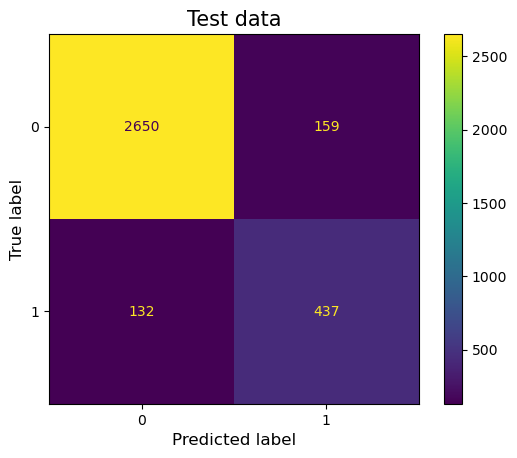

In [ ]:
plot_confusion_matrix(DTree_SM, X_1_test, y_1_test)
plt.title('Test data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show();

In [ ]:
#Training data prob prediction
predict_prob_train_DTree_SM = DTree_SM.predict_proba(X_1_train_res)

#Test data prob prediction
predict_prob_test_DTree_SM = DTree_SM.predict_proba(X_1_test)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.856


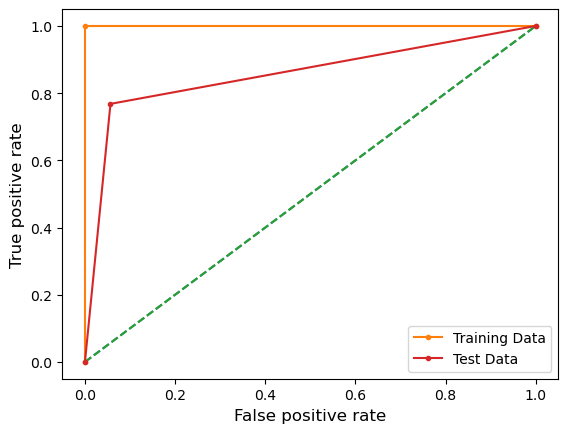

In [ ]:
# AUC and ROC for the training data

# calculate AUC
train_auc_DTree_SM = metrics.roc_auc_score(y_1_train_res, predict_prob_train_DTree_SM[:,1])
print('AUC for the Training Data: %.3f' % train_auc_DTree_SM)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_train_res, predict_prob_train_DTree_SM[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_DTree_SM = metrics.roc_auc_score(y_1_test, predict_prob_test_DTree_SM[:,1])
print('AUC for the Test Data: %.3f' % test_auc_DTree_SM)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_test, predict_prob_test_DTree_SM[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

#Labels
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)

# show the plot
plt.legend(loc='lower right')
plt.show();

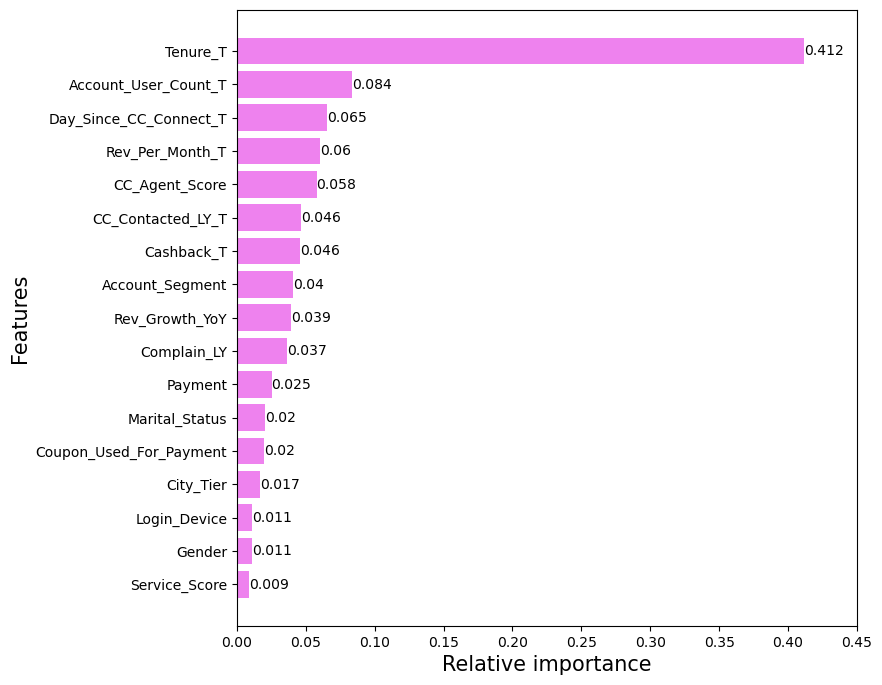

In [ ]:
importances = DTree_SM.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_1_train_res.columns)

plt.figure(figsize=(8,8))
bars_DTree_SM = plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative importance', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.xlim(0, 0.45)

for bar in bars_DTree_SM:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(bar.get_width(),3), va = 'center')

plt.show();

# Decision Tree with hypertuning pararmeters

In [ ]:
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1,2,3,4,5,6,7],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2,4,6]
}

In [ ]:
grid =  GridSearchCV(DTree, param_grid = param_dist, cv = 5, n_jobs = -1)

In [ ]:
grid.fit(X_1_train, y_1_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6]})

In [ ]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=7, max_features='auto', min_samples_split=4,
                       random_state=1)

In [ ]:
grid.best_score_

0.8840396048527532

In [ ]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'min_samples_split': 4}

In [ ]:
DTree_R = DecisionTreeClassifier(criterion = 'gini', max_depth = 7, random_state = 1)
DTree_R.fit(X_1_train, y_1_train)

DecisionTreeClassifier(max_depth=7, random_state=1)

In [ ]:
y_train_predict_DTree_R = DTree_R.predict(X_1_train)
y_test_predict_DTree_R = DTree_R.predict(X_1_test)

In [ ]:
print('Classification report for training data: \n\n', classification_report(y_1_train, y_train_predict_DTree_R), '\n')
print('Classification report for test data: \n\n', classification_report(y_1_test, y_test_predict_DTree_R))

Classification report for training data: 

               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6555
           1       0.83      0.69      0.75      1327

    accuracy                           0.92      7882
   macro avg       0.88      0.83      0.85      7882
weighted avg       0.92      0.92      0.92      7882
 

Classification report for test data: 

               precision    recall  f1-score   support

           0       0.93      0.96      0.94      2809
           1       0.76      0.63      0.69       569

    accuracy                           0.91      3378
   macro avg       0.85      0.80      0.82      3378
weighted avg       0.90      0.91      0.90      3378



In [ ]:
#Confusion matrix for training data
confusion_matrix(y_1_train, y_train_predict_DTree_R)

array([[6364,  191],
       [ 413,  914]], dtype=int64)

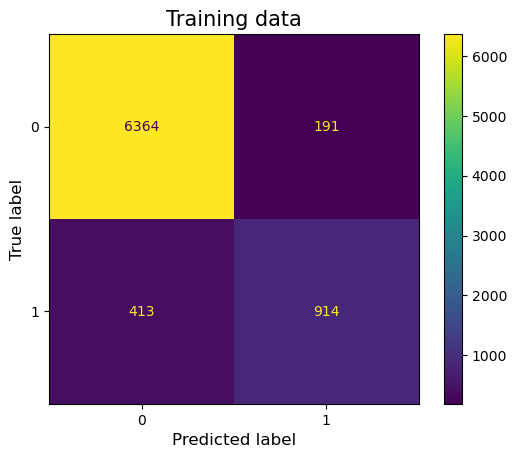

In [ ]:
plot_confusion_matrix(DTree_R, X_1_train, y_1_train)
plt.title('Training data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show();

In [ ]:
#Confusion matrix for test data
confusion_matrix(y_1_test, y_test_predict_DTree_R)

array([[2698,  111],
       [ 209,  360]], dtype=int64)

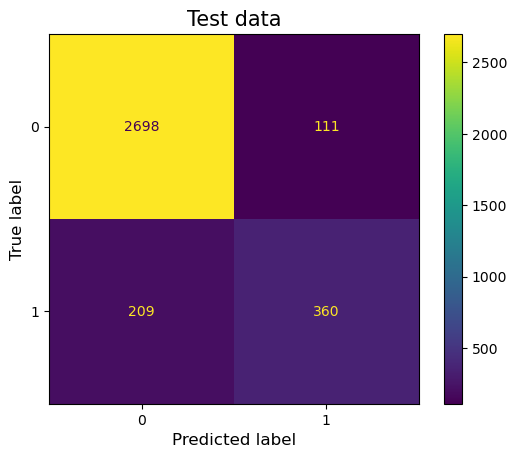

In [ ]:
plot_confusion_matrix(DTree_R, X_1_test, y_1_test)
plt.title('Test data', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show();

In [ ]:
#Training data prob prediction
predict_prob_train_DTree_R = DTree_R.predict_proba(X_1_train)

#Test data prob prediction
predict_prob_test_DTree_R = DTree_R.predict_proba(X_1_test)

AUC for the Training Data: 0.944
AUC for the Test Data: 0.908


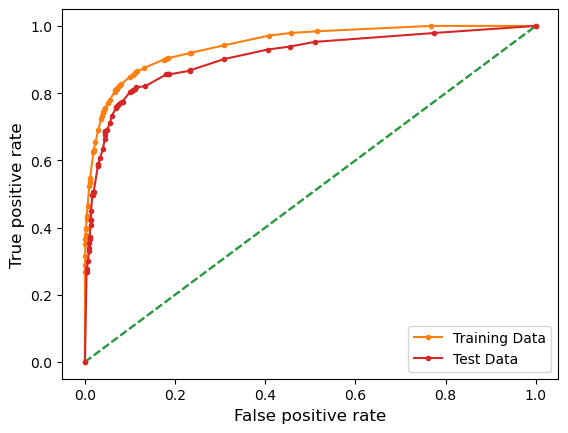

In [ ]:
# AUC and ROC for the training data

# calculate AUC
train_auc_DTree_R = metrics.roc_auc_score(y_1_train, predict_prob_train_DTree_R[:,1])
print('AUC for the Training Data: %.3f' % train_auc_DTree_R)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_train, predict_prob_train_DTree_R[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_DTree_R = metrics.roc_auc_score(y_1_test, predict_prob_test_DTree_R[:,1])
print('AUC for the Test Data: %.3f' % test_auc_DTree_R)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_1_test, predict_prob_test_DTree_R[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

#Labels
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)

# show the plot
plt.legend(loc='lower right')
plt.show();

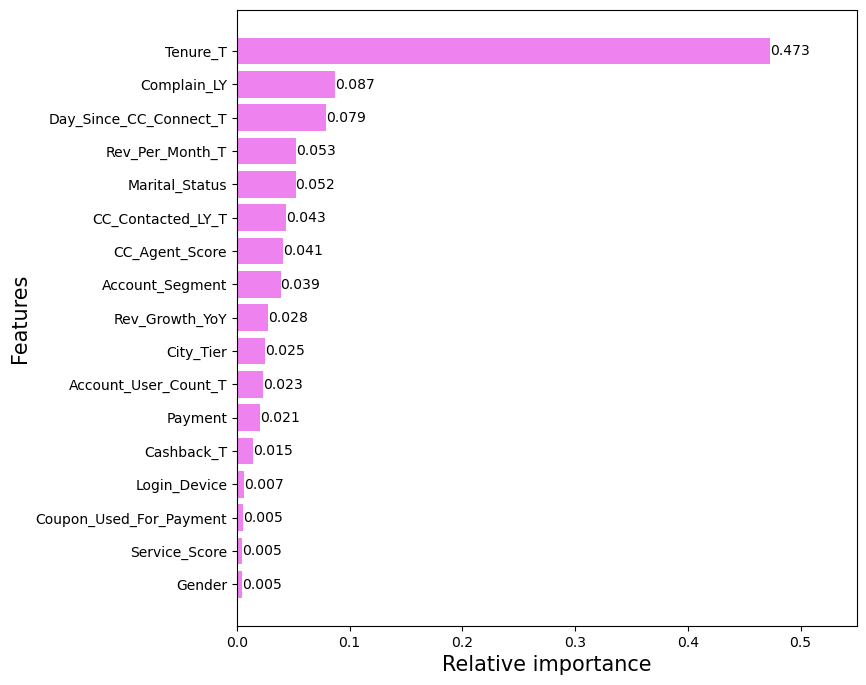

In [ ]:
importances = DTree_R.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_1_train.columns)

plt.figure(figsize=(8,8))
bars_DTree_R = plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative importance', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.xlim(0, 0.55)

for bar in bars_DTree_R:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(bar.get_width(),3), va = 'center')

plt.show();

# END